In [4]:
#%% Import packages 

# general
import numpy as np
import pandas as pd

# plotting
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# my functions/classes
import sys
sys.path.append("../core_scripts/")
from ECMclass import ECM

In [ ]:
# smoothing window, mm
window = 10

# paths
path_to_data = '../../data/processed_data/'
path_to_figures = '../../figures/'
metadata_file = 'metadata.csv'

In [6]:
#%% Read in metadata and import data

meta = pd.read_csv(path_to_data+metadata_file)

# import each script as an ECM class item
data = []
cores = []
sections = []
faces = []
ACorDCs = []
for index,row in meta.iterrows():
    
    core = row['core']
    section = row['section']
    face = row['face']
    ACorDC = row['ACorDC']
    
    if core == 'dic1':
        
        print("Reading "+core+", section "+str(section)+'-'+face+'-'+ACorDC)
    
        data_item = ECM(core,section,face,ACorDC)
        data_item.rem_ends(10)
        data_item.smooth(window)
        #data_item.norm_all()
        #data_item.norm_outside()
        data.append(data_item)
        
        cores.append(core)
        sections.append(section)
        faces.append(face)
        ACorDCs.append(ACorDC)

sec = set(sections)

FileNotFoundError: [Errno 2] No such file or directory: '../../data/proccessed_data/metadata.csv'

In [ ]:
def plotquarter(y_vec,ycor,d,meas,button,axs,rescale,plot_button = False):

    res = 0.002
    
    width = y_vec[1] - y_vec[0]
    
    for y in y_vec:
        
        
        idx = ycor==y
        
        tmeas = meas[idx]
        tbut = button[idx]
        tycor = ycor[idx]
        td = d[idx]

        #downsample ECM to save plotting time (as needed)
        if res != 0:
            int_lo = round(min(td),2)
            int_hi = round(max(td),2)
            depth_interp = np.linspace(int_lo,int_hi,int((int_hi-int_lo)/res)+1)
            meas_interp = np.interp(depth_interp,np.flip(td),np.flip(tmeas))
            but_interp = np.interp(depth_interp,np.flip(td),np.flip(tbut))
            td = depth_interp
            tmeas = meas_interp
            tbut = np.round(but_interp)
        
        for i in range(len(tmeas)-1):
            
            if tbut[i] == 0 or not plot_button:
                
                axs.add_patch(Rectangle((y-(width-0.2)/2,td[i]),(width-0.2),td[i+1]-td[i],facecolor=my_cmap(rescale(tmeas[i]))))
            else:
                axs.add_patch(Rectangle((y-(width-0.2)/2,td[i]),(width-0.2),td[i+1]-td[i],facecolor='k'))
            
    return()

In [ ]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    
    return(unique_list)


In [ ]:
# make colormap
my_cmap = matplotlib.colormaps['Spectral']

Plotting with buttons
    Running Section 142
    Running Section 150
    Running Section 151
    Running Section 152
    Running Section 153
    Running Section 154
    Running Section 155
    Running Section 156
    Running Section 157
    Running Section 158
    Running Section 159
    Running Section 160
    Running Section 161
    Running Section 162
    Running Section 163
    Running Section 164
    Running Section 165
    Running Section 166
    Running Section 167
    Running Section 168
    Running Section 169


/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_49165/1808082277.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)


    Running Section 170
    Running Section 171
    Running Section 172
    Running Section 173
    Running Section 174
    Running Section 175
    Running Section 176
    Running Section 177
    Running Section 178
    Running Section 179
    Running Section 180
    Running Section 182
    Running Section 183
    Running Section 185
    Running Section 186
    Running Section 189
    Running Section 194
Plotting without buttons
    Running Section 142
    Running Section 150
    Running Section 151
    Running Section 152
    Running Section 153
    Running Section 154
    Running Section 155
    Running Section 156
    Running Section 157
    Running Section 158
    Running Section 159
    Running Section 160
    Running Section 161
    Running Section 162
    Running Section 163
    Running Section 164
    Running Section 165
    Running Section 166
    Running Section 167
    Running Section 168
    Running Section 169
    Running Section 170
    Running Section 171
    Running Sec

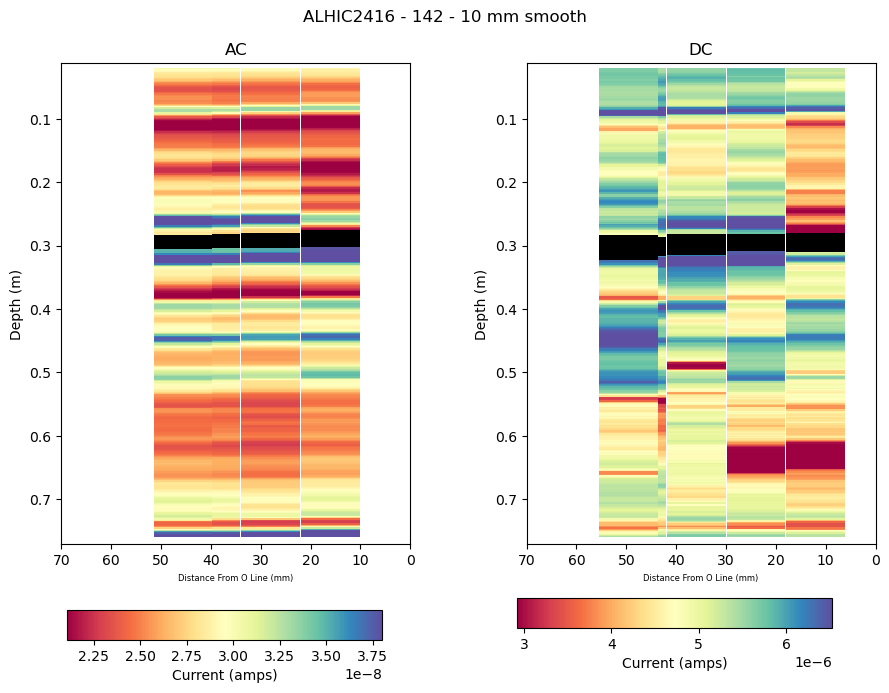

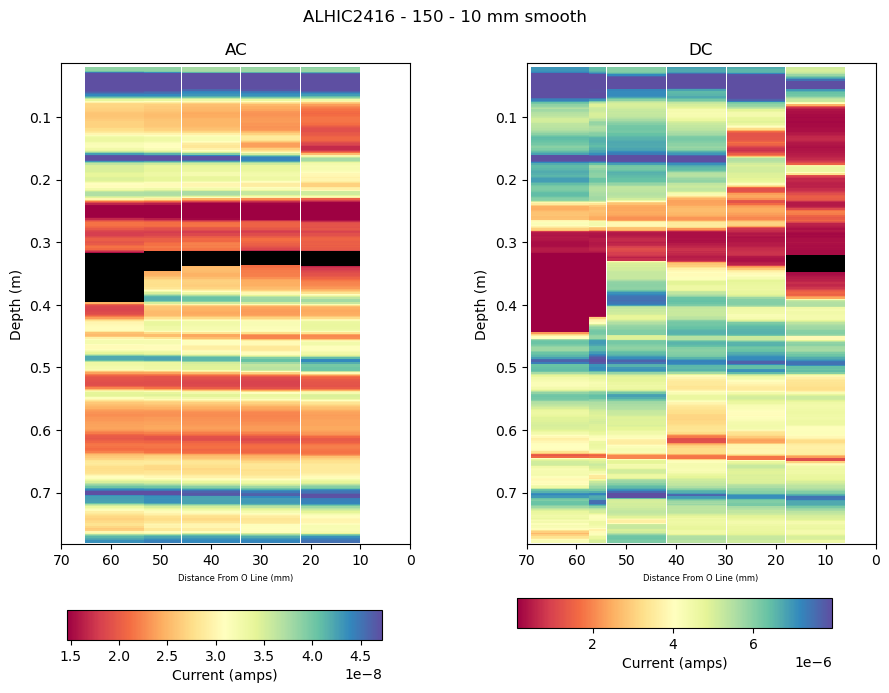

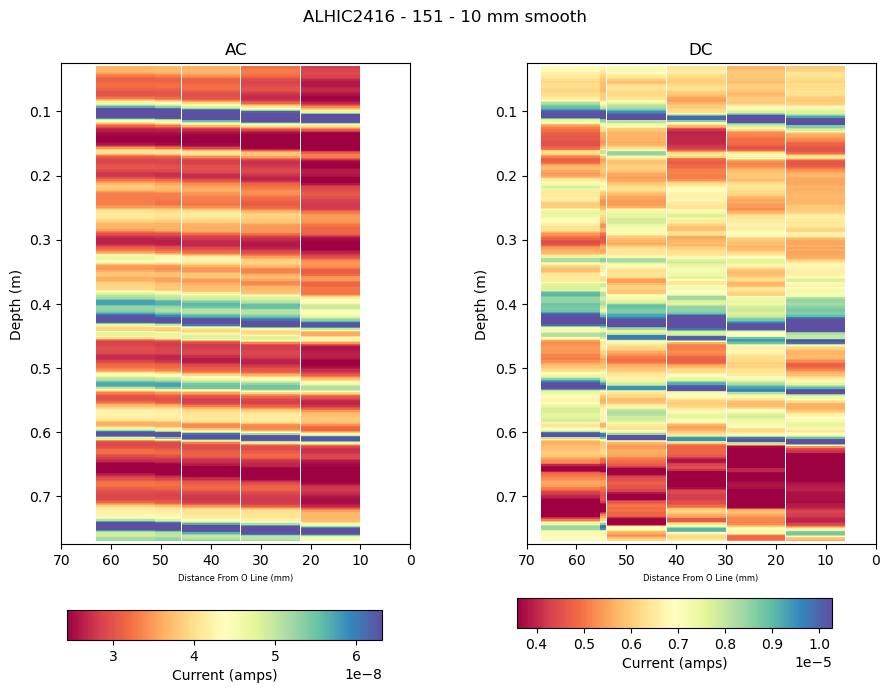

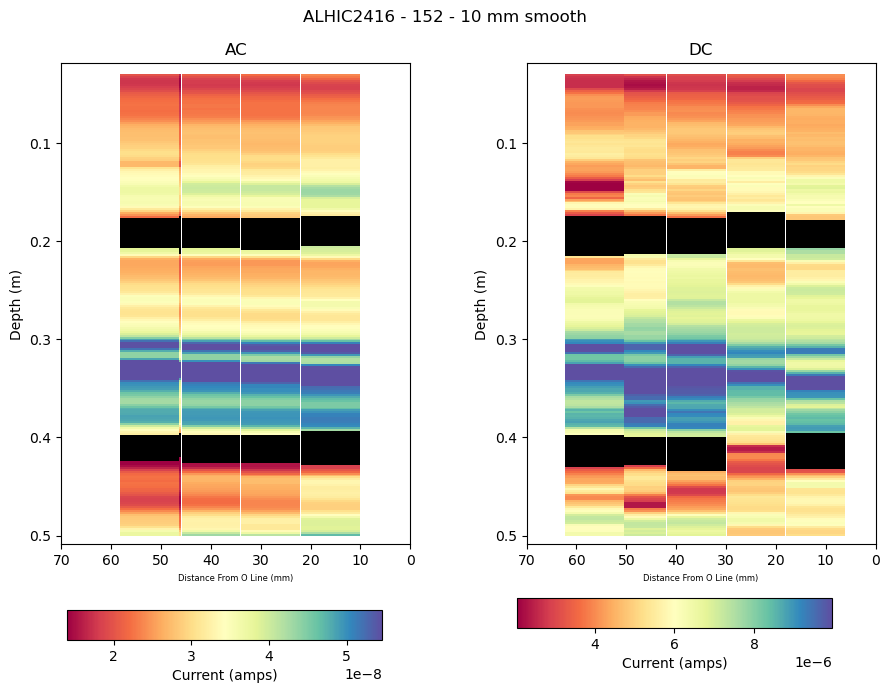

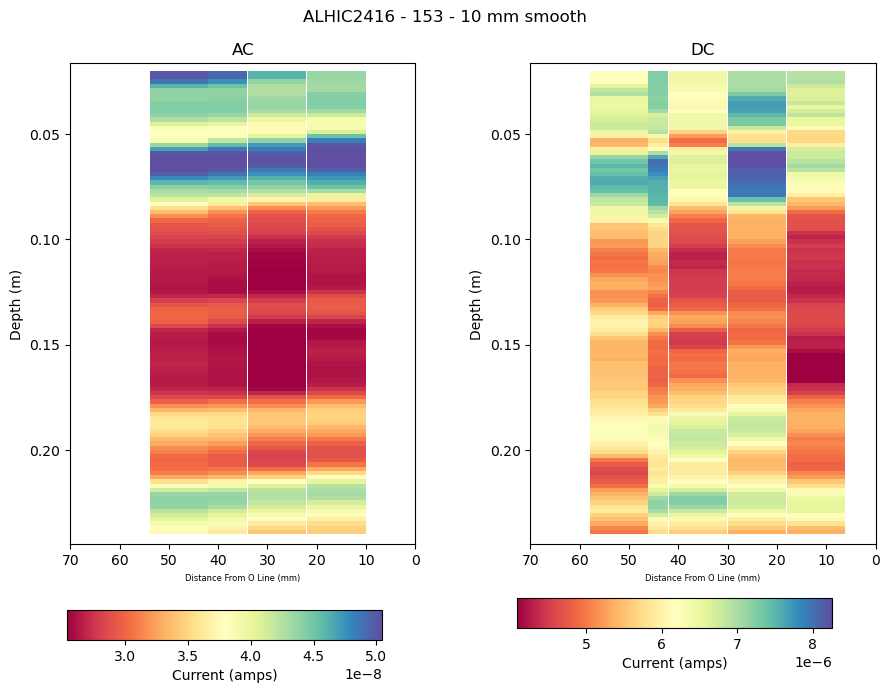

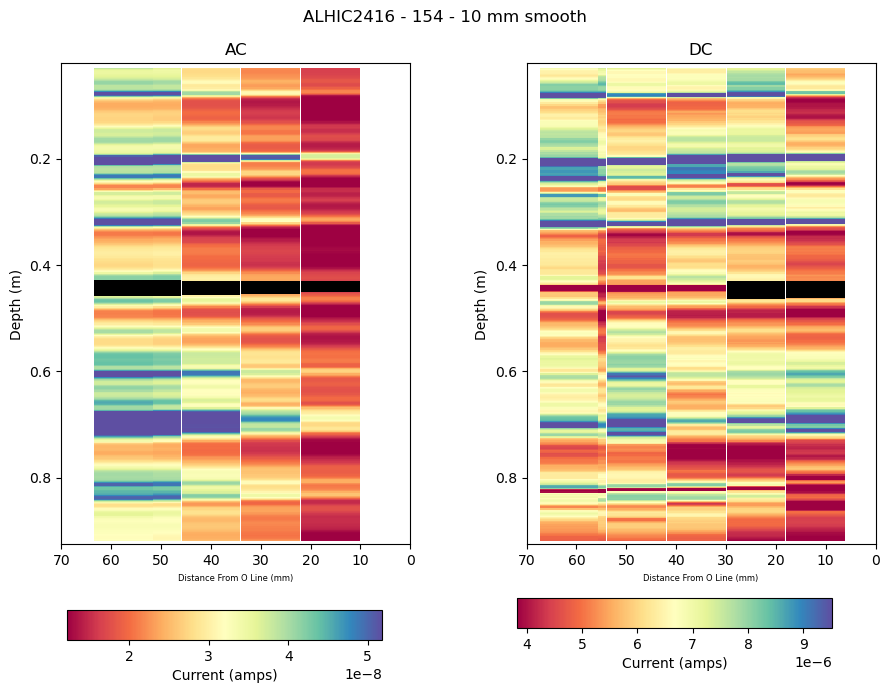

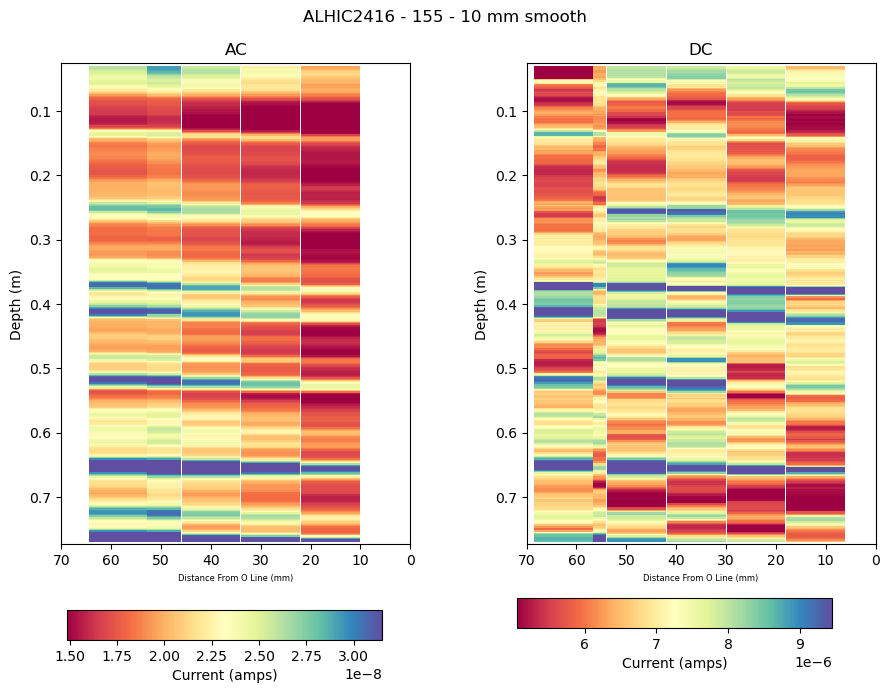

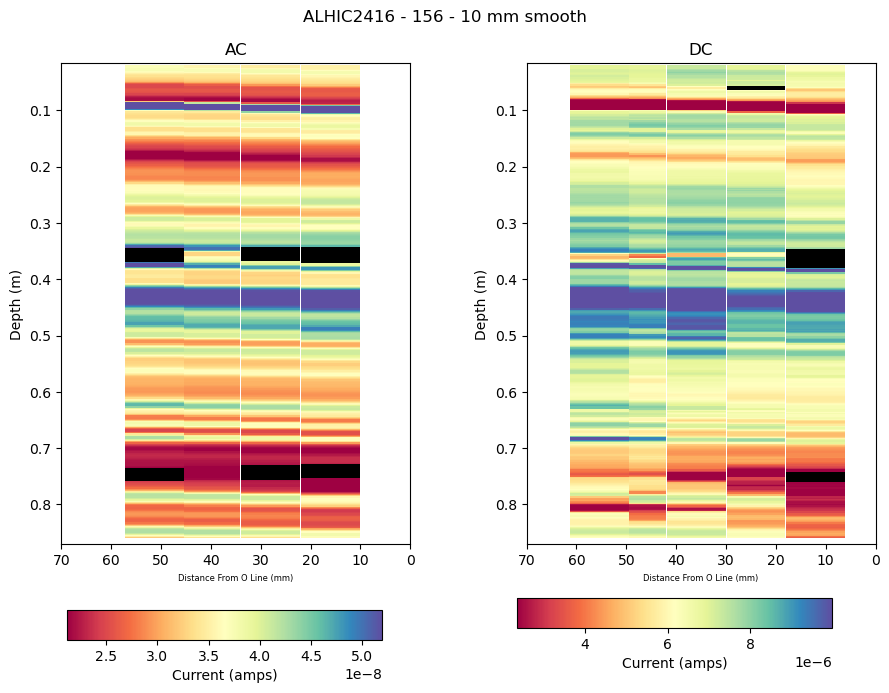

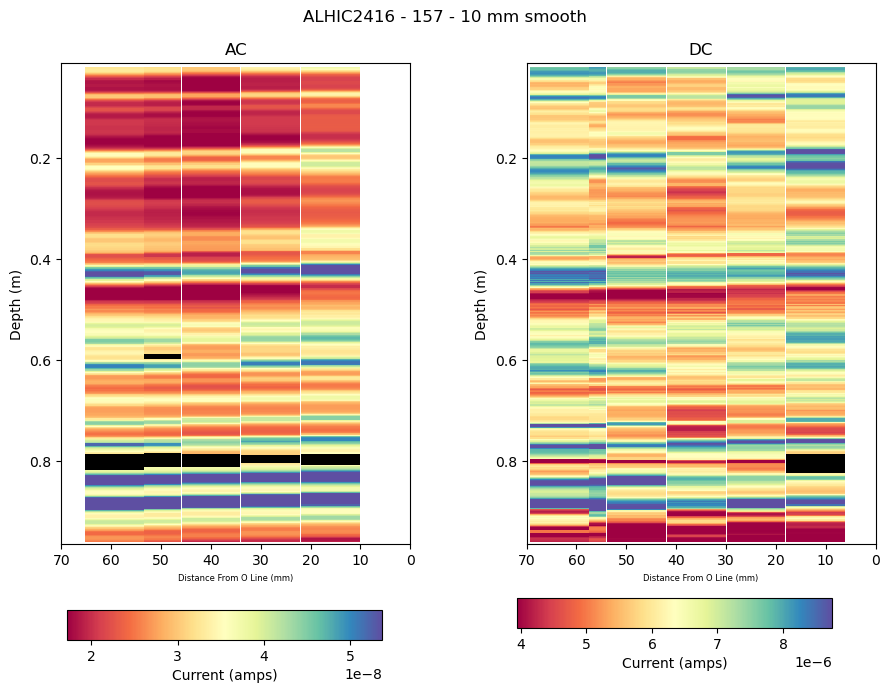

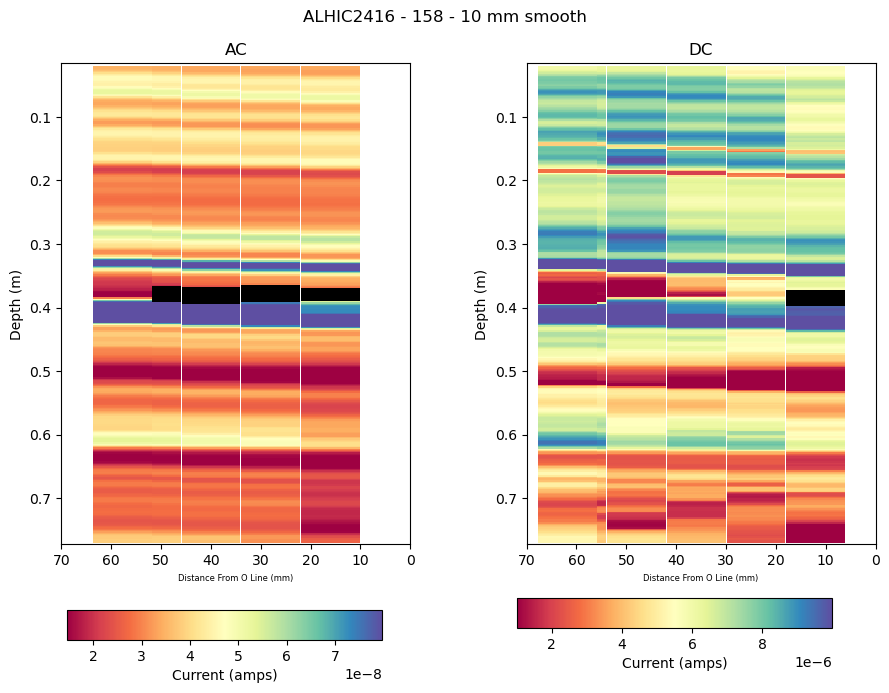

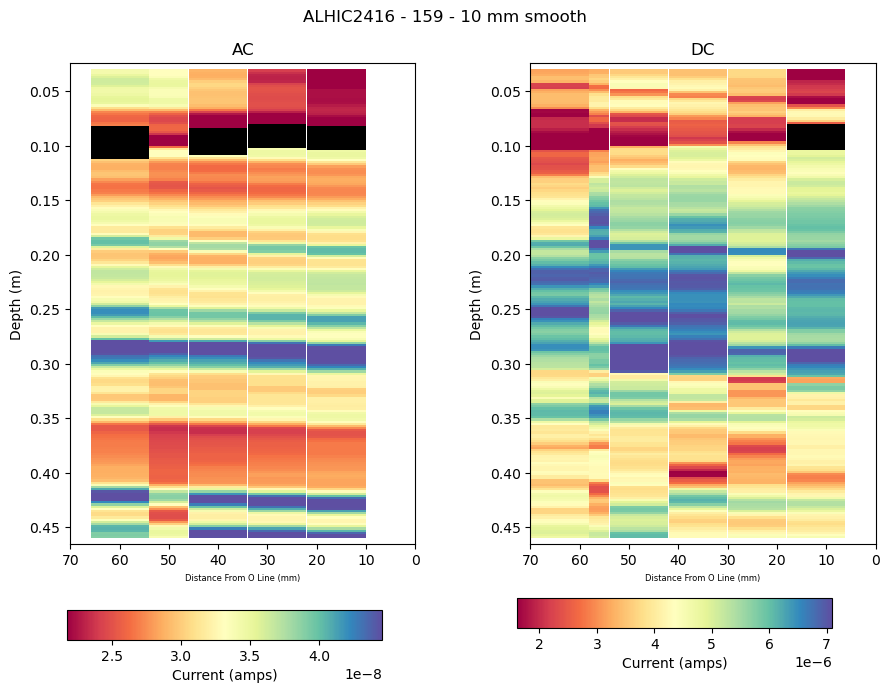

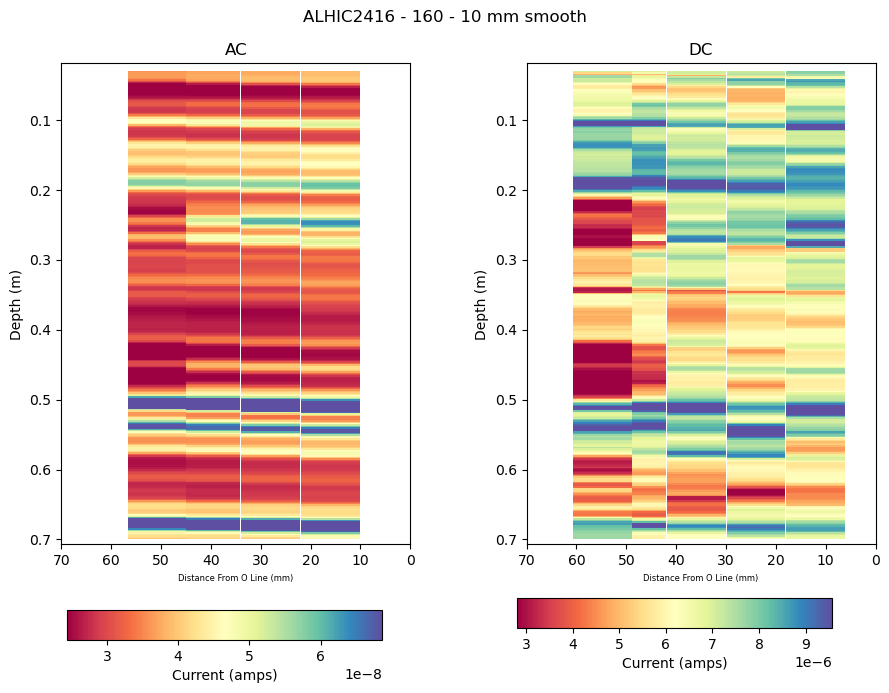

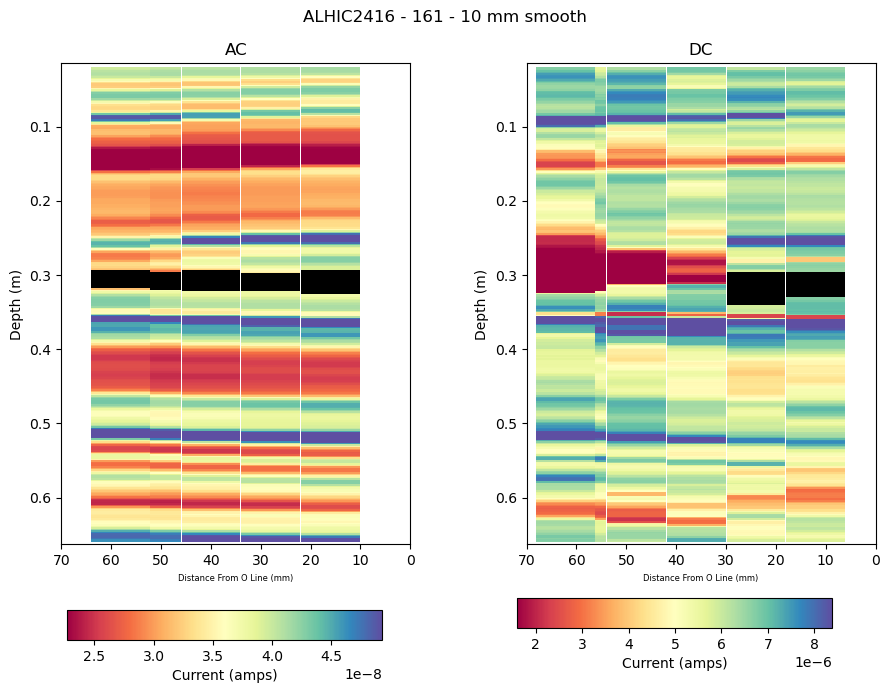

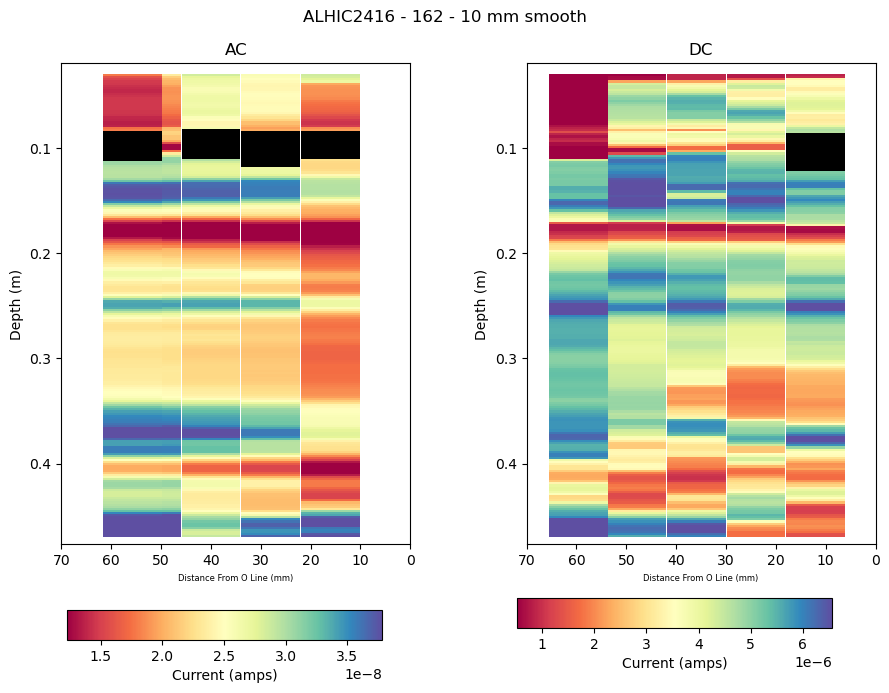

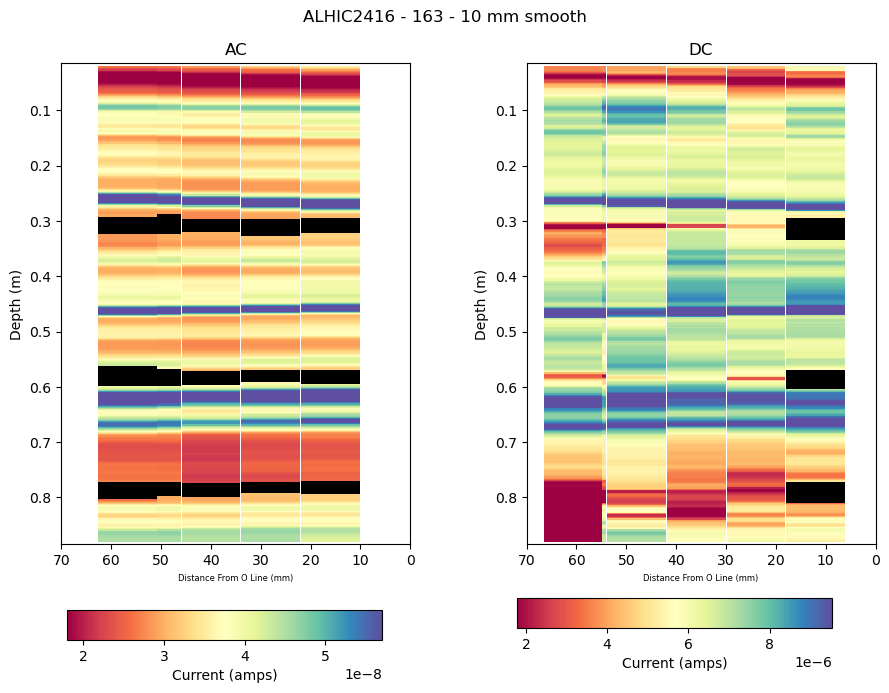

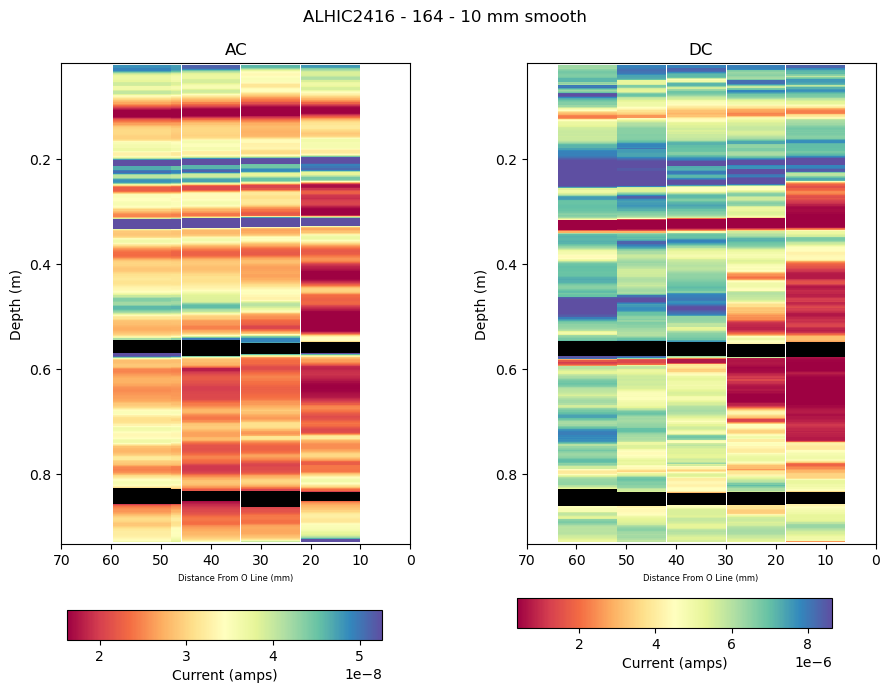

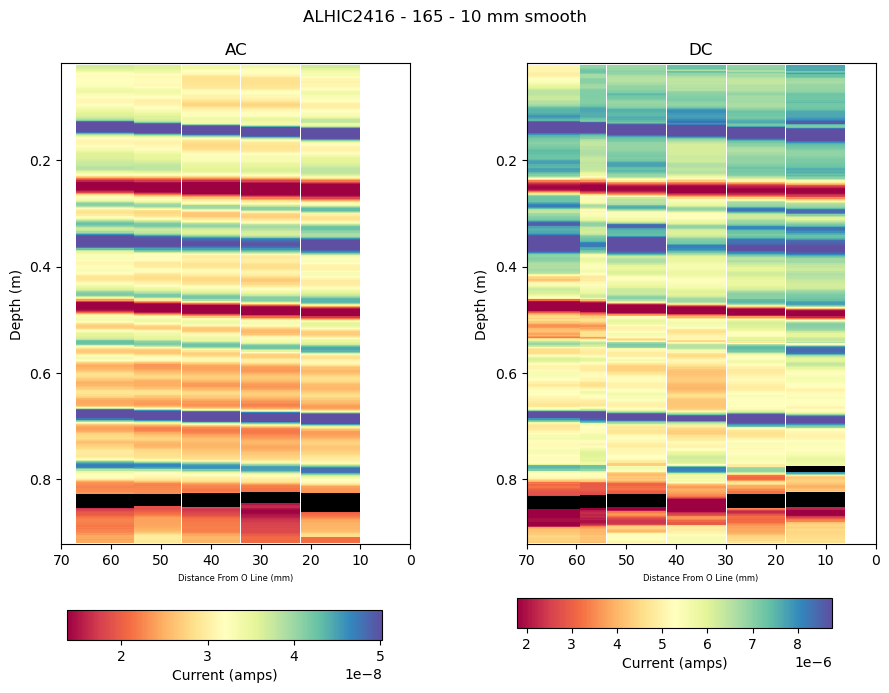

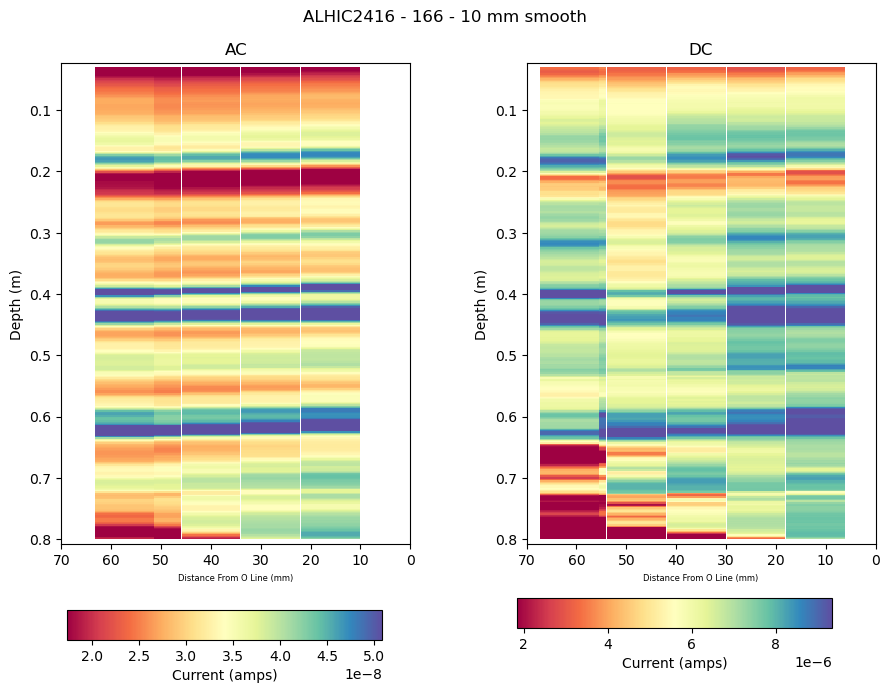

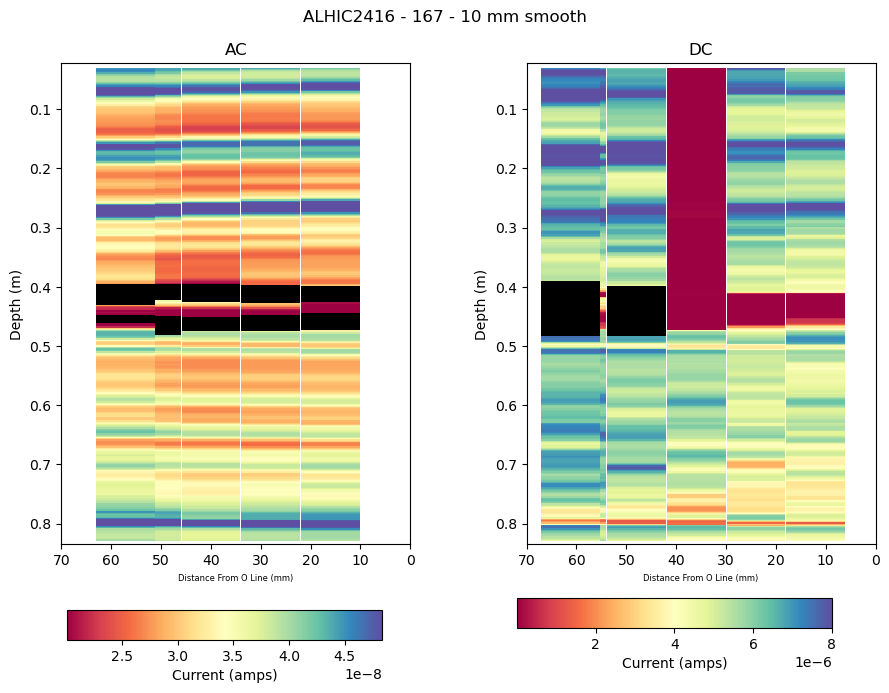

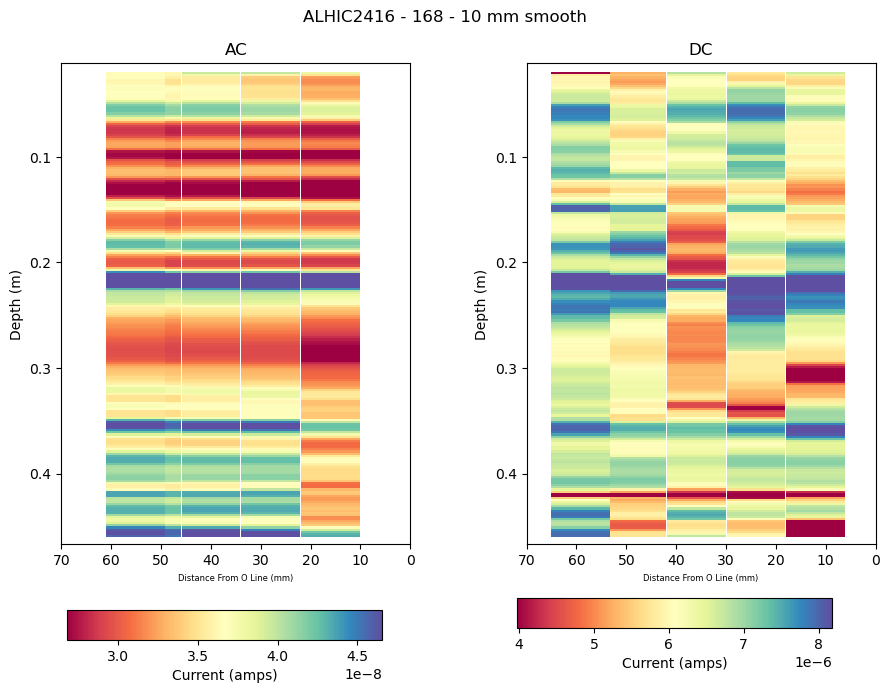

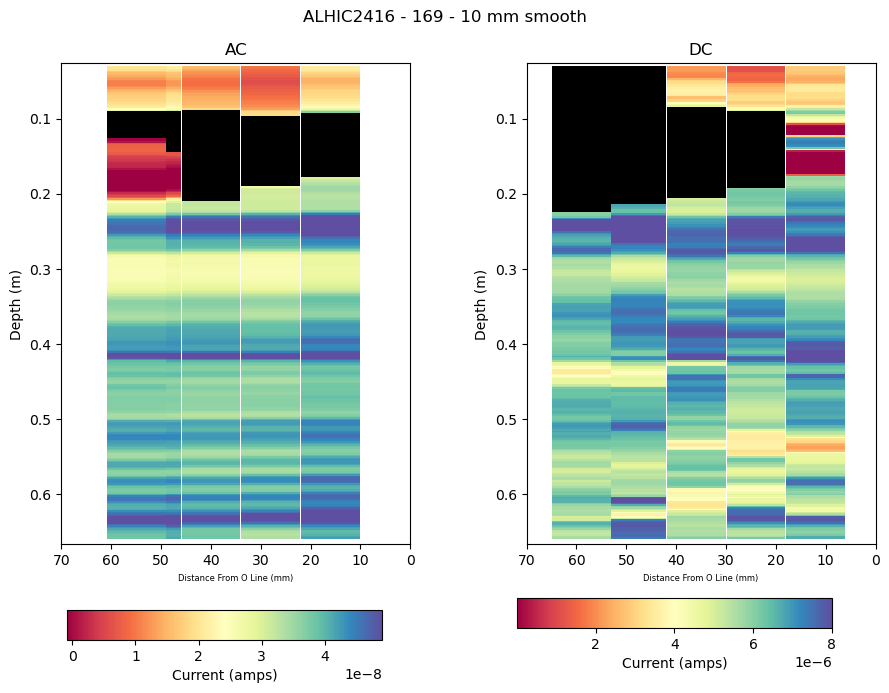

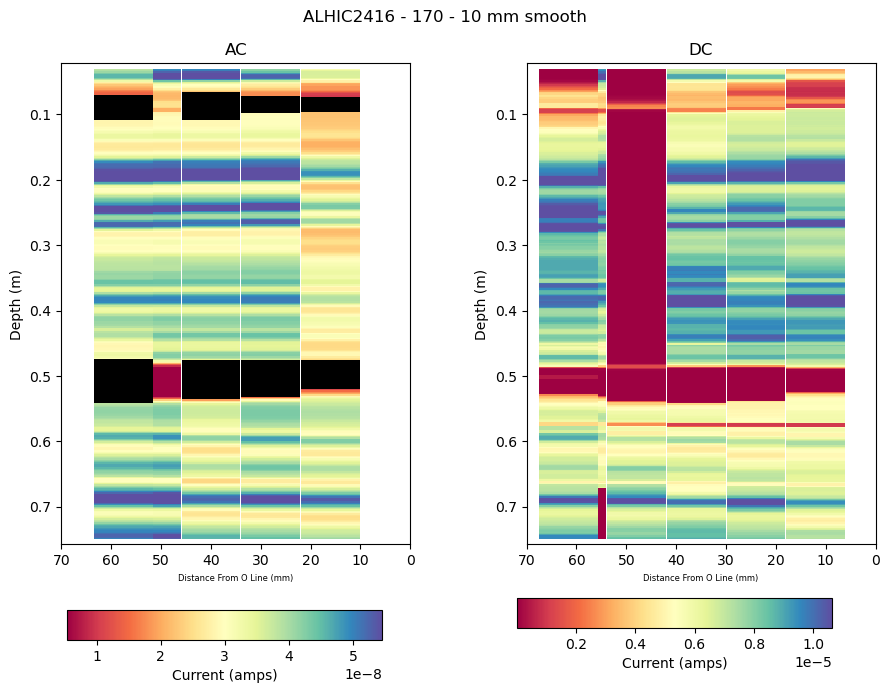

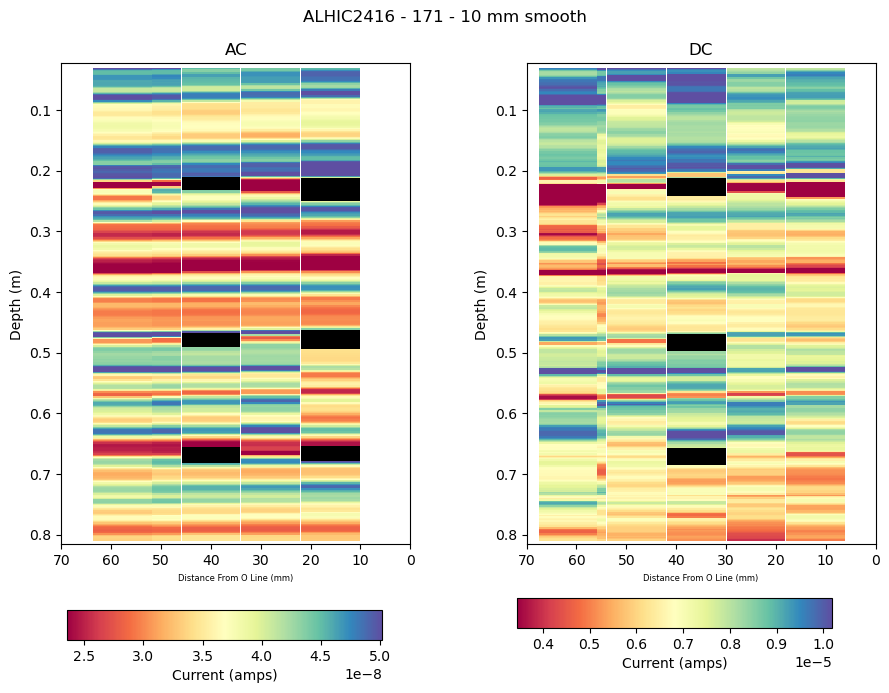

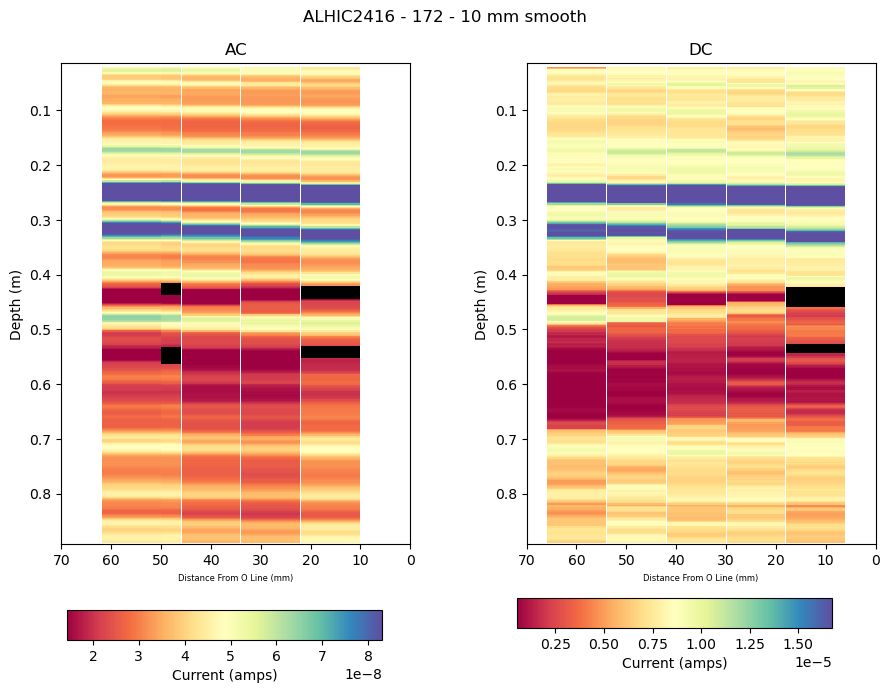

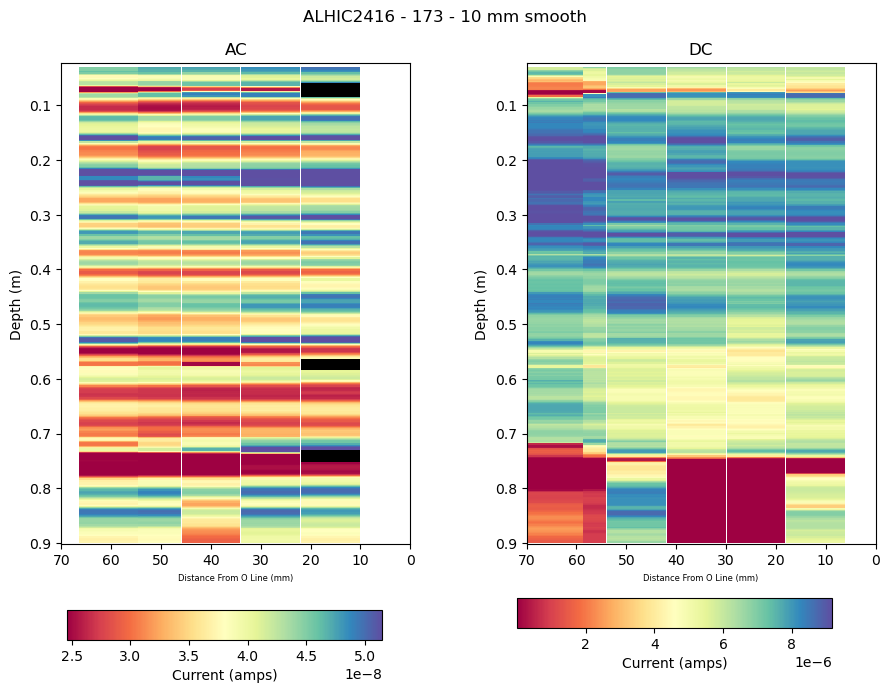

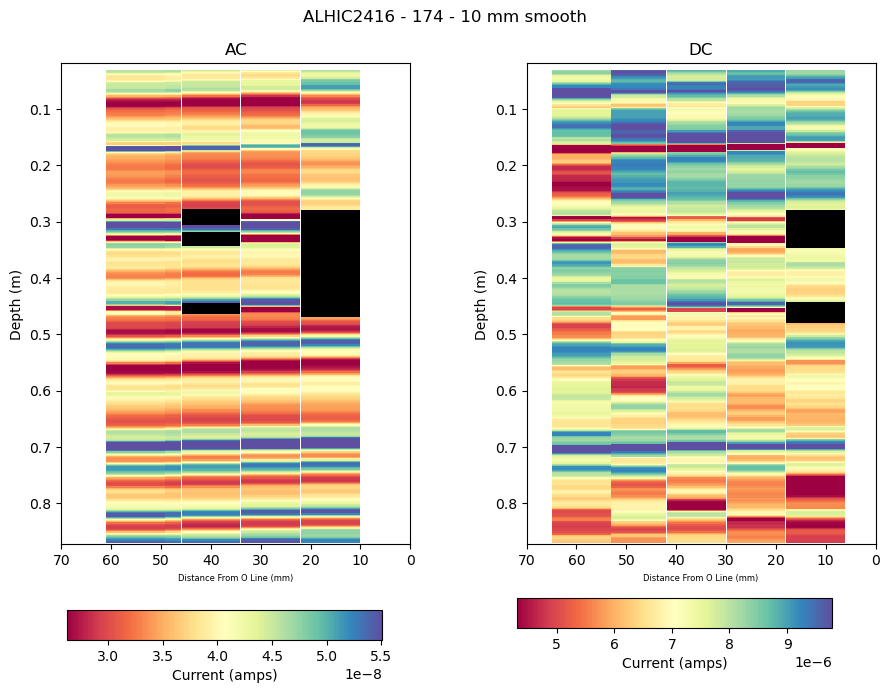

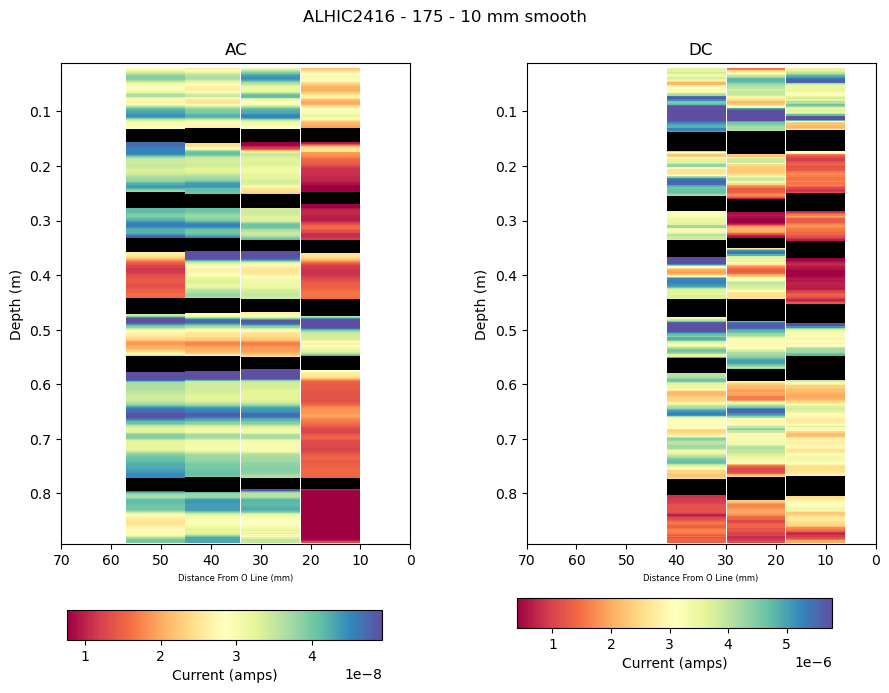

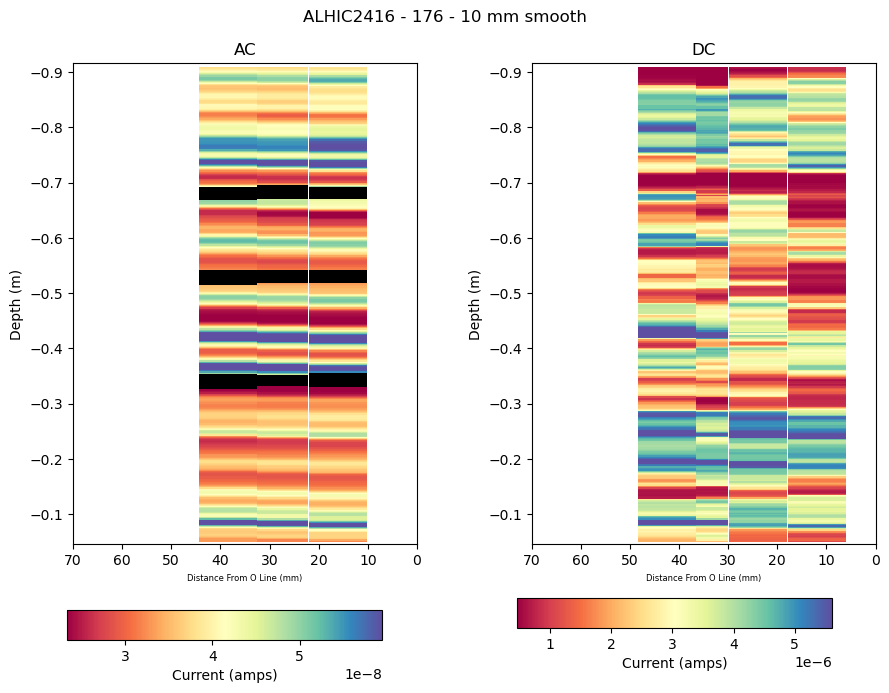

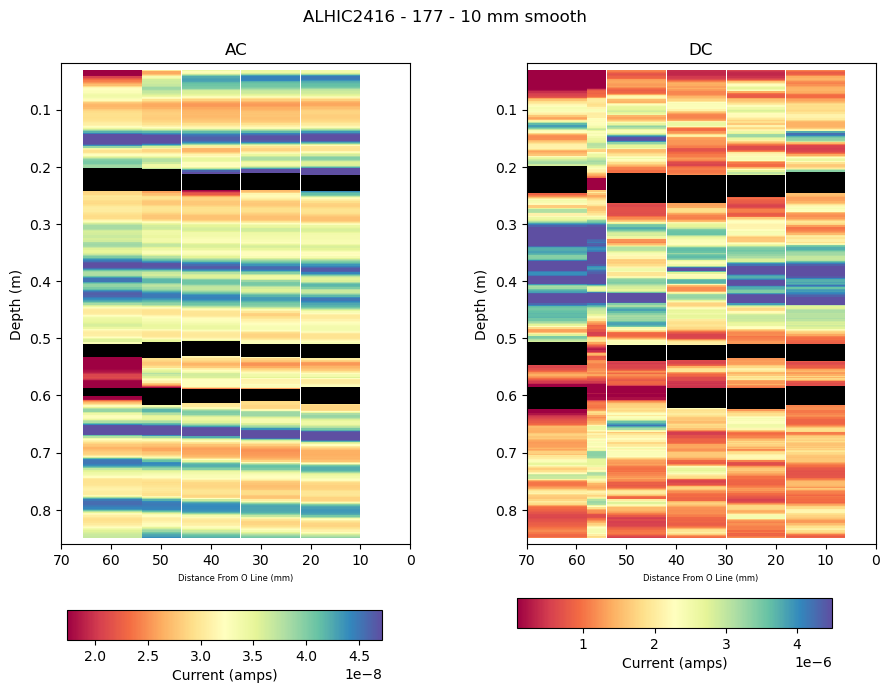

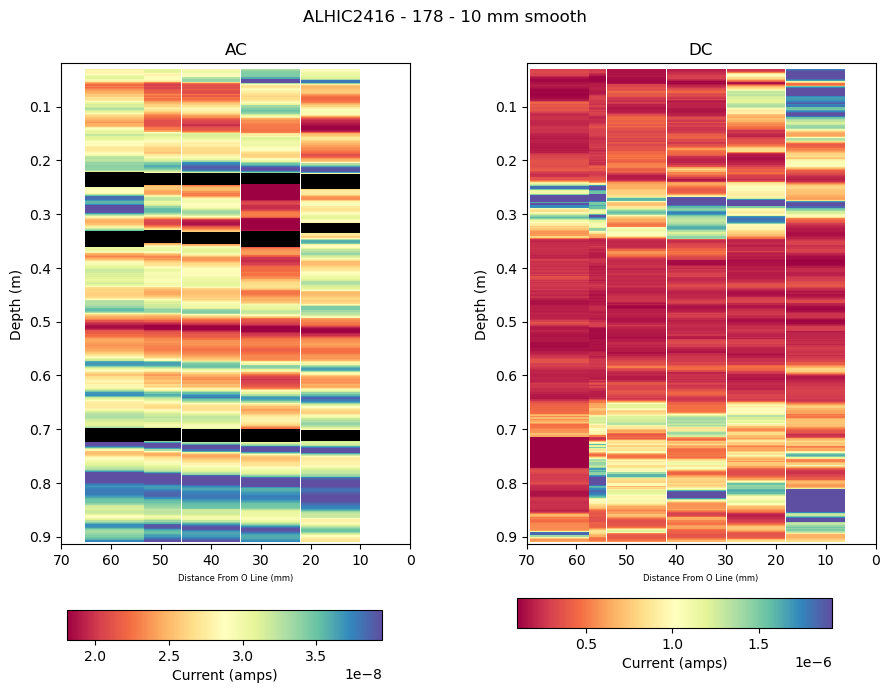

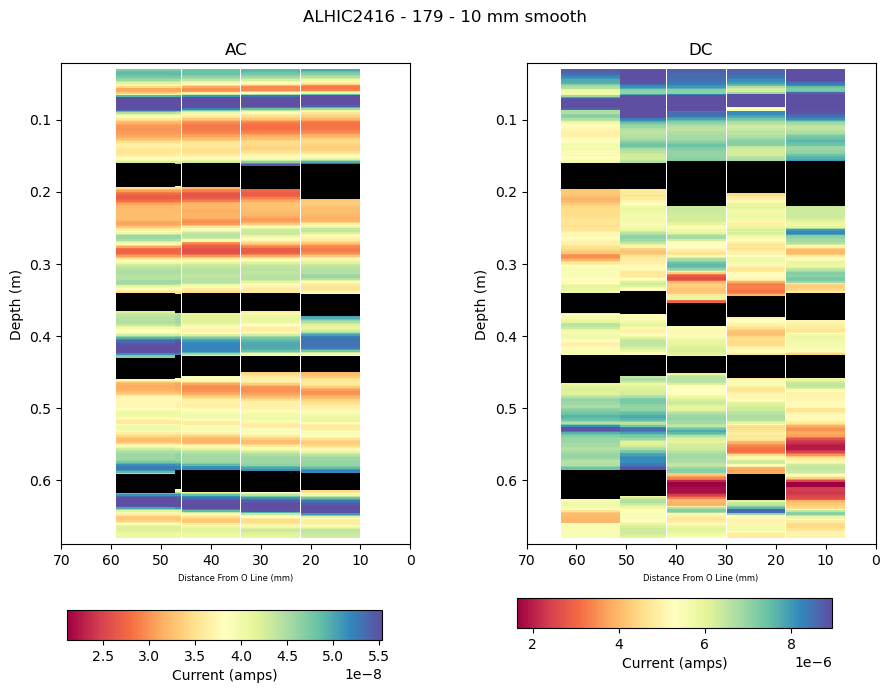

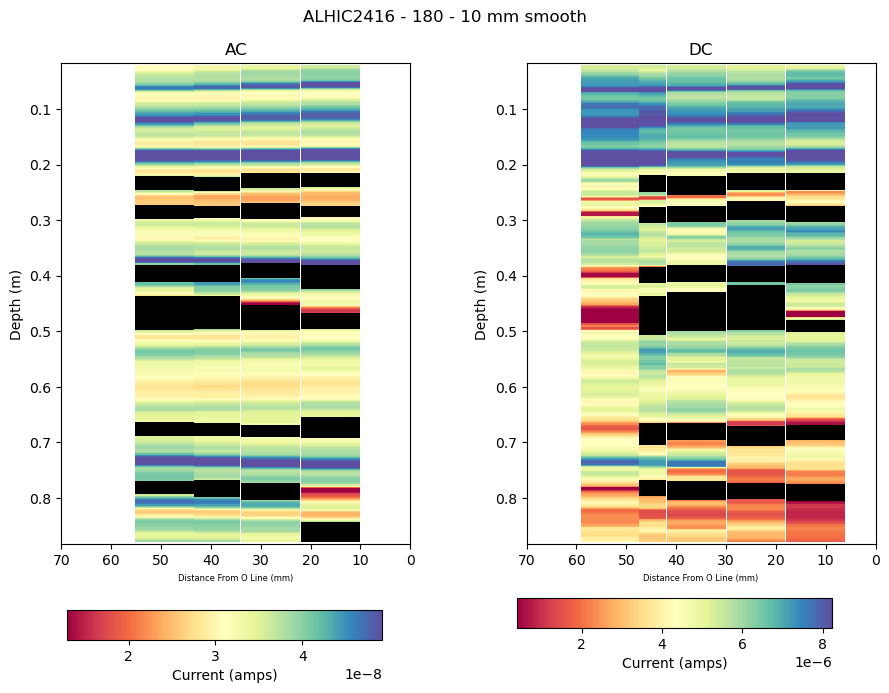

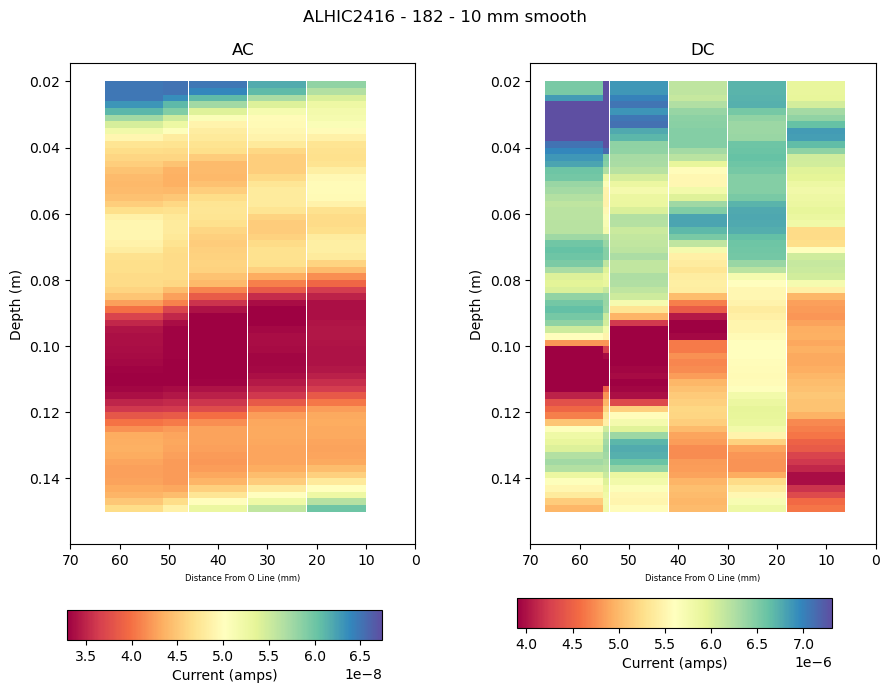

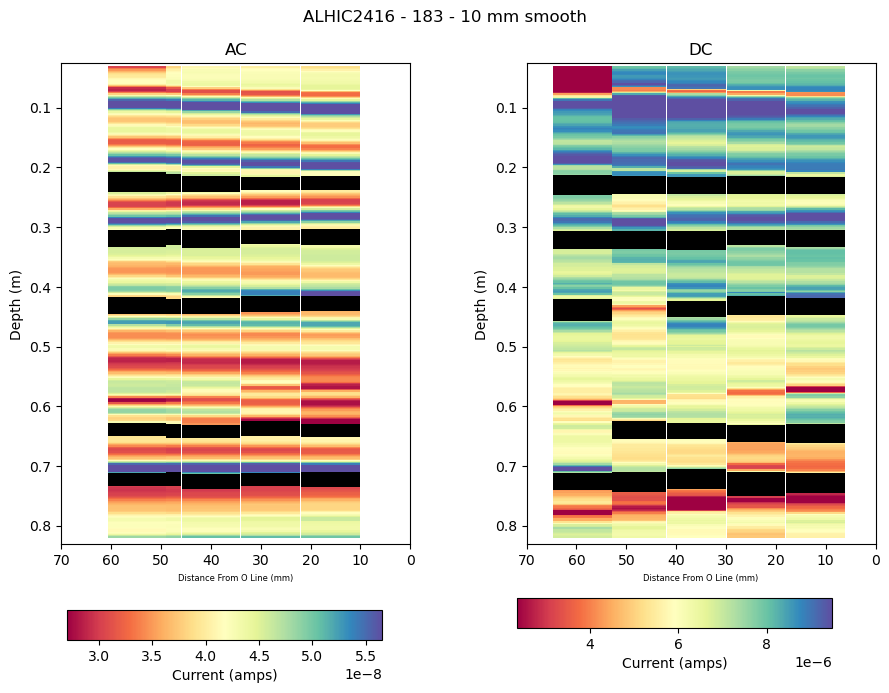

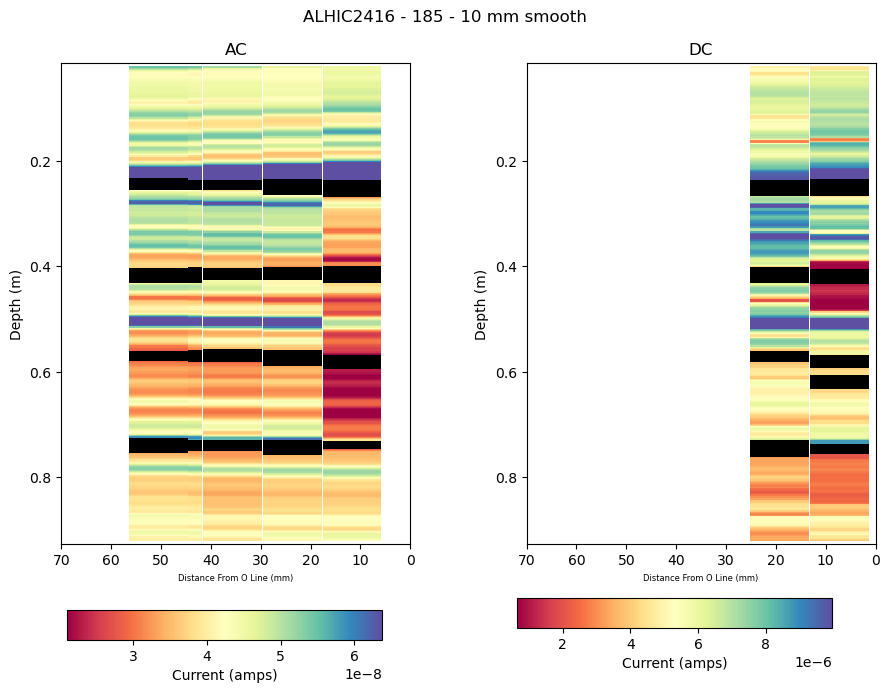

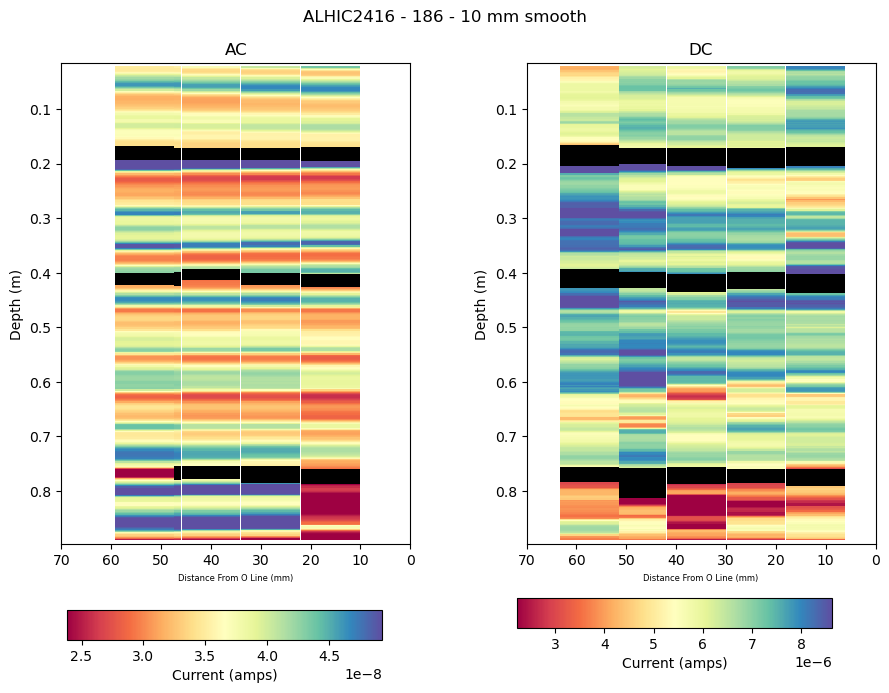

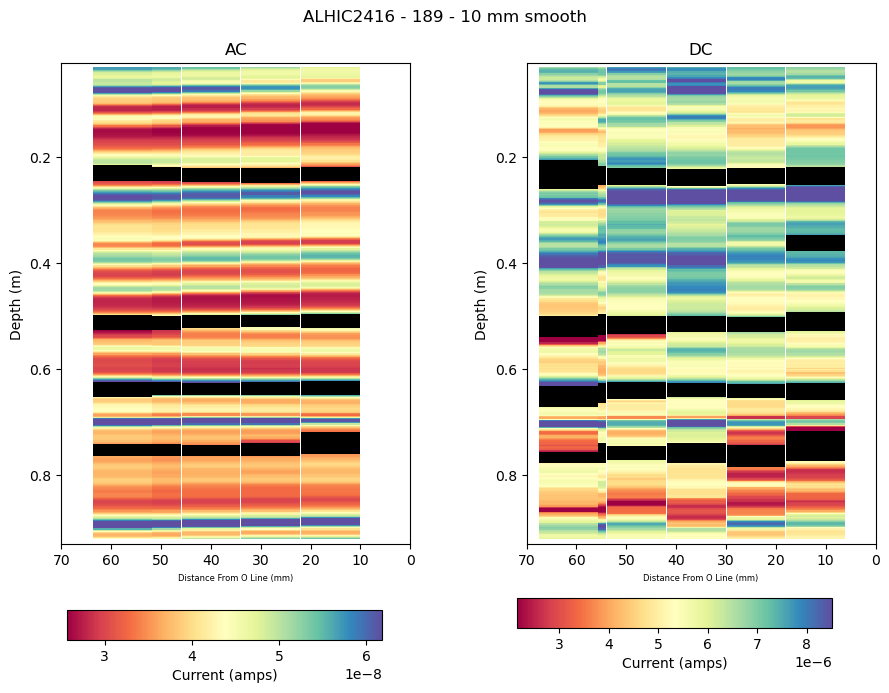

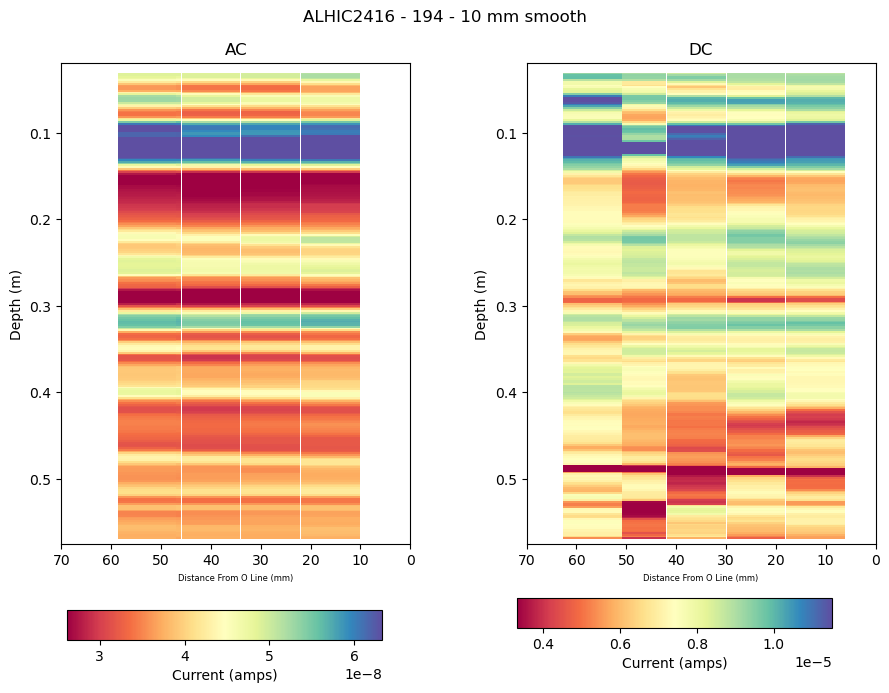

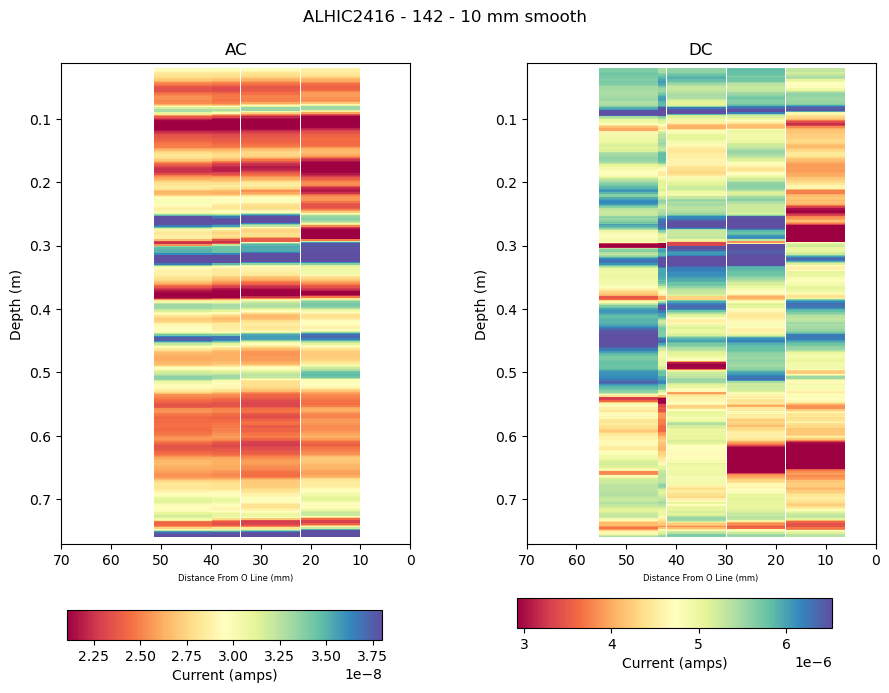

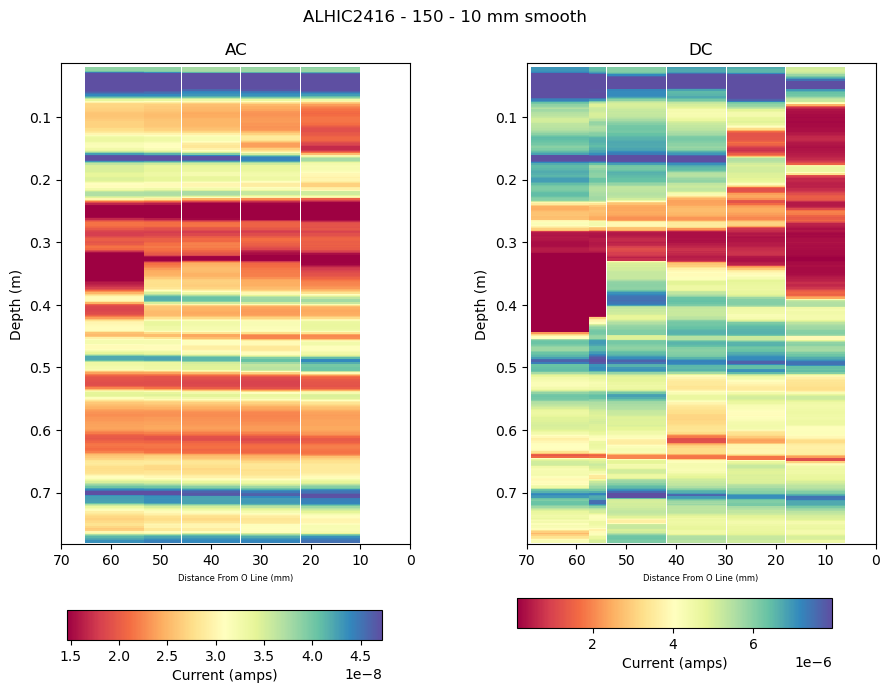

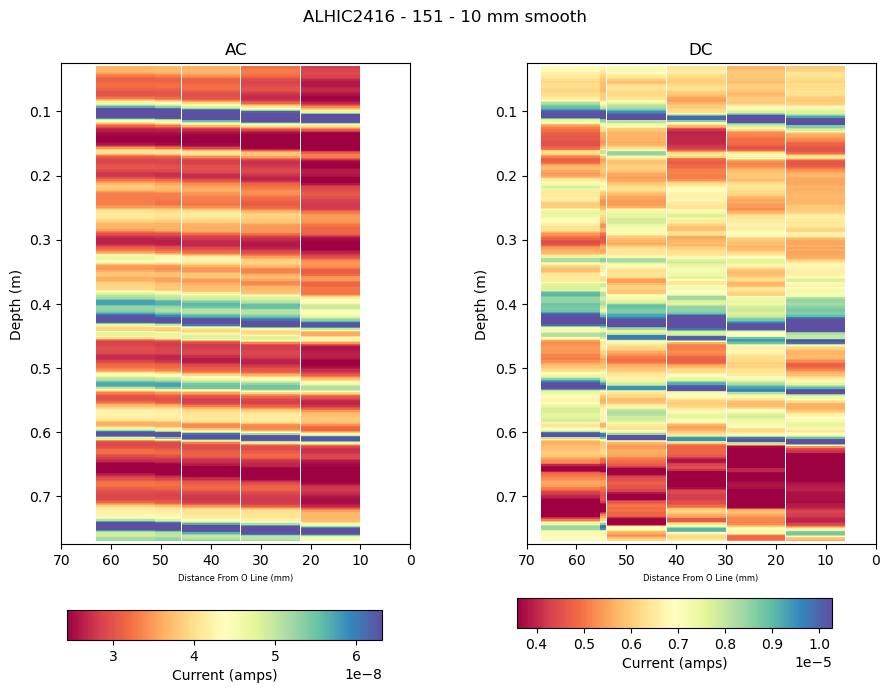

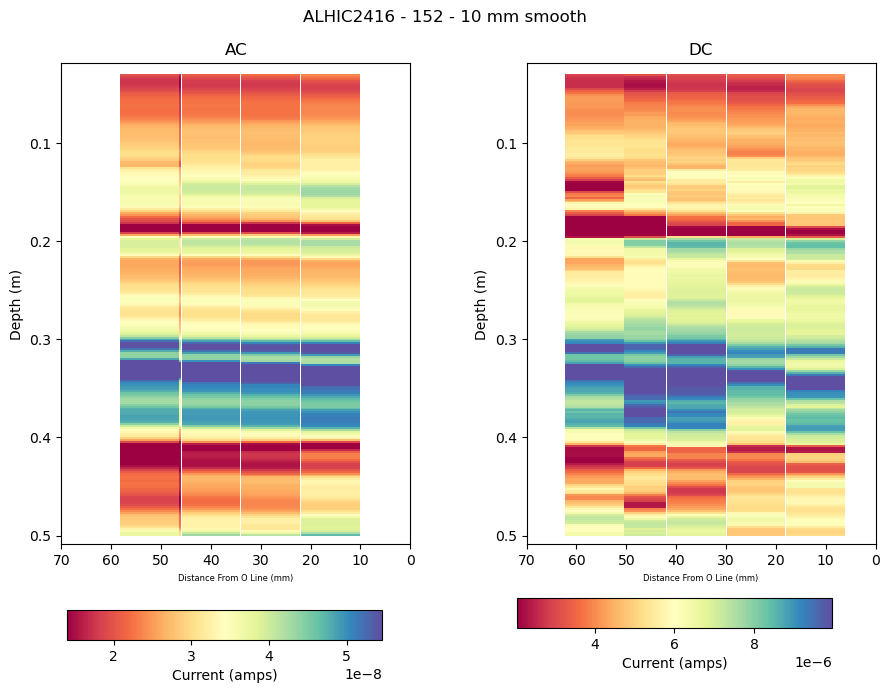

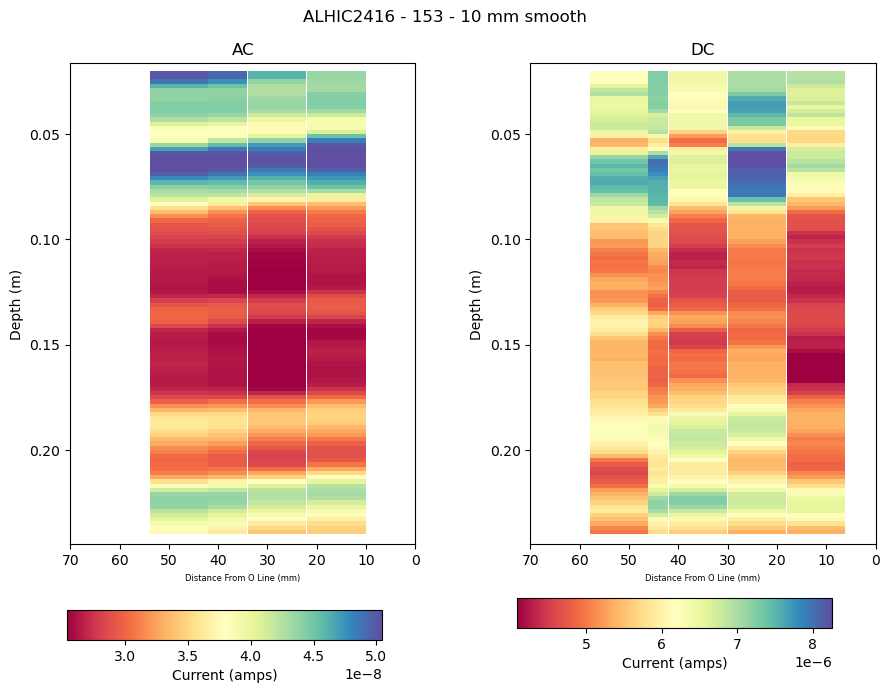

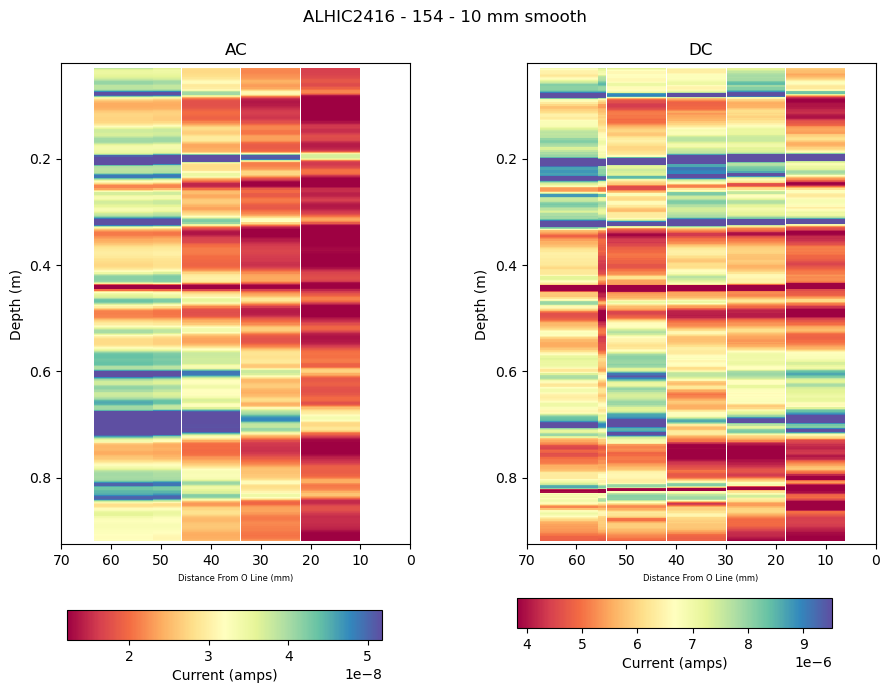

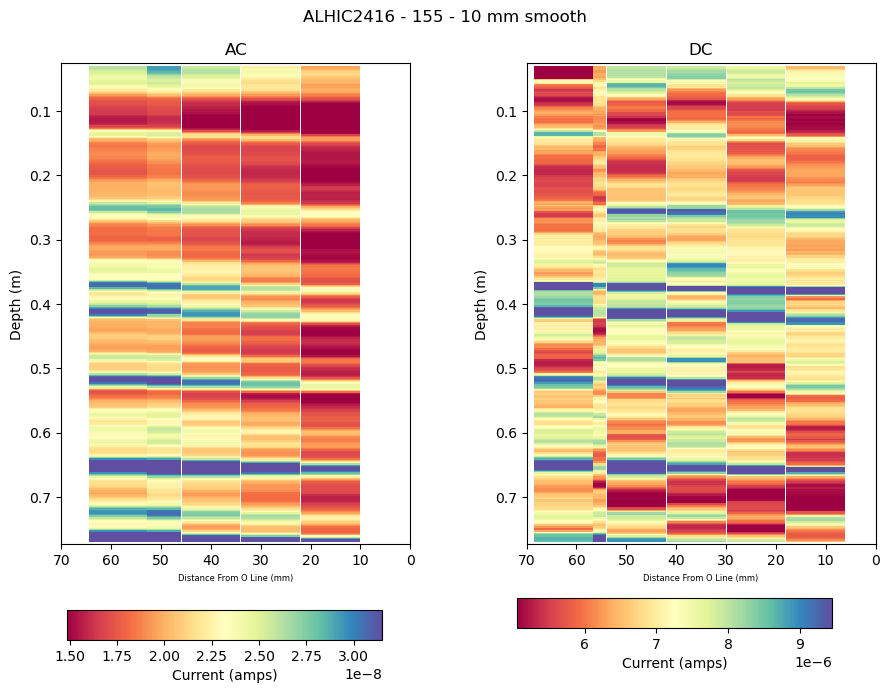

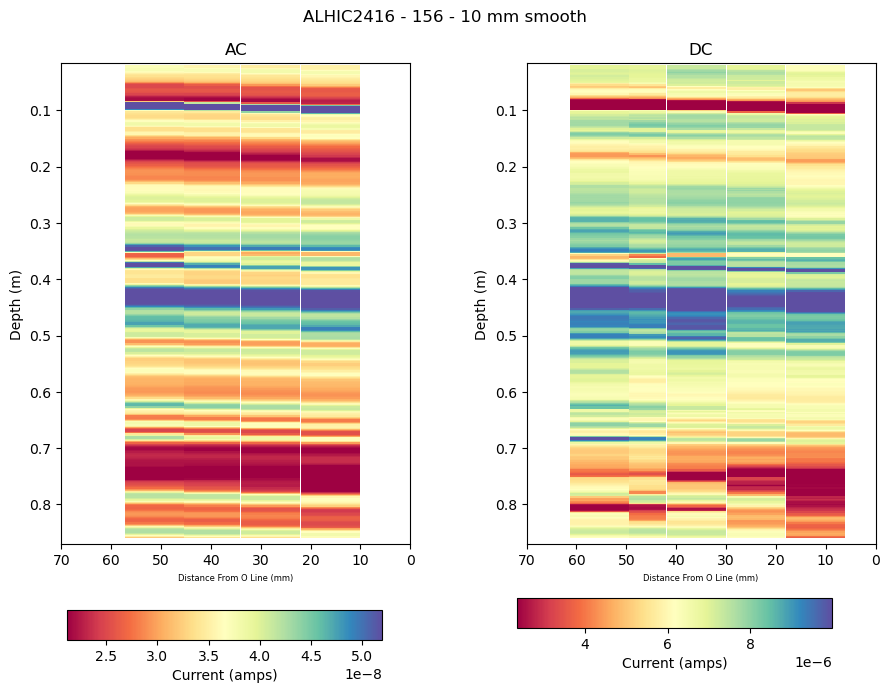

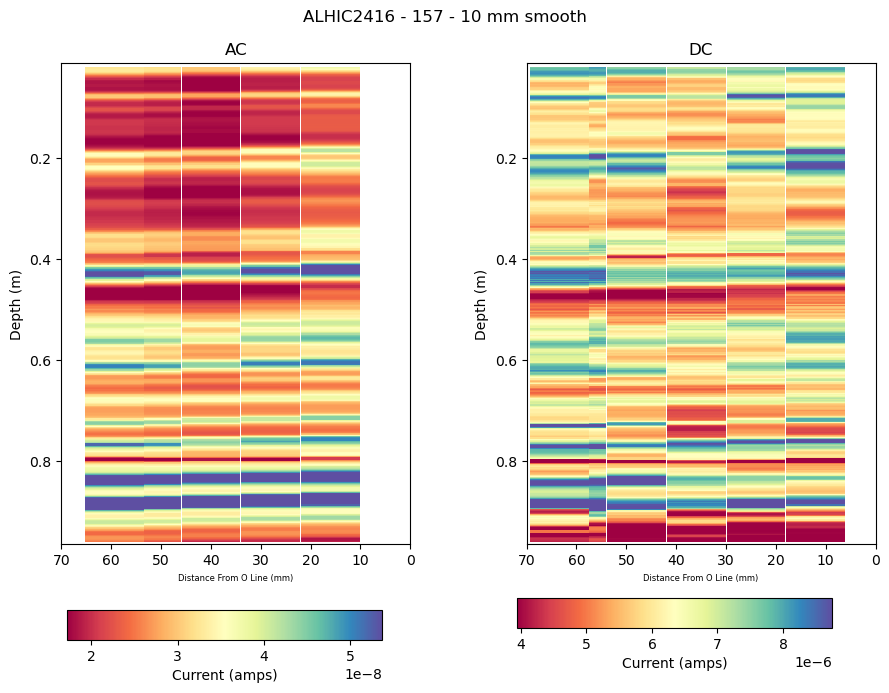

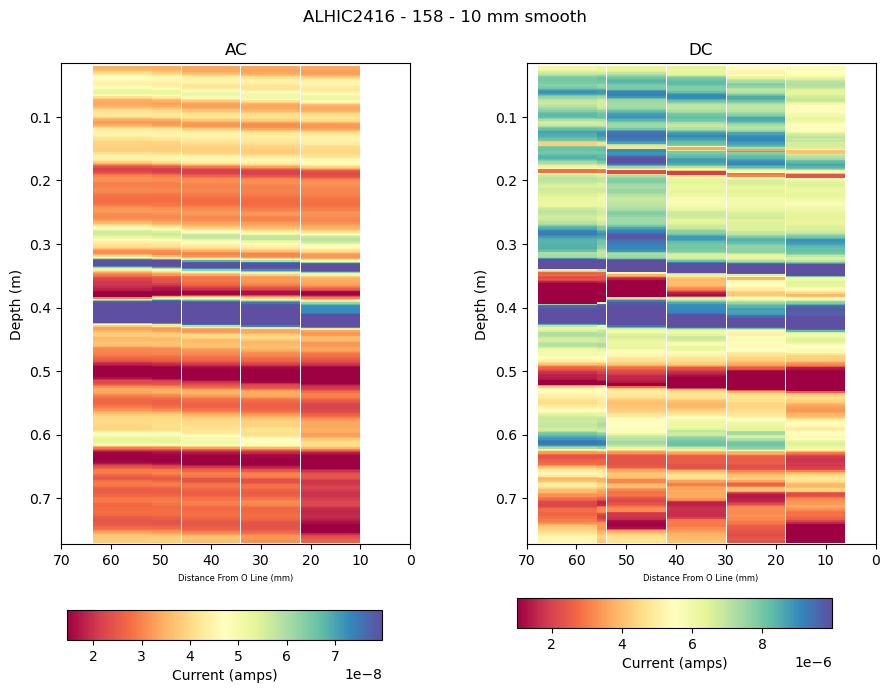

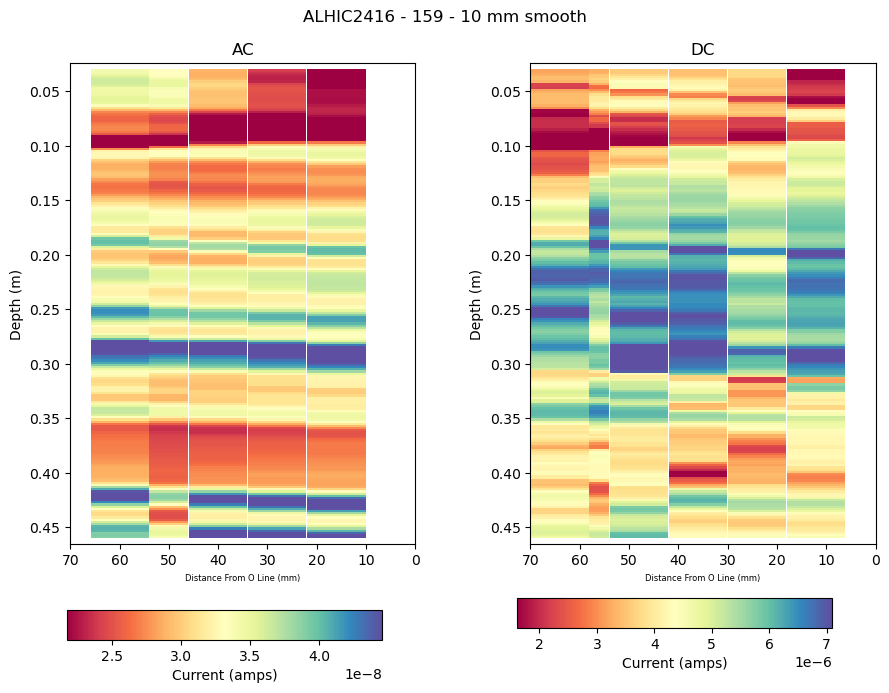

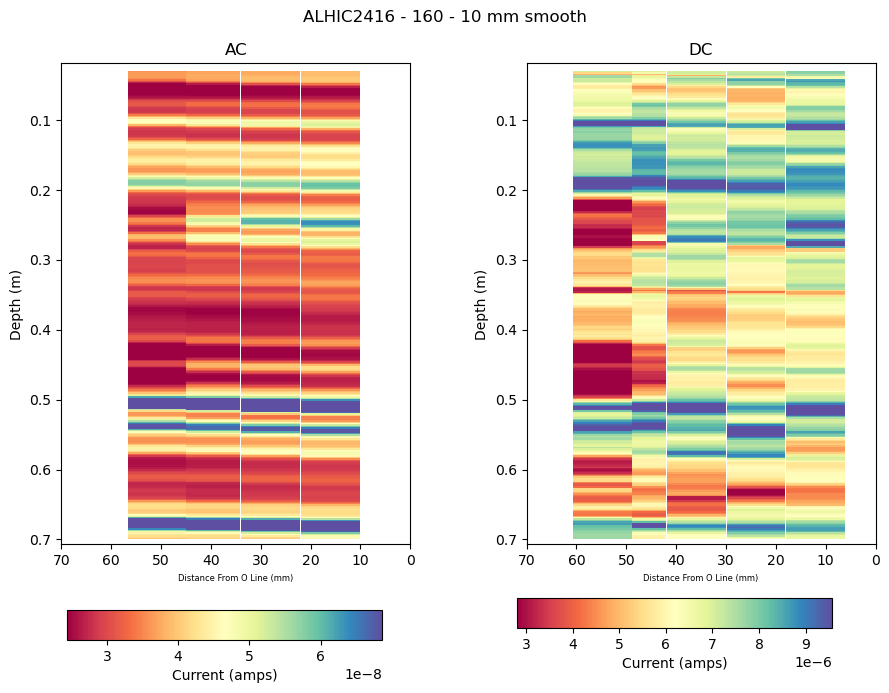

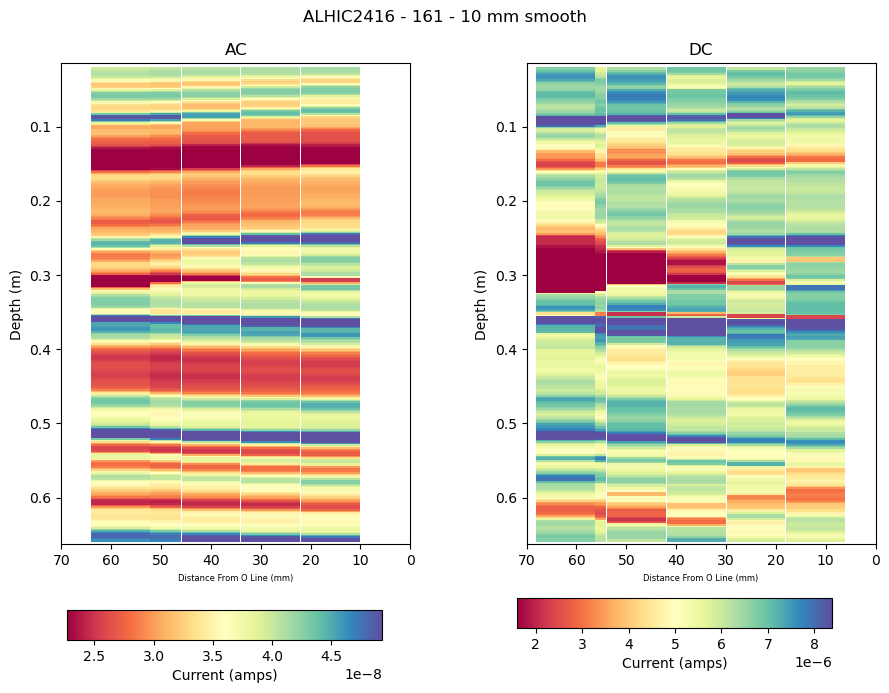

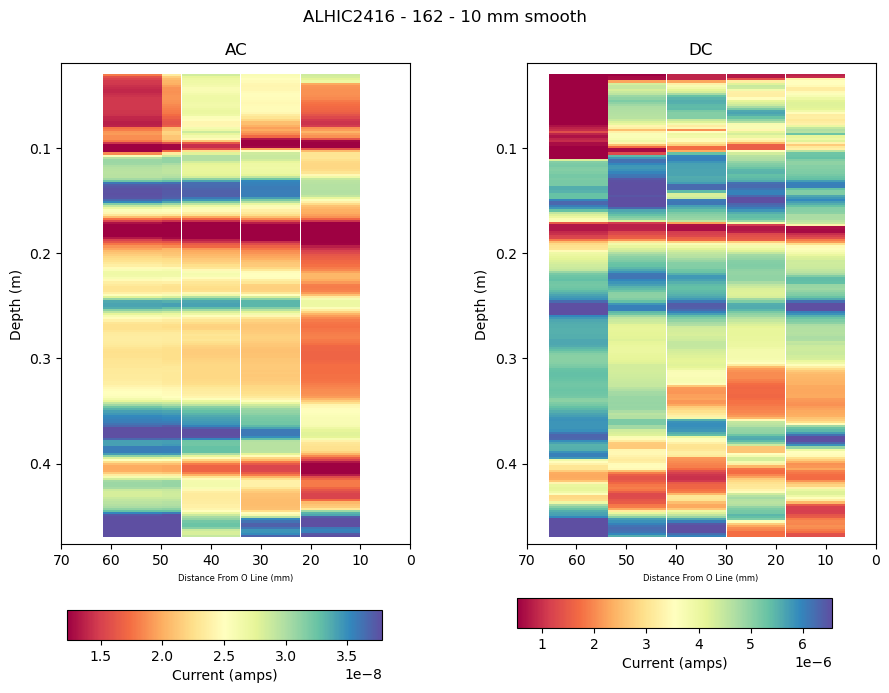

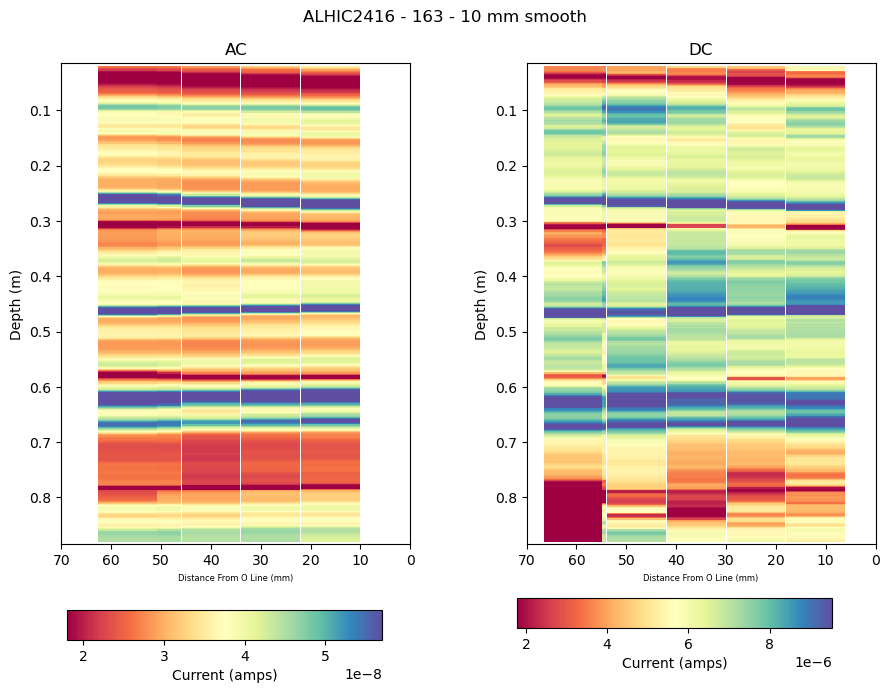

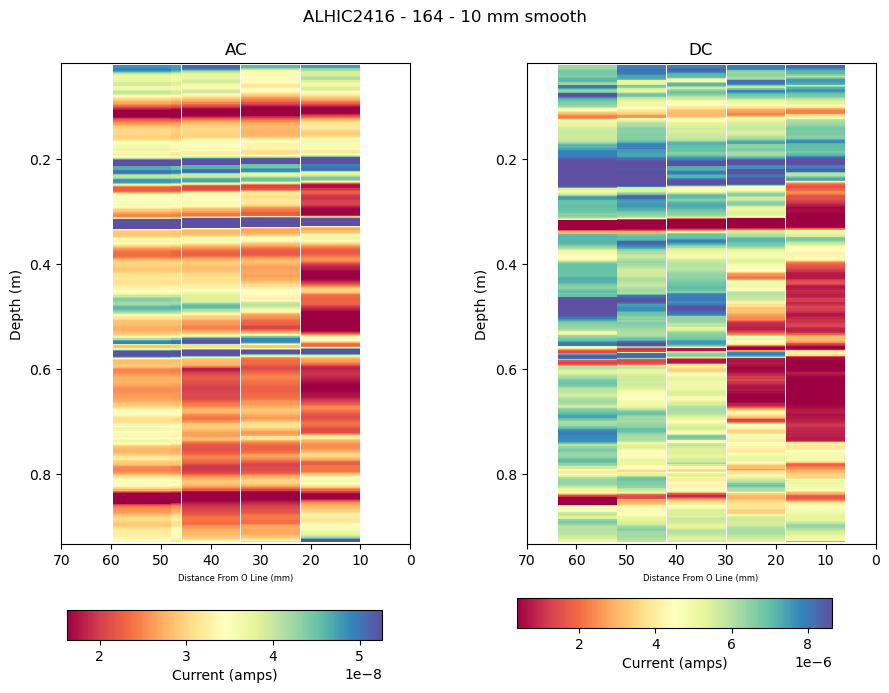

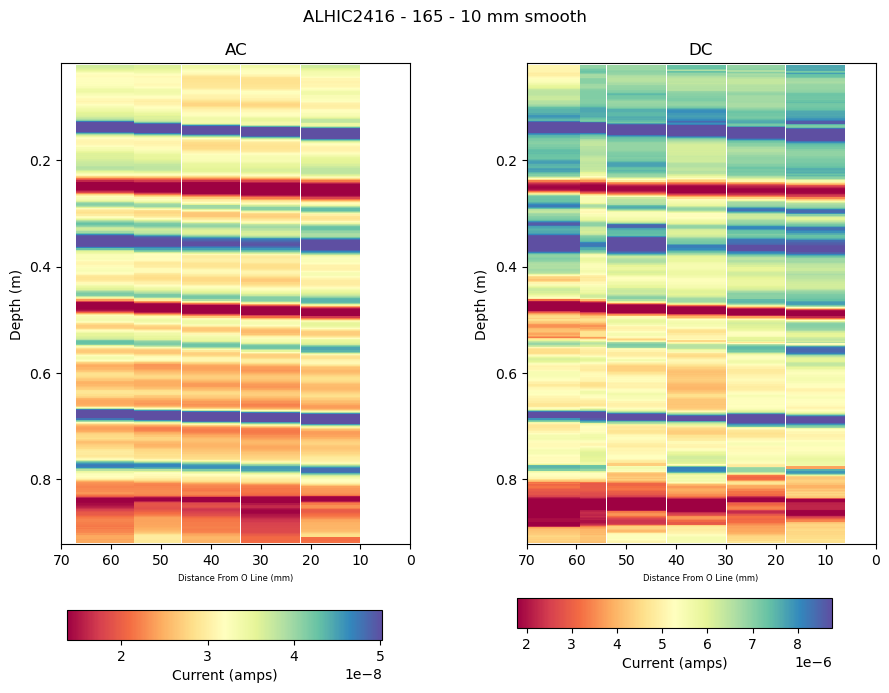

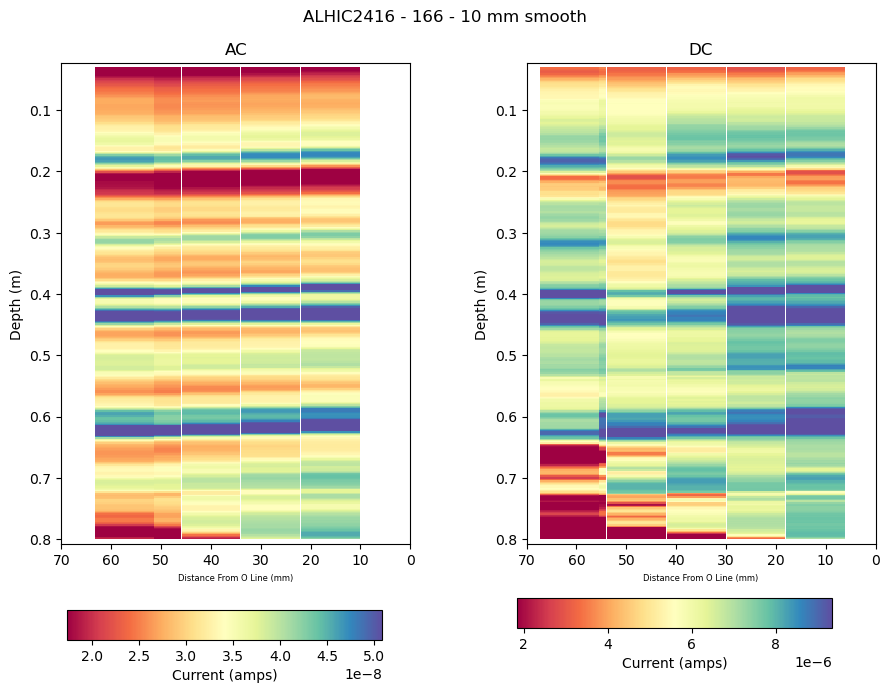

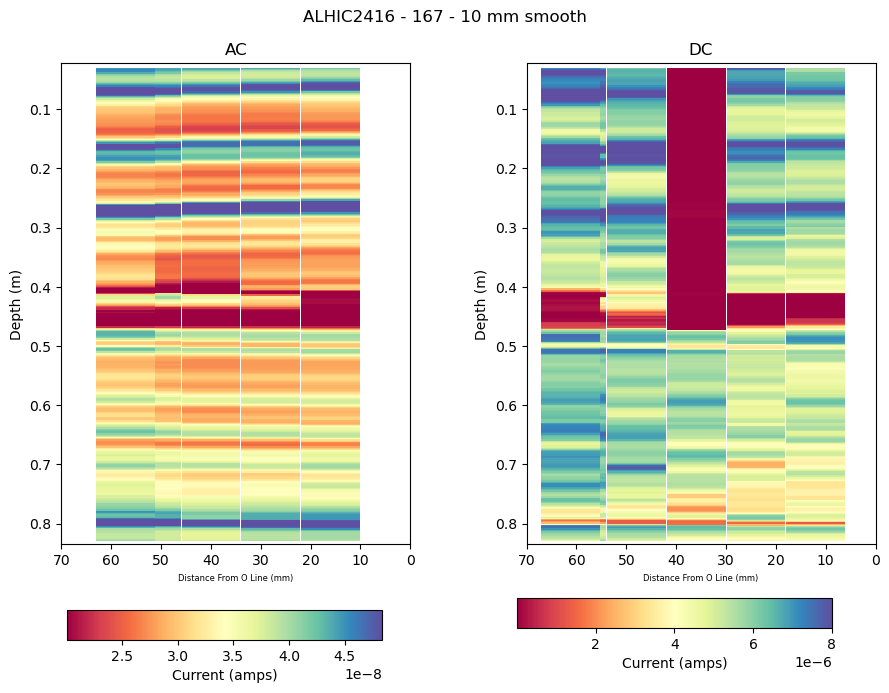

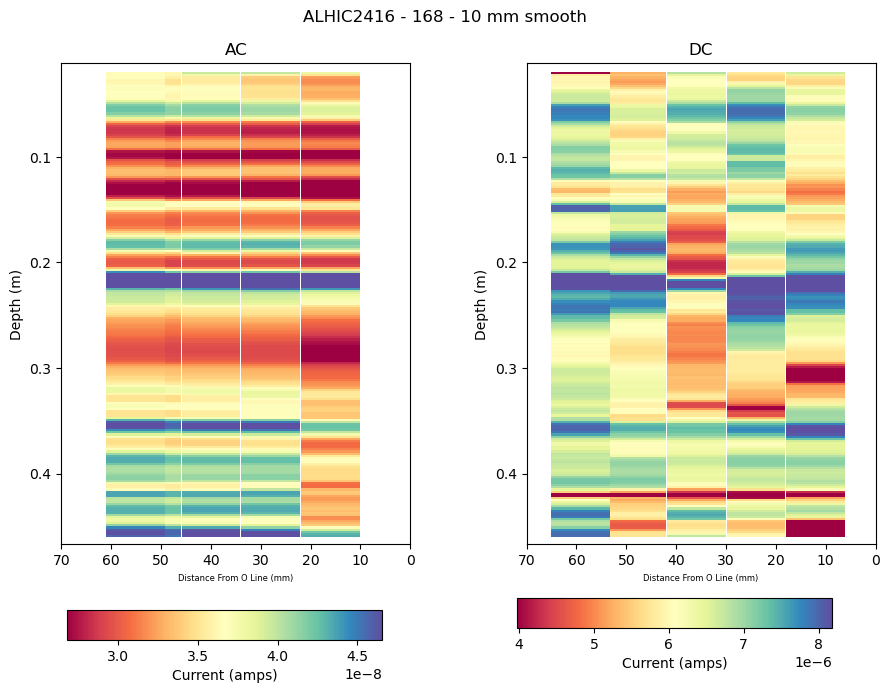

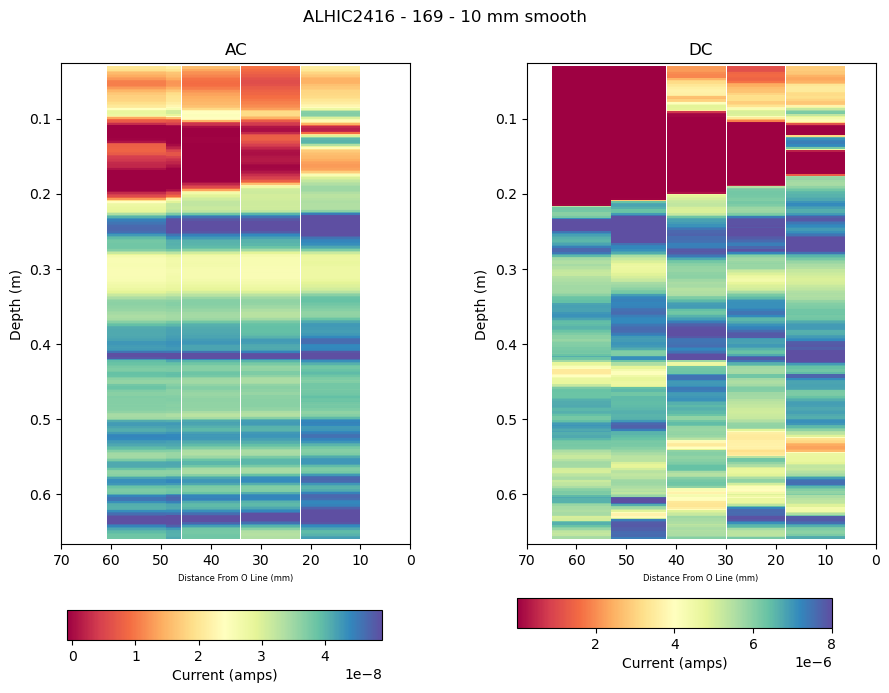

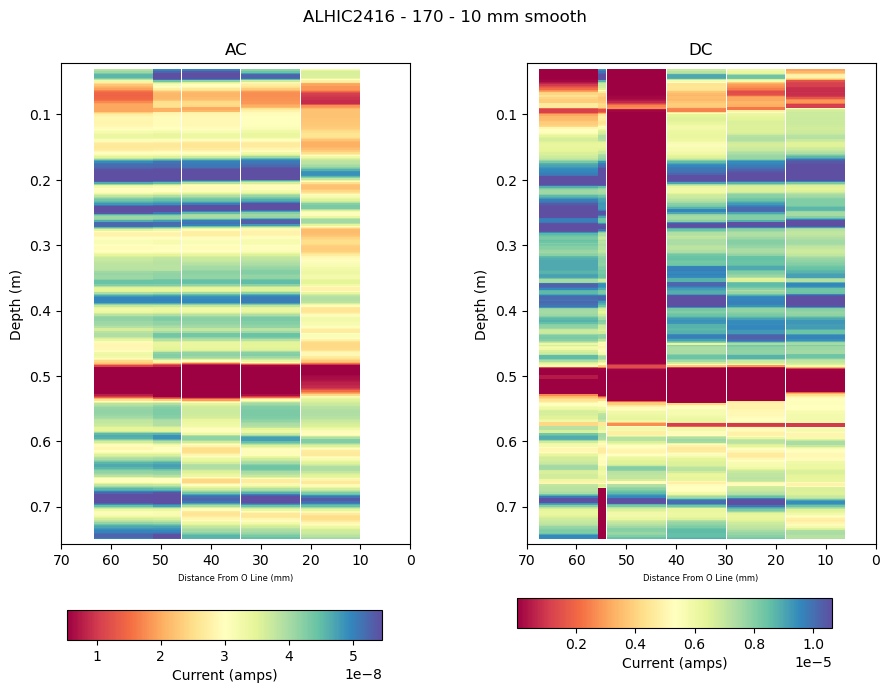

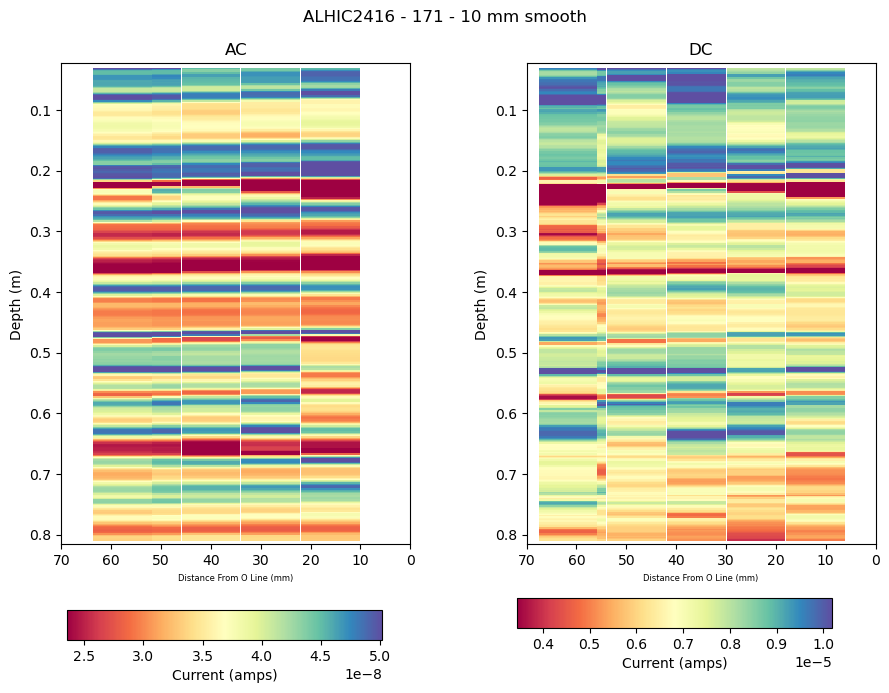

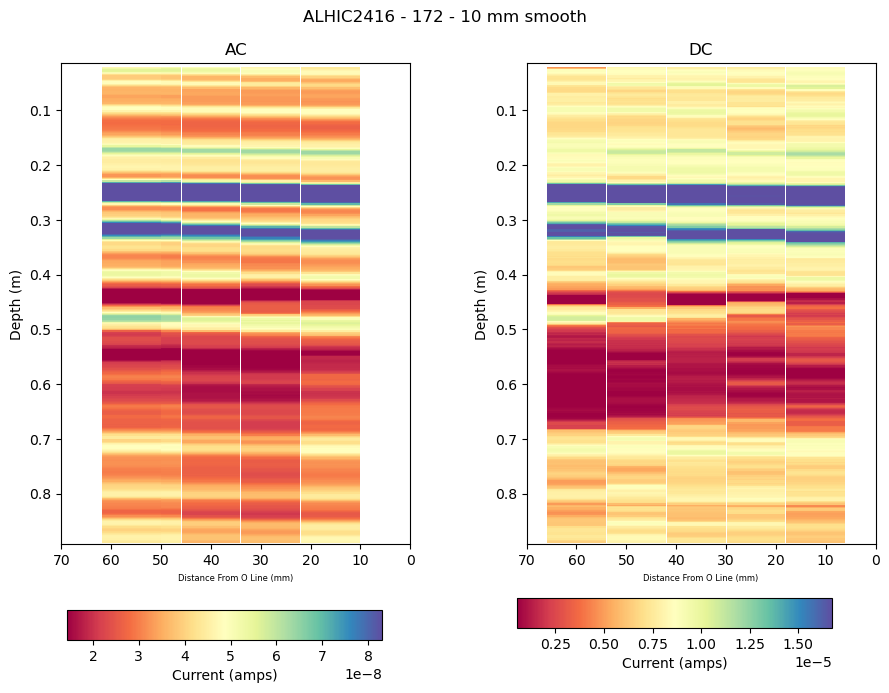

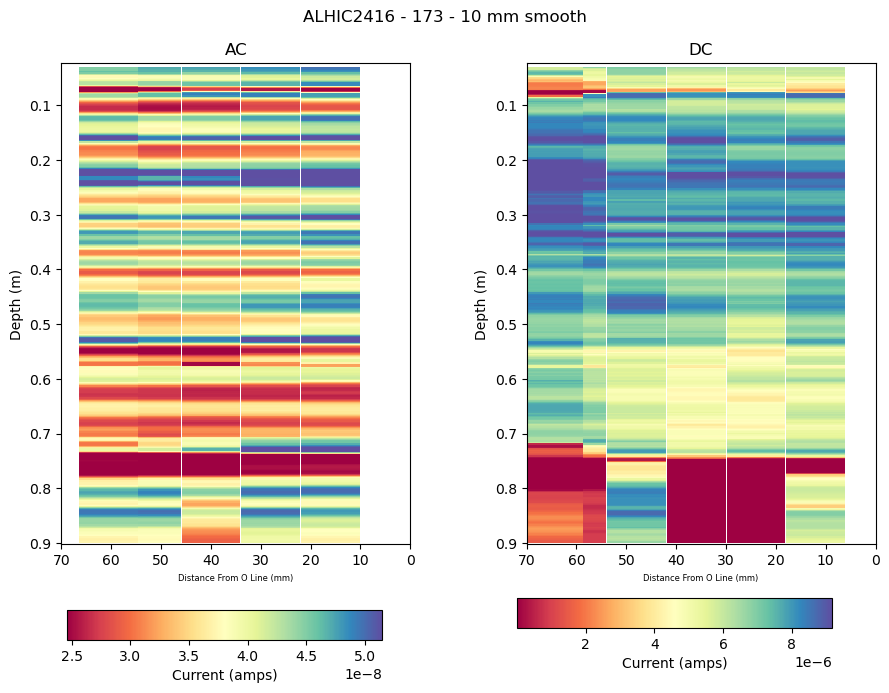

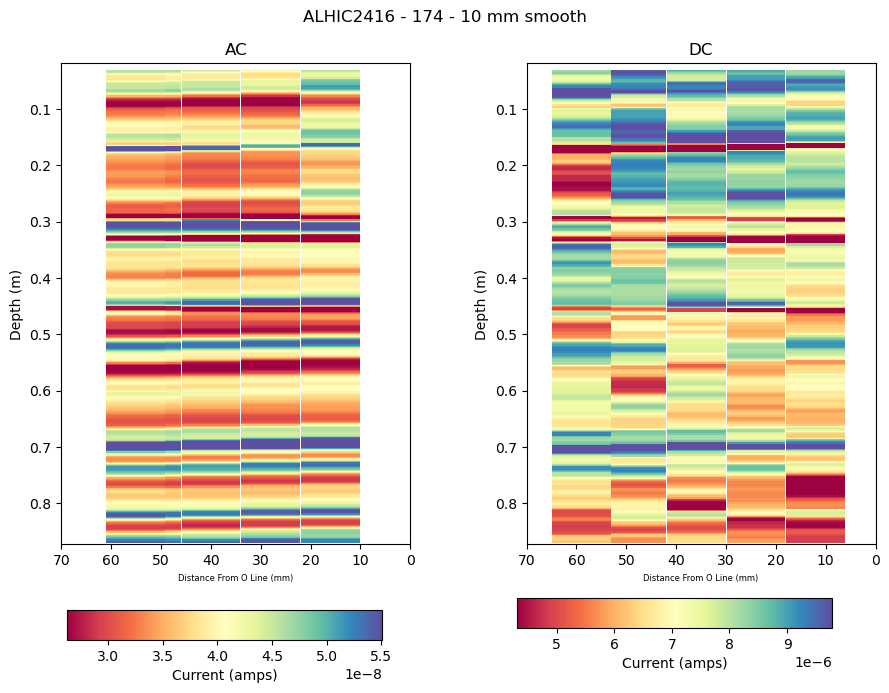

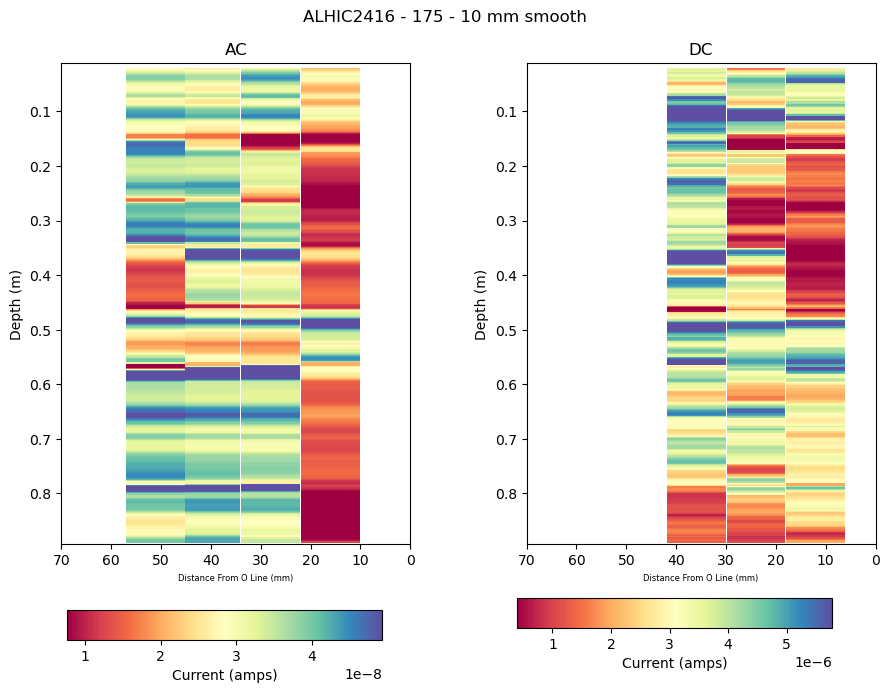

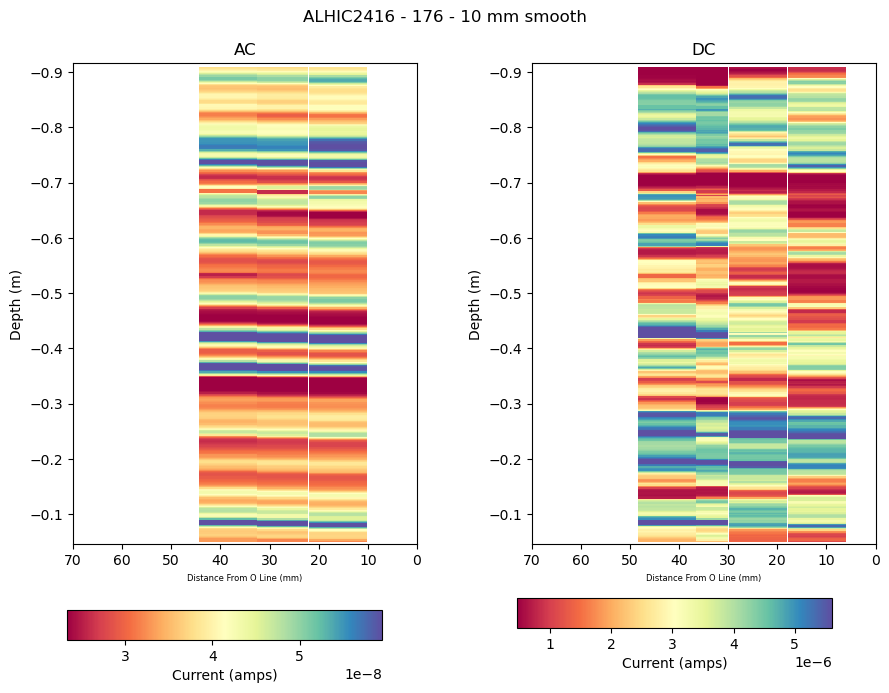

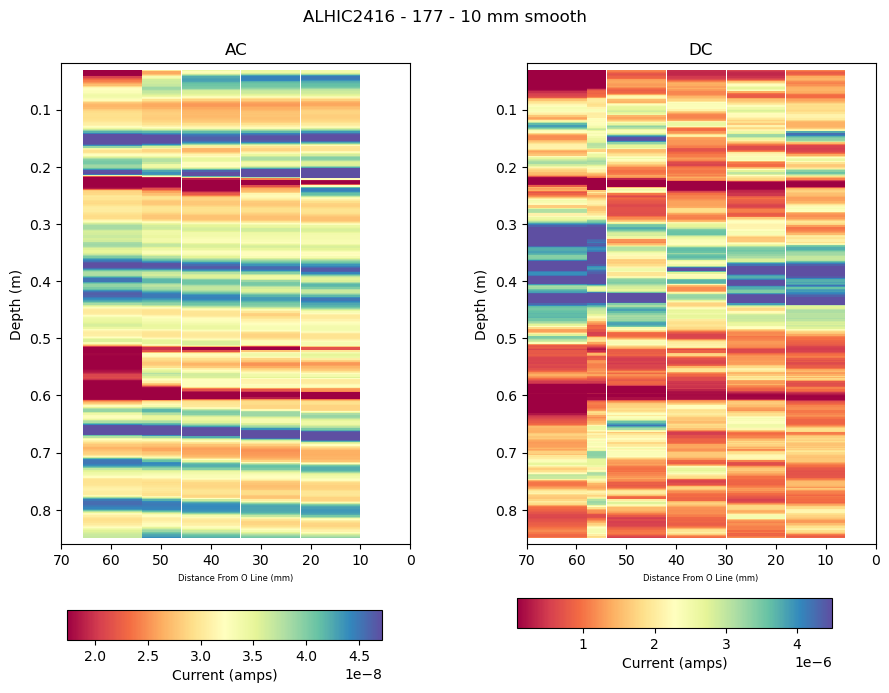

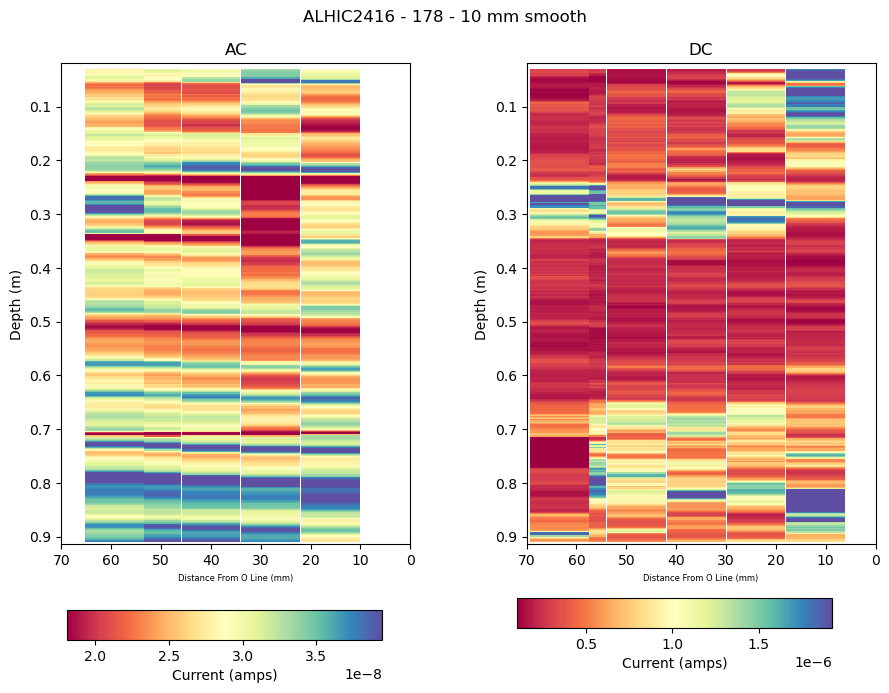

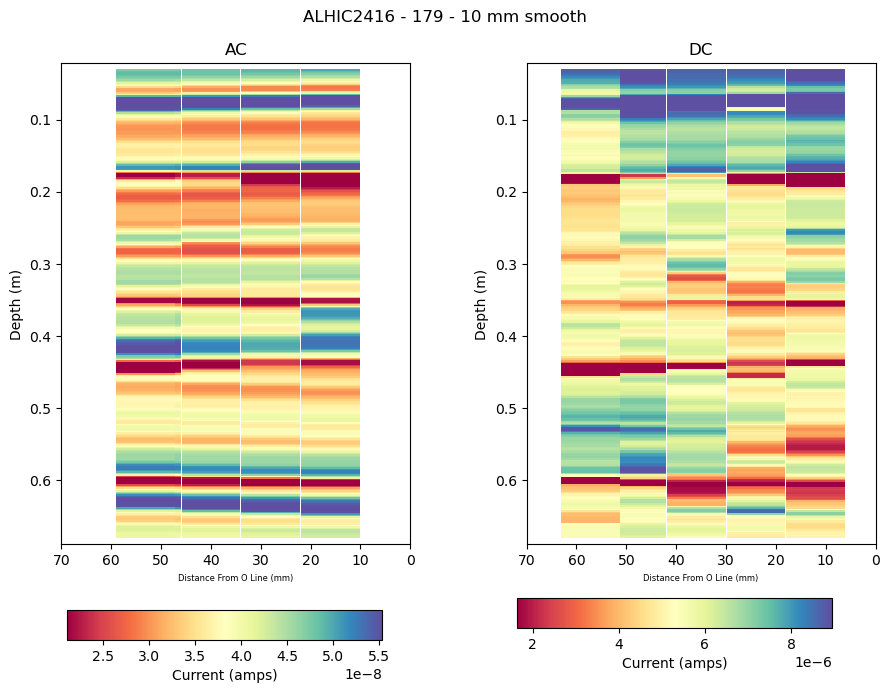

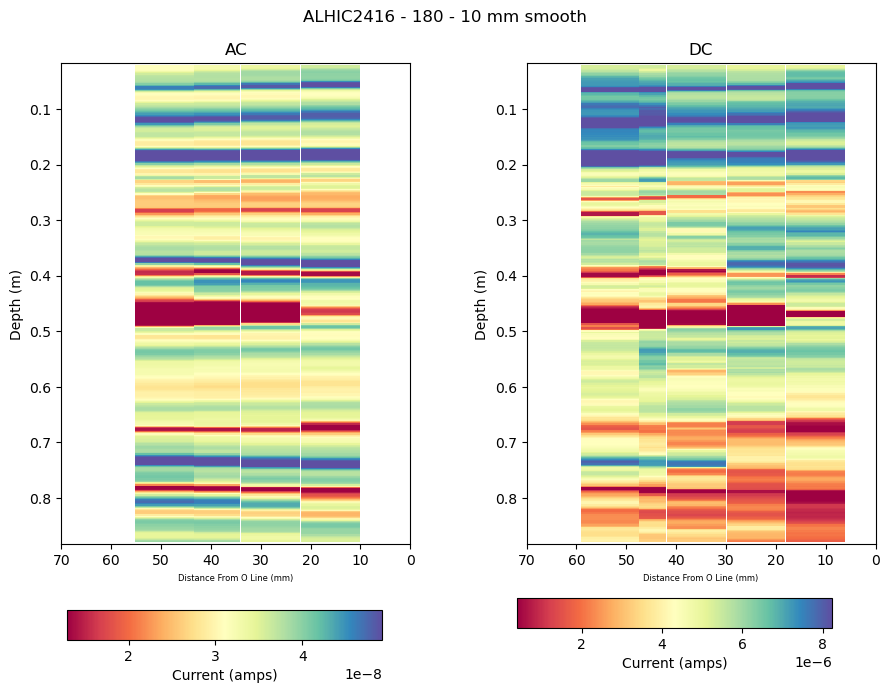

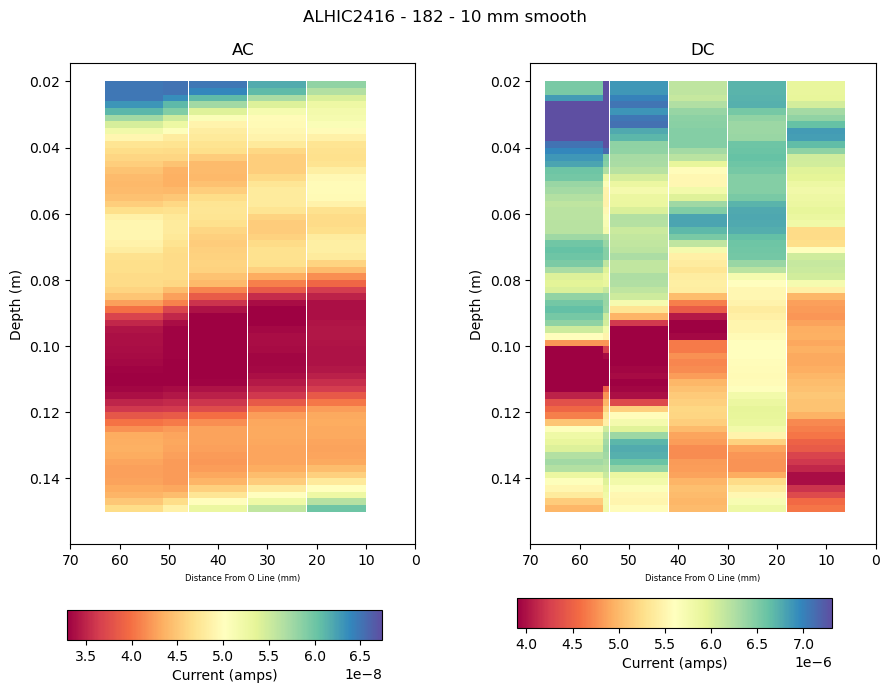

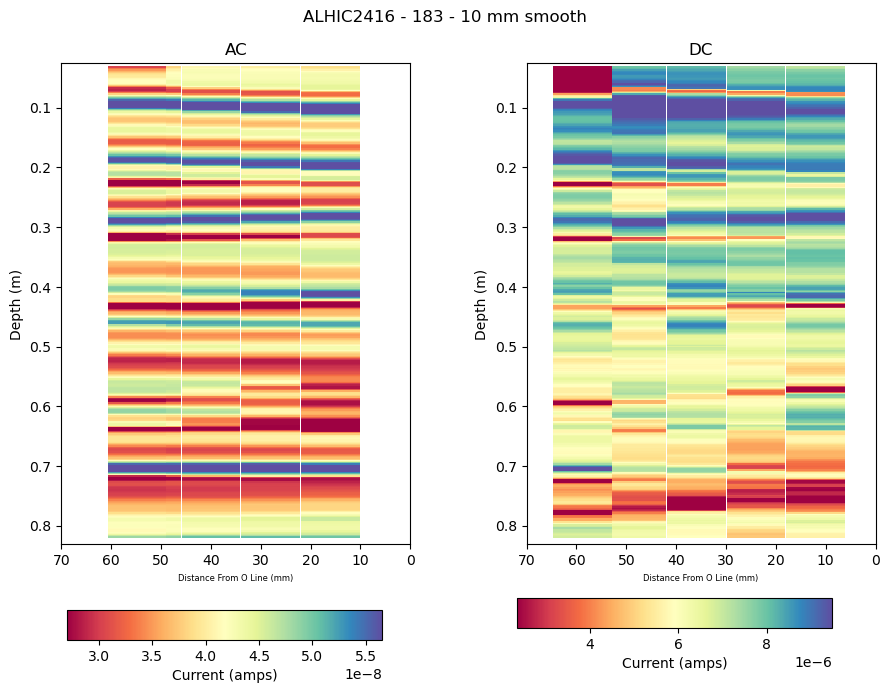

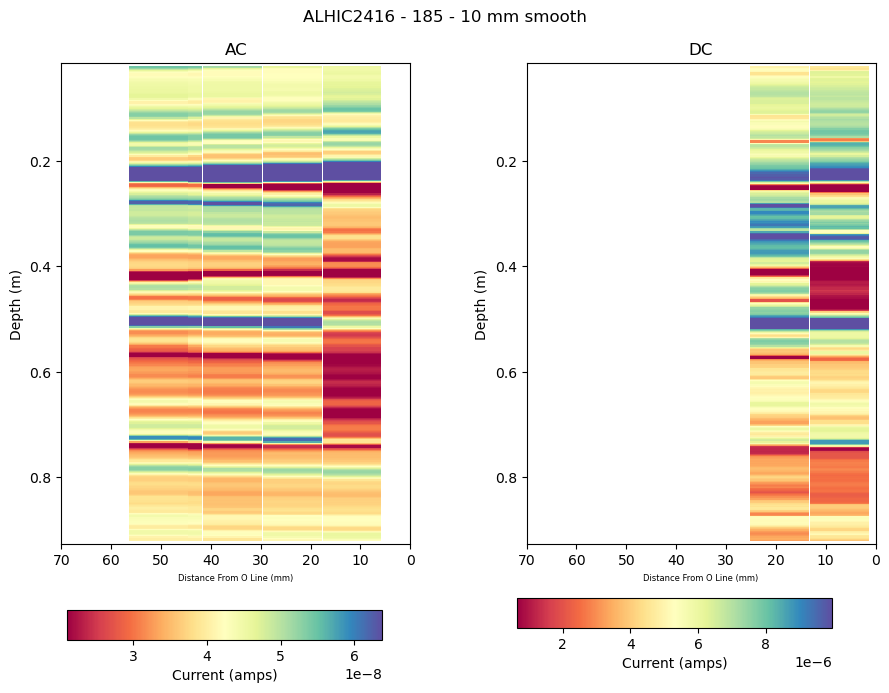

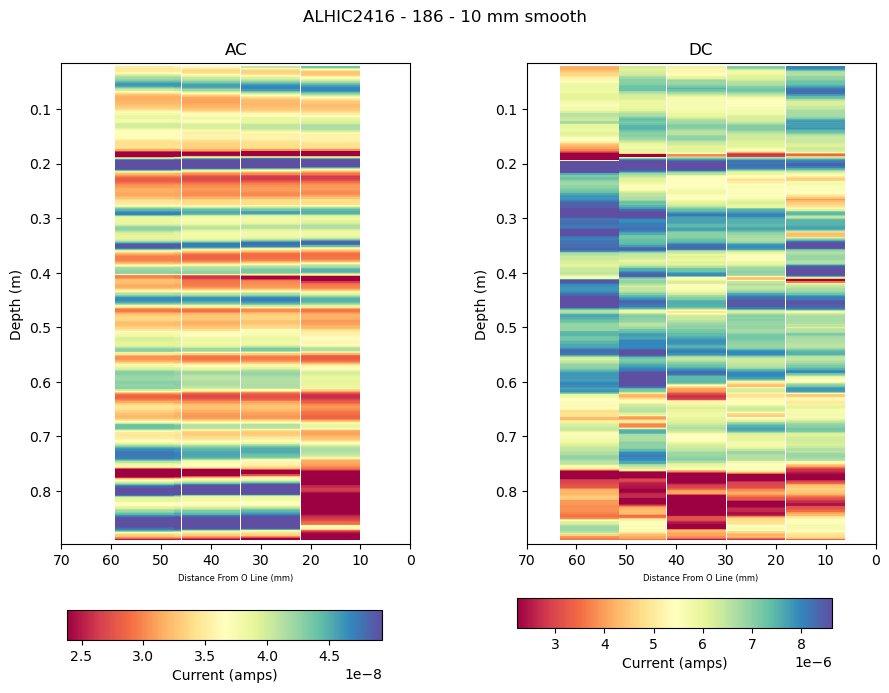

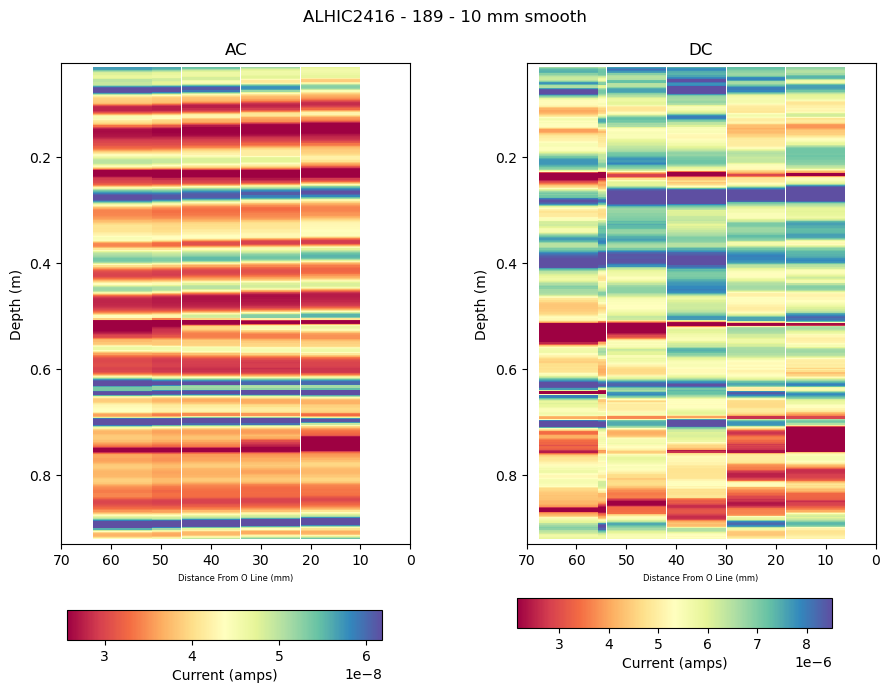

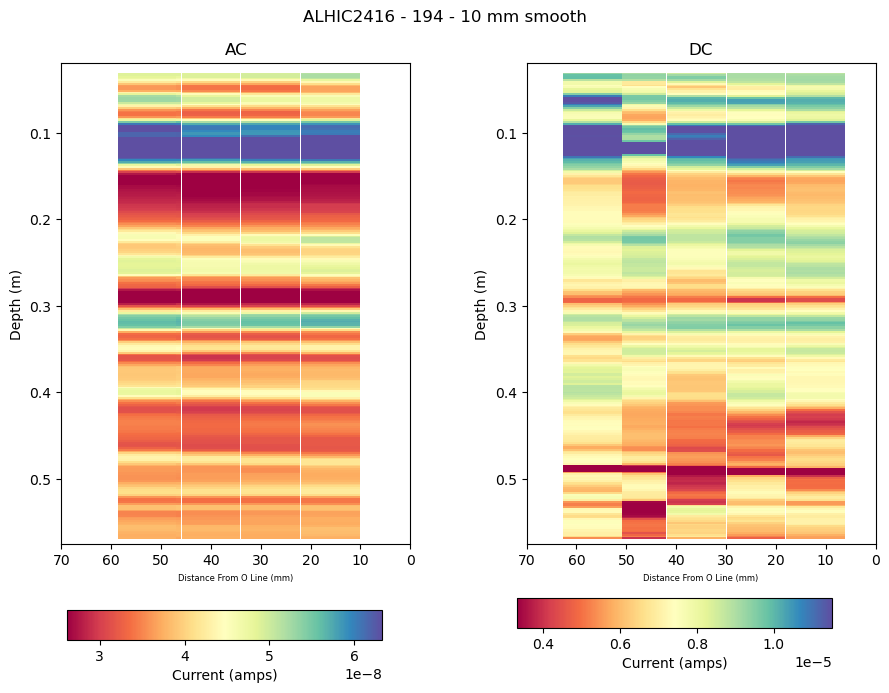

In [ ]:
for plt_but in [True,False]:

    if plt_but:
        print('Plotting with buttons')
    else:
        print('Plotting without buttons')

    for sec in unique(sections):

        
        # print update
        print("    Running Section "+str(sec))
        
        # set data to empty
        AC_w1 = None
        DC_w1 = None


        #loop through data 
        for d in data:
            
            # find faces
            if d.section==sec:
                if d.ACorDC == 'AC':
                    AC_w1 = d
                else:
                    DC_w1 = d



        
        # find depth max and minimum
        minvec = []
        maxvec = []
        AC_all = []
        DC_all = []
        for data_face in [AC_w1,DC_w1]:
            if data_face != None:
                minvec.append(min(data_face.depth))
                maxvec.append(max(data_face.depth))
                
                if data_face.ACorDC == 'AC':
                    AC_all.extend(data_face.meas)
                else:
                    DC_all.extend(data_face.meas)
        ACpltmin = np.percentile(AC_all,5)
        ACpltmax = np.percentile(AC_all,95)
        DCpltmin = np.percentile(DC_all,5)
        DCpltmax = np.percentile(DC_all,95)  
        ACrescale = lambda k: (k-ACpltmin) /  (ACpltmax-ACpltmin)
        DCrescale = lambda k: (k-DCpltmin) /  (DCpltmax-DCpltmin)
        dmin = min(minvec)
        dmax = max(maxvec)
        
        # make figure
        fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)
        
            

        for a in [ax[0],ax[2]]:
            a.set_xlim([70,0])
            a.set_xlabel('Distance From O Line (mm)',fontsize=6)
            a.set_ylim([dmax, dmin])
            a.set_ylabel('Depth (m)')
            
            
        for a,data_face in zip([ax[0],ax[2]],[AC_w1,DC_w1]):
            
            if data_face != None:
                
                yall = data_face.y_s - data_face.y_left
                yvec = data_face.y_vec - data_face.y_left

                
                if data_face.ACorDC =='AC':
                    rescale = ACrescale
                else:
                    rescale = DCrescale
            
            
            
                # plot data
                plotquarter(yvec,
                            yall,
                            data_face.depth_s,
                            data_face.meas_s,
                            data_face.button_s,
                            a,
                            rescale,
                            plot_button = plt_but)
        
        # housekeeping
        fig.suptitle('ALHIC2416 - '+str(sec)+' - '+str(window)+' mm smooth')
        ax[1].axis('off')
        ax[0].set_title('AC')
        ax[2].set_title('DC')
        
        fig.tight_layout()
        plt.subplots_adjust(wspace=0)
    
        #ad colorbar
        #fig.subplots_adjust(bottom=0.8)

        ACcbar_ax = fig.add_axes([0.08,-0.07,0.35,0.05])
        #ACcbar_ax = fig.add_axes([0.07,-0.05,0.35,0.05])
        ACnorm = matplotlib.colors.Normalize(vmin=ACpltmin,vmax=ACpltmax)
        DCcbar_ax = fig.add_axes([0.58,-0.05,0.35,0.05])
        DCnorm = matplotlib.colors.Normalize(vmin=DCpltmin,vmax=DCpltmax)


        ACcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=ACnorm, cmap=my_cmap),cax=ACcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        DCcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=DCnorm, cmap=my_cmap),cax=DCcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        
        #ACcbar.formatter.set_powerlimits((0, 0))
        #DCcbar.formatter.set_powerlimits((0, 0))

        
        # save figure
        try:
            if int(sec) <10:
                sec = '0'+sec
        except:
            print("sec not converted to integer")
        if plt_but:
            fname = path_to_figures +'basic_button/dic1-'+str(sec)+'-button.png'
        else:
            fname = path_to_figures +'basic_nobutton/dic1-'+str(sec)+'-no-button.png'

        fig.savefig(fname,bbox_inches='tight')



# Make the same plots, but with a common colorbar.

Plotting with buttons
    Running Section 142
    Running Section 150
    Running Section 151
    Running Section 152
    Running Section 153
    Running Section 154
    Running Section 155
    Running Section 156
    Running Section 157
    Running Section 158
    Running Section 159
    Running Section 160
    Running Section 161
    Running Section 162
    Running Section 163
    Running Section 164
    Running Section 165
    Running Section 166
    Running Section 167
    Running Section 168
    Running Section 169


/var/folders/b3/ghp5pyzj7_x9mhrs3x202bm80000gn/T/ipykernel_49165/3212017731.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)


    Running Section 170
    Running Section 171
    Running Section 172
    Running Section 173
    Running Section 174
    Running Section 175
    Running Section 176
    Running Section 177
    Running Section 178
    Running Section 179
    Running Section 180
    Running Section 182
    Running Section 183
    Running Section 185
    Running Section 186
    Running Section 189
    Running Section 194


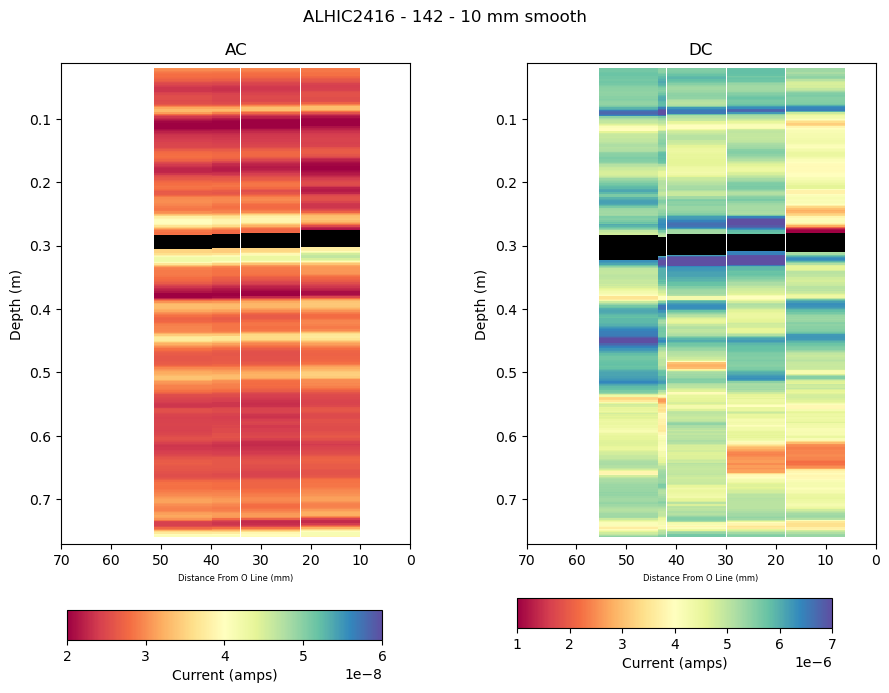

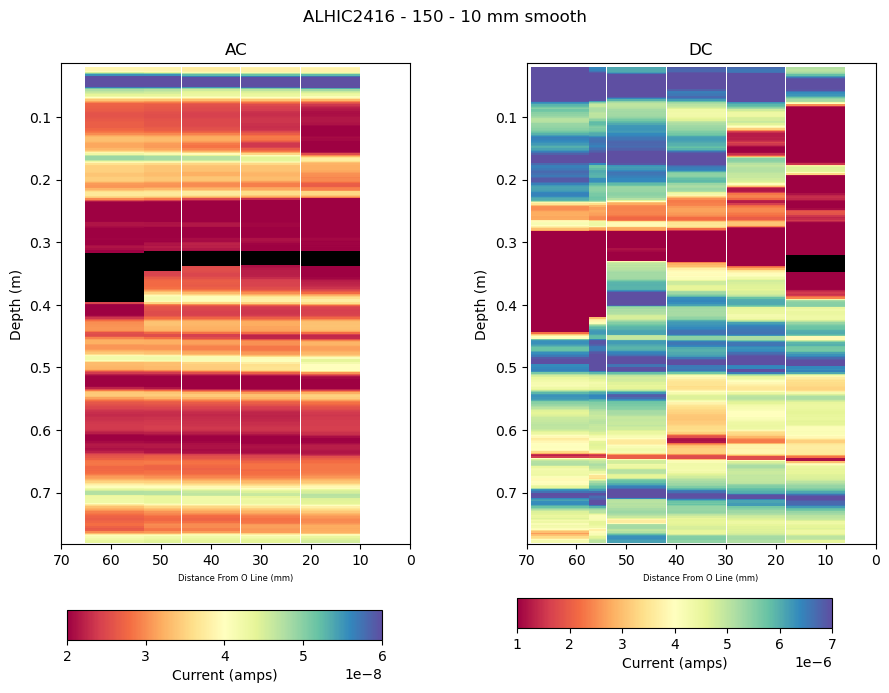

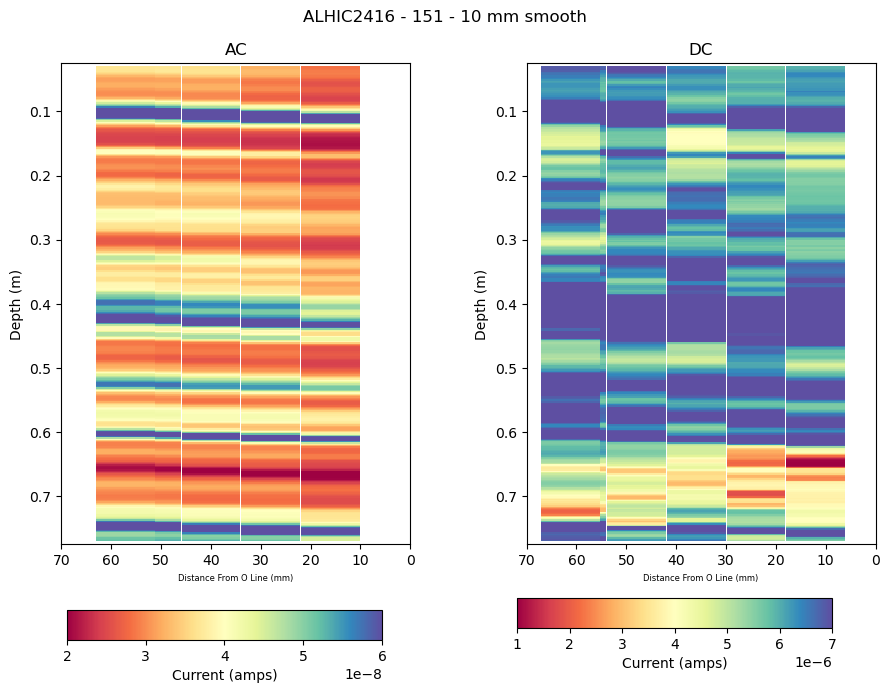

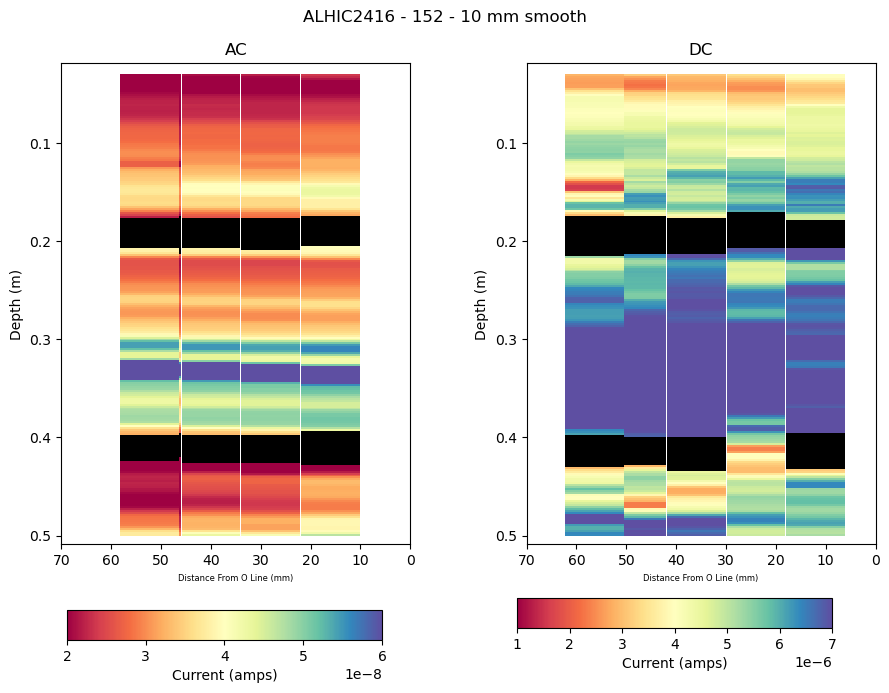

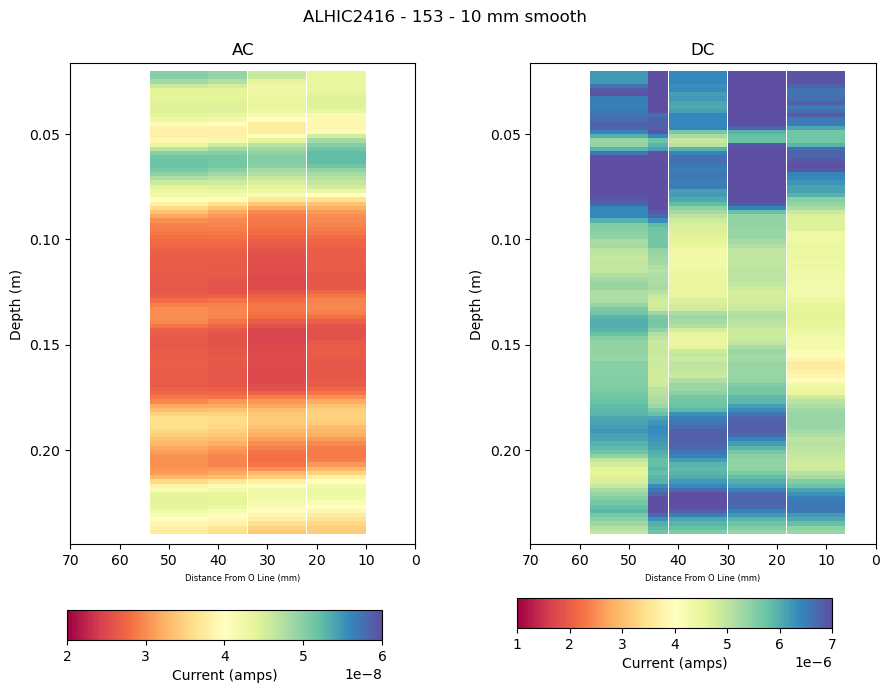

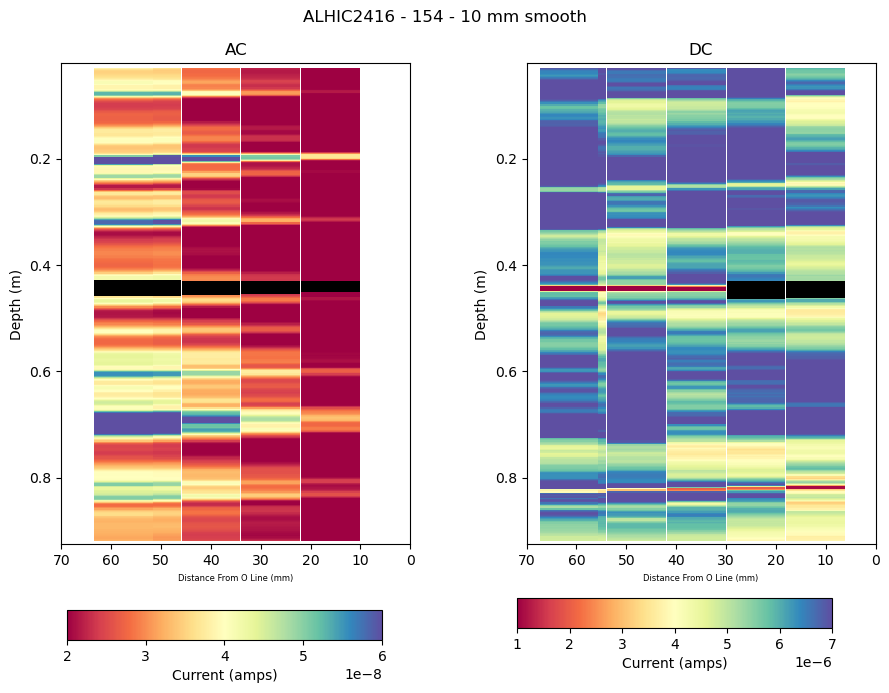

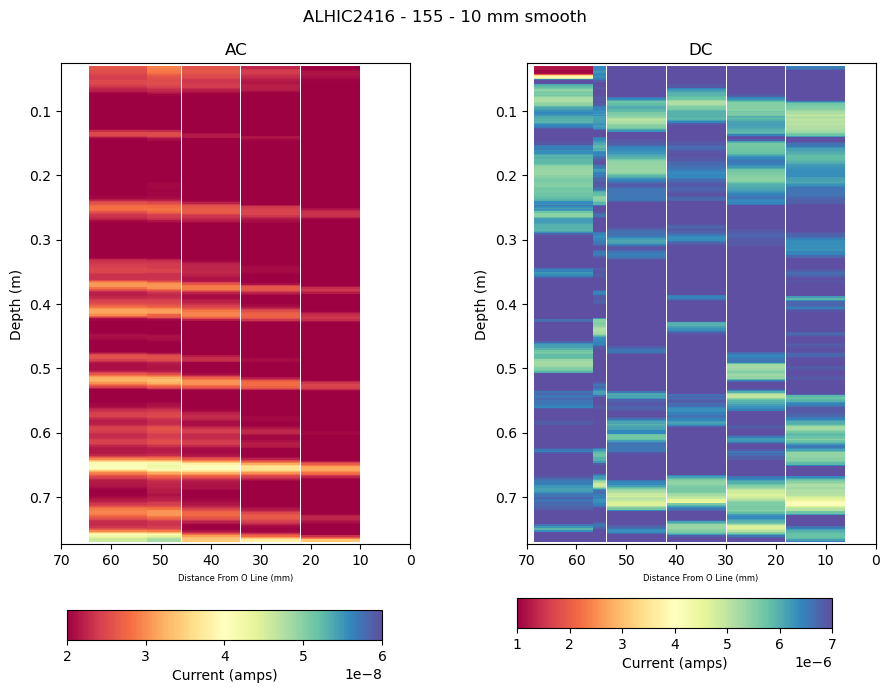

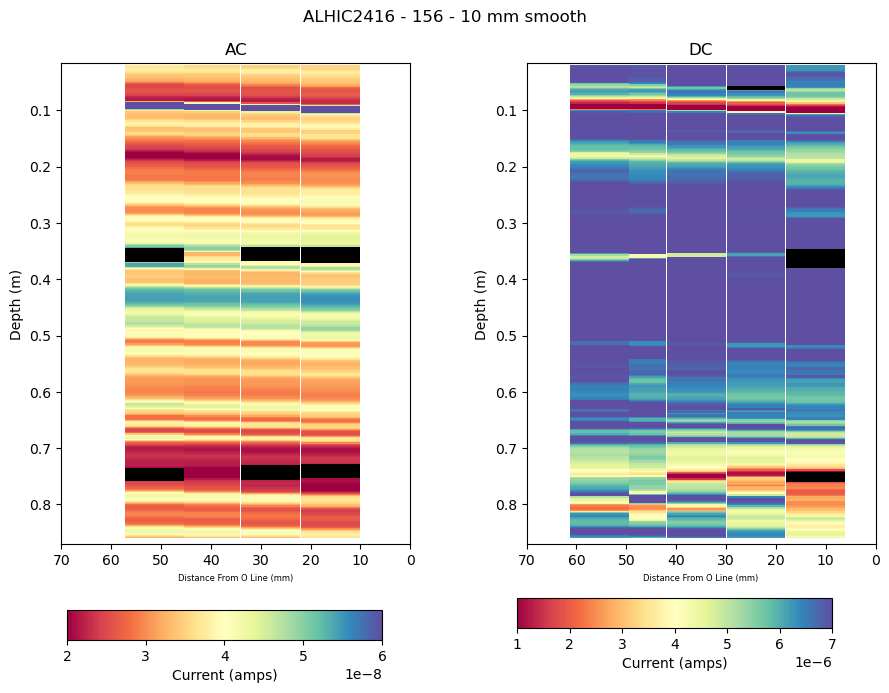

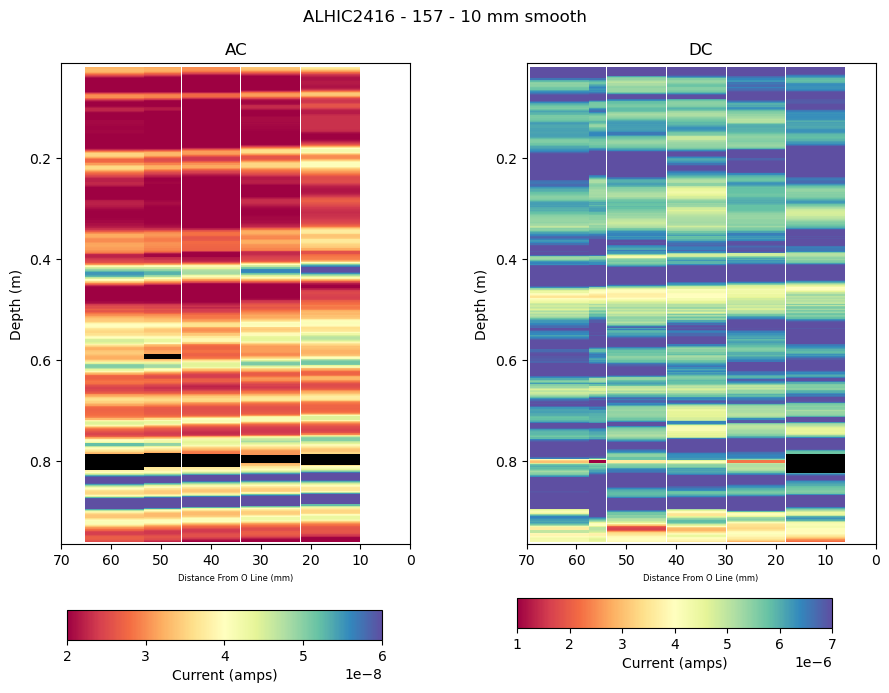

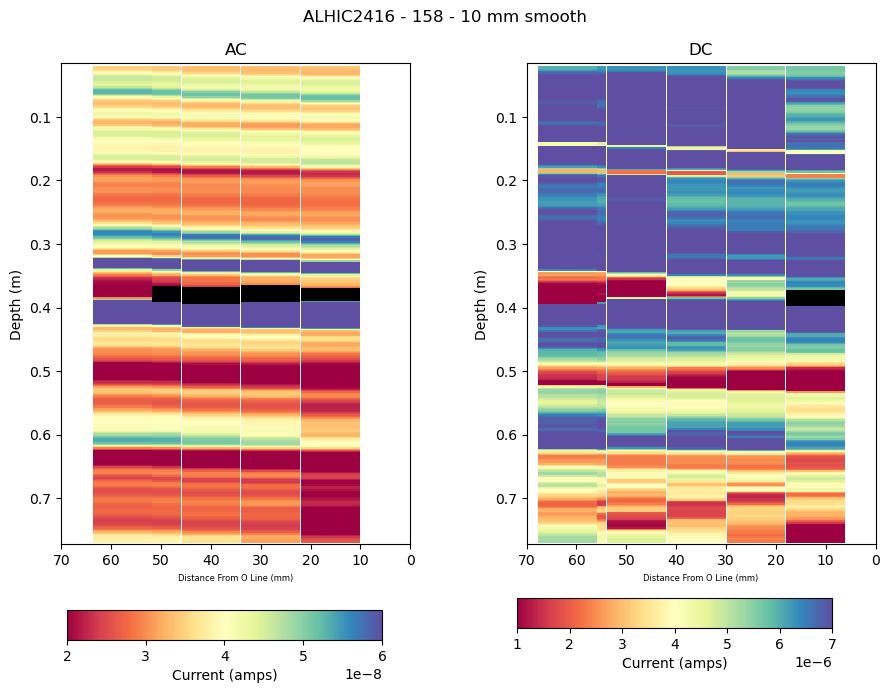

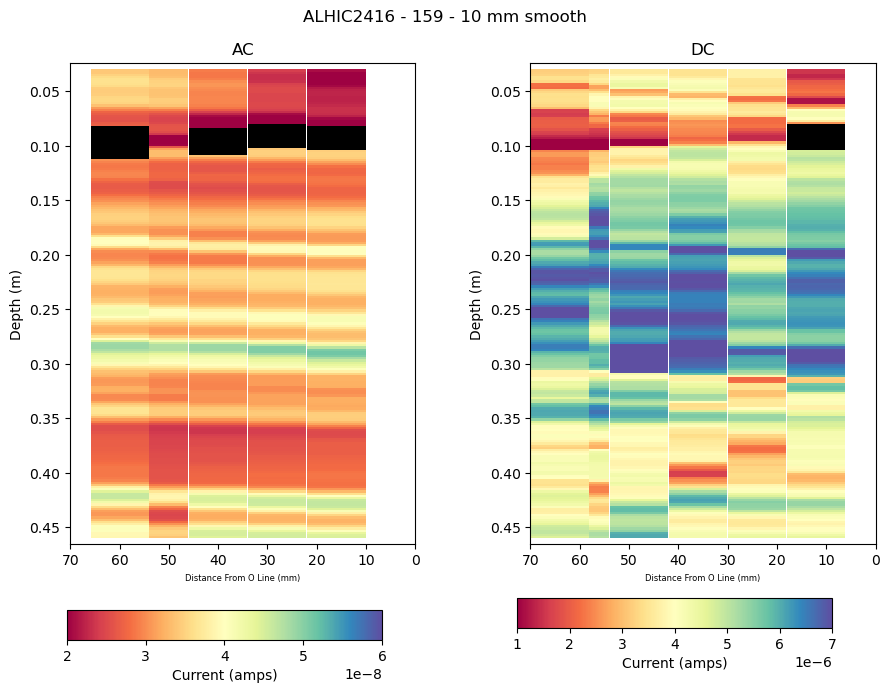

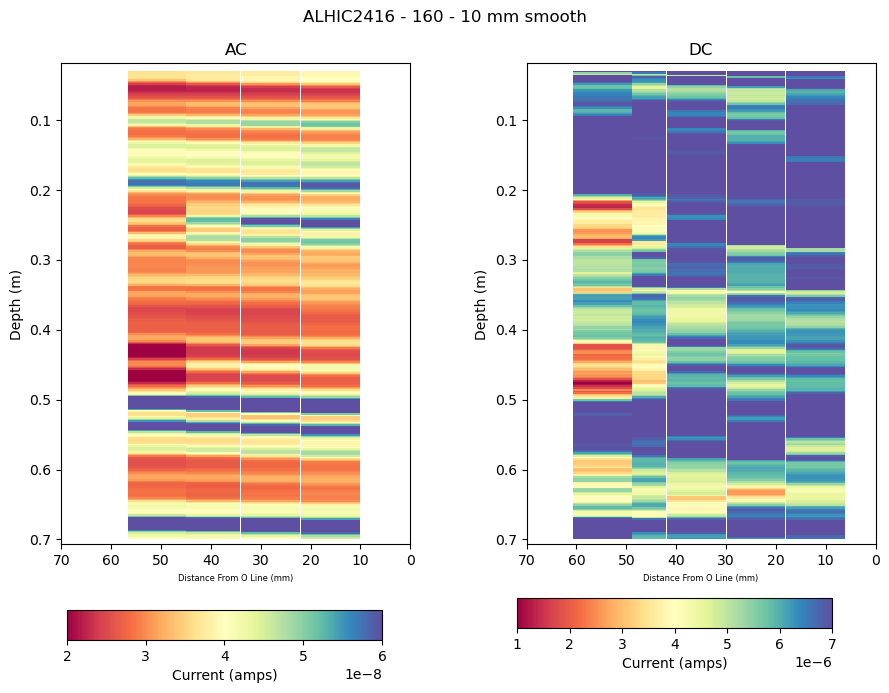

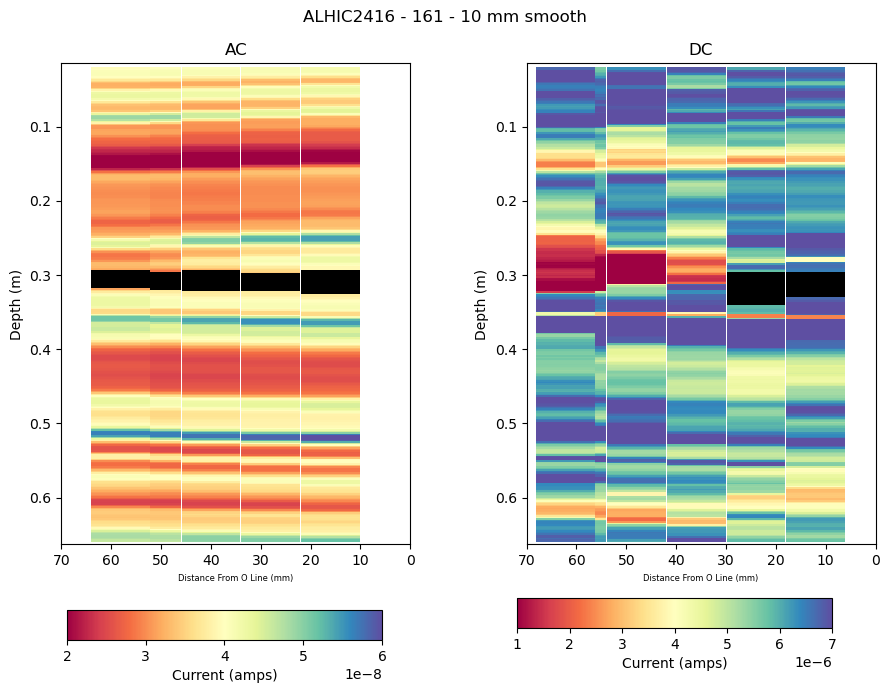

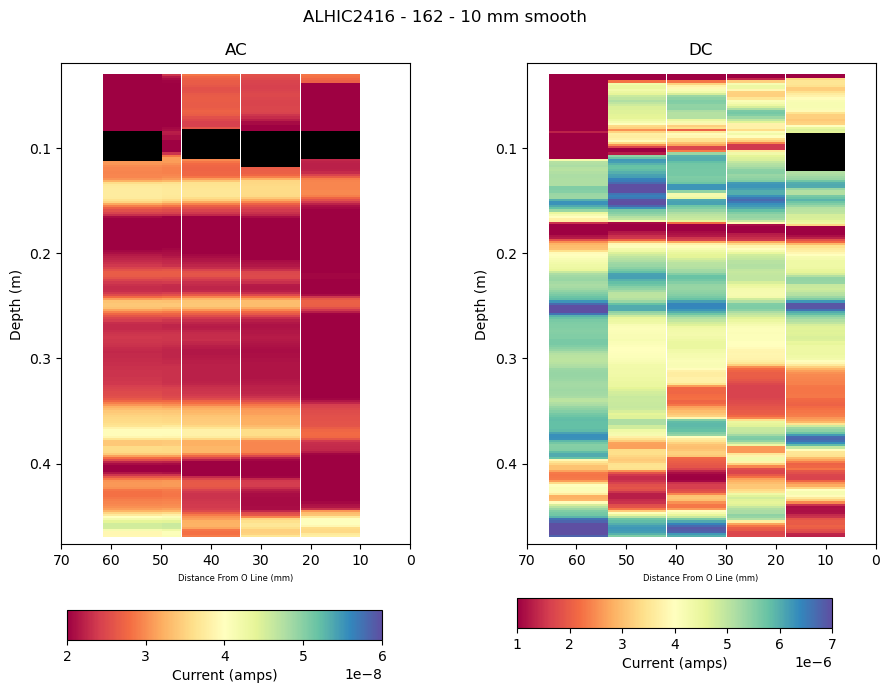

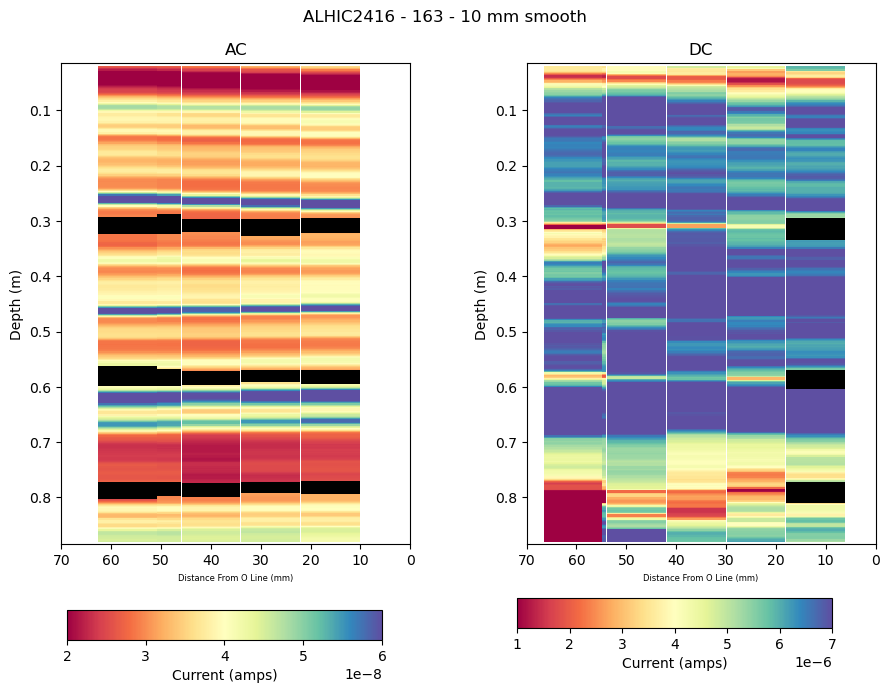

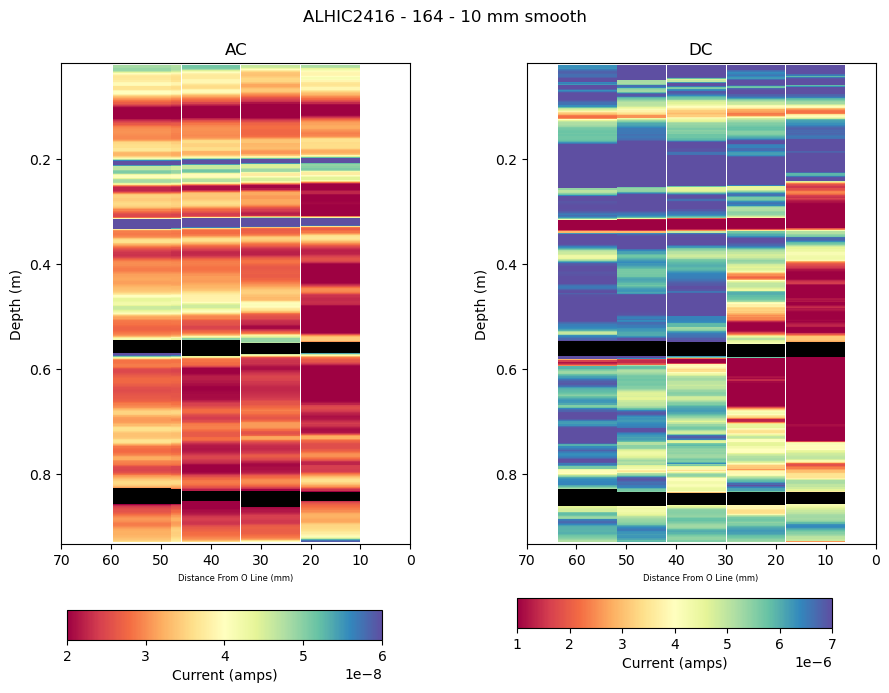

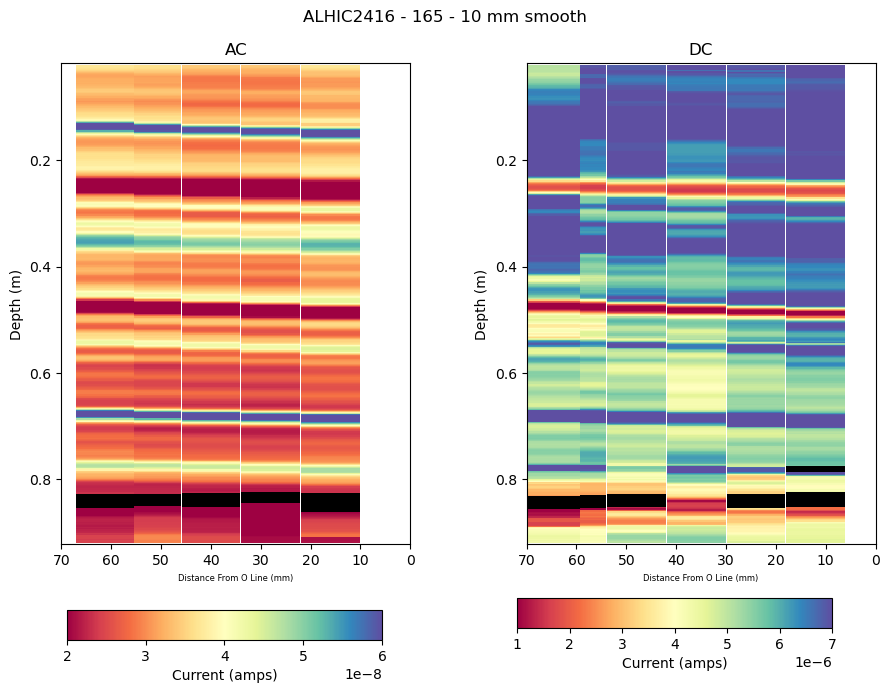

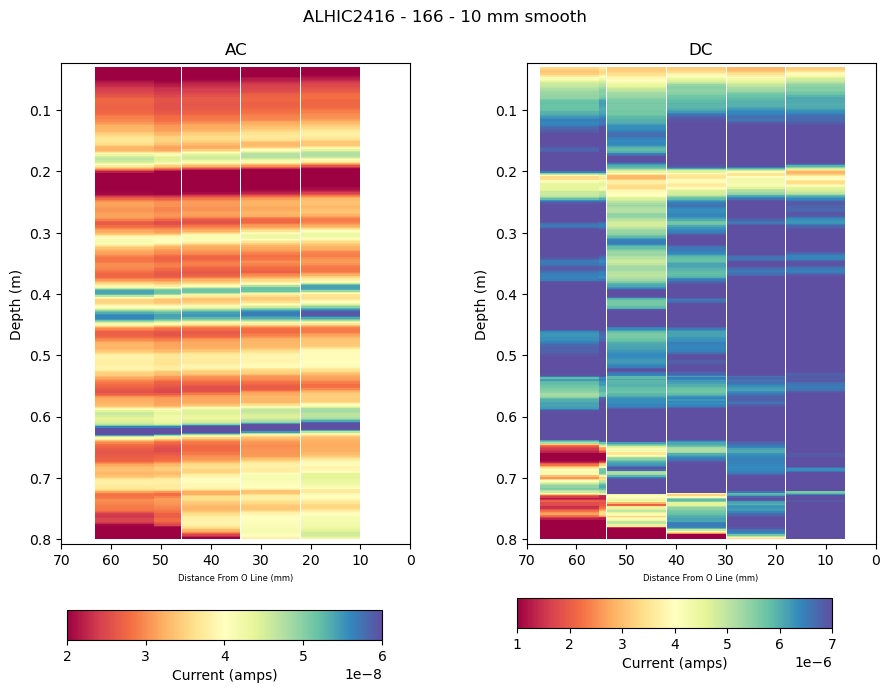

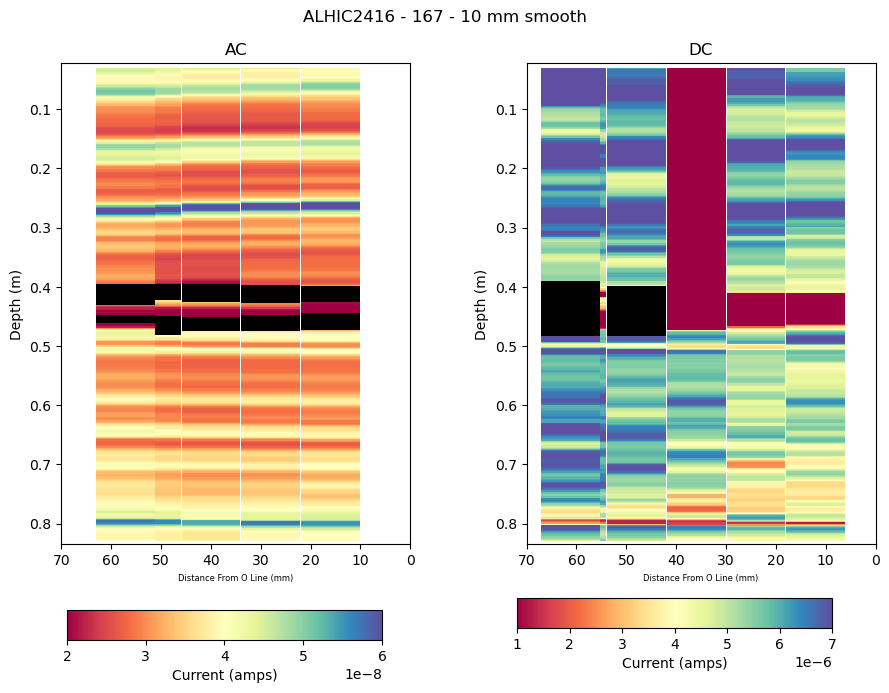

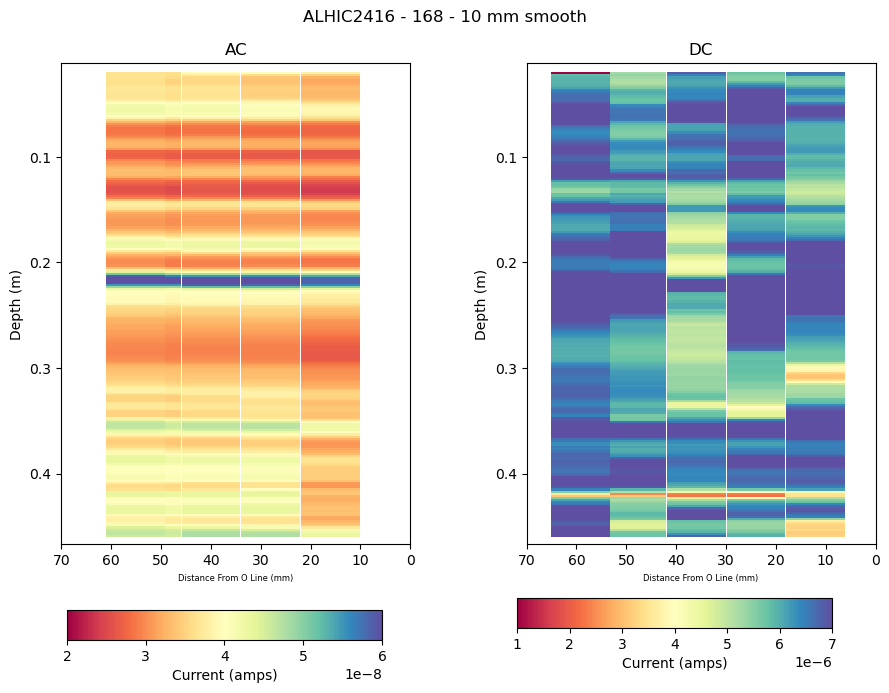

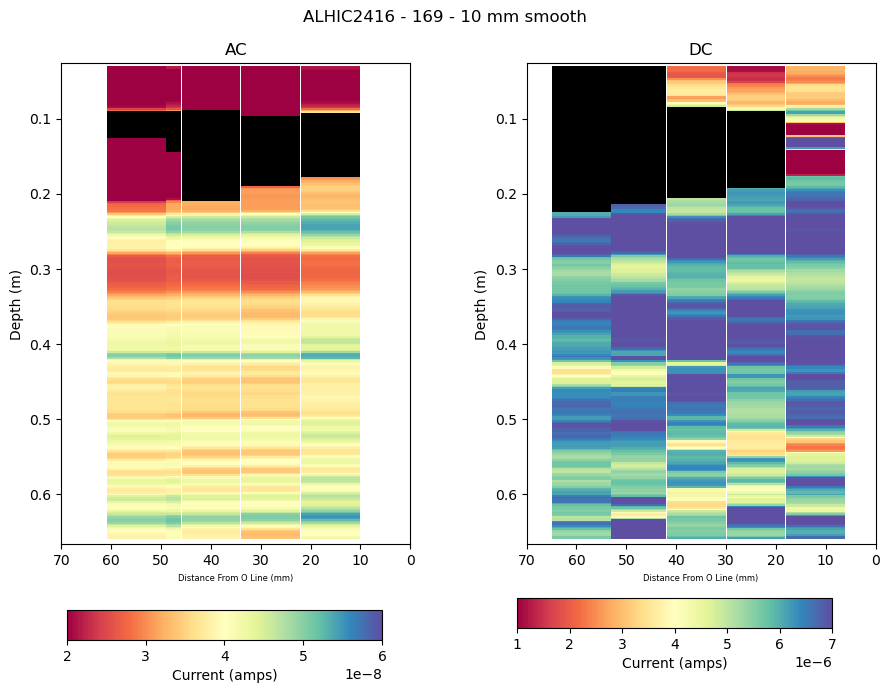

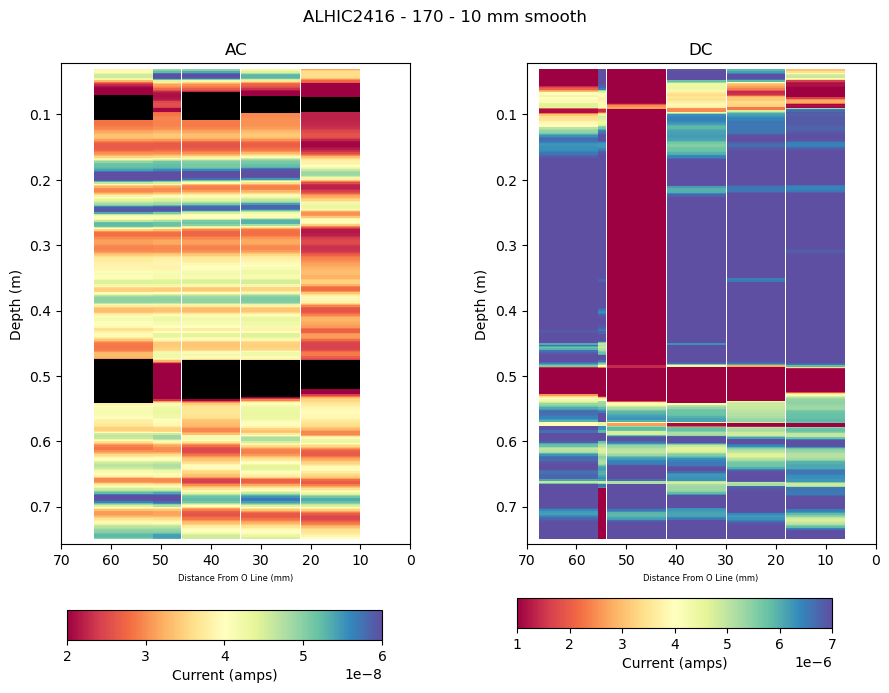

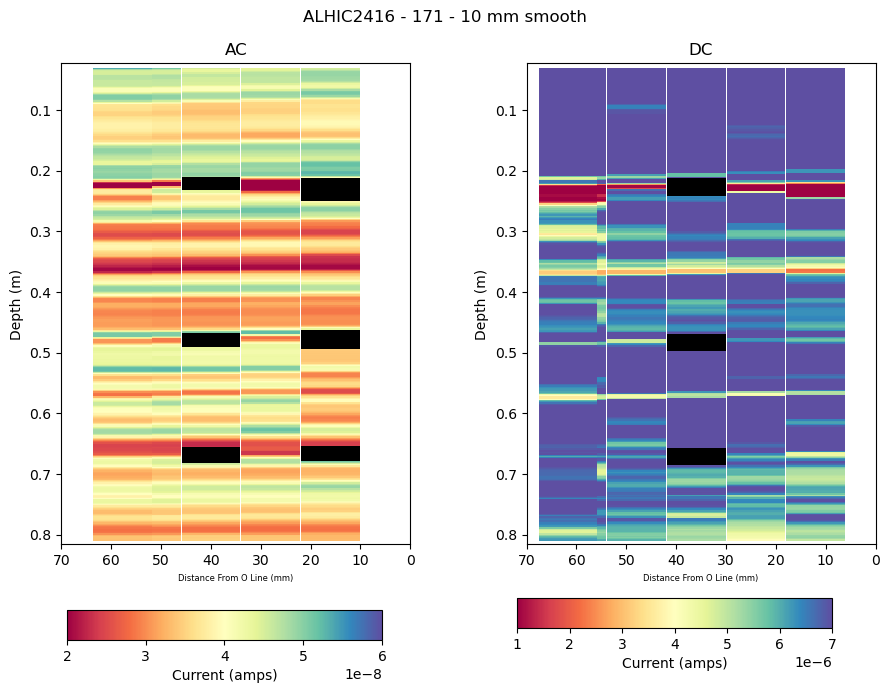

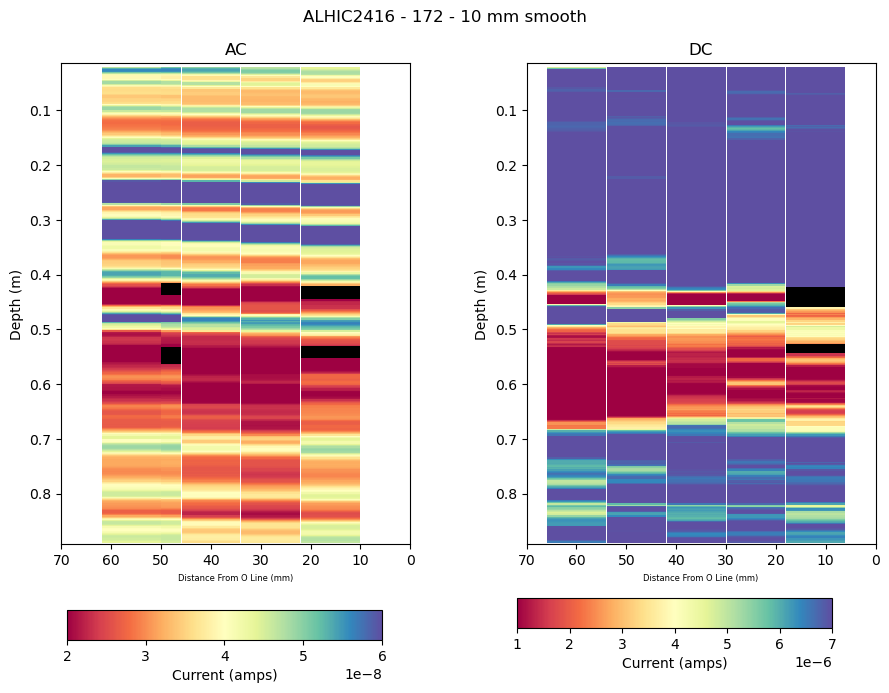

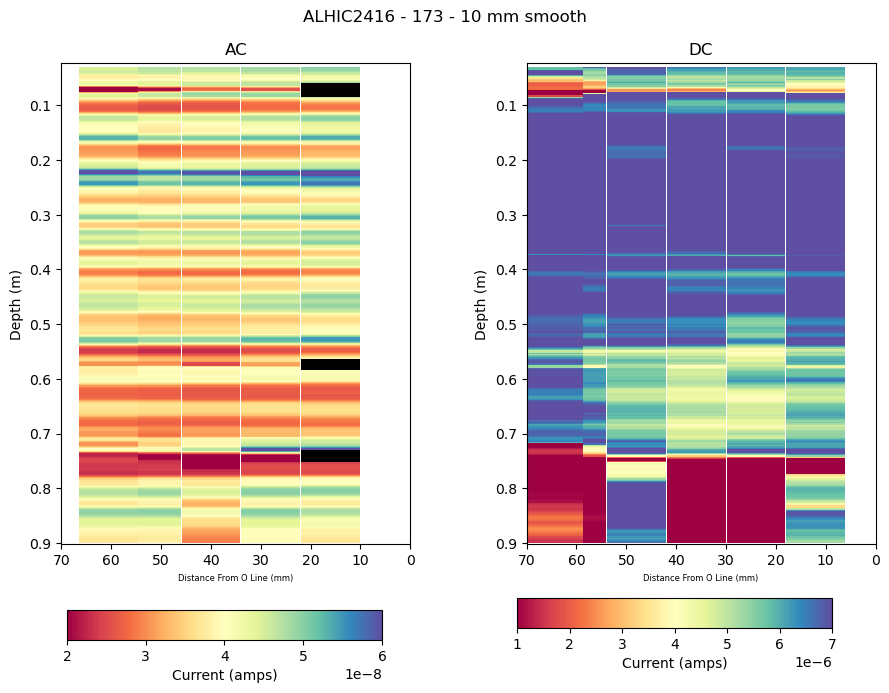

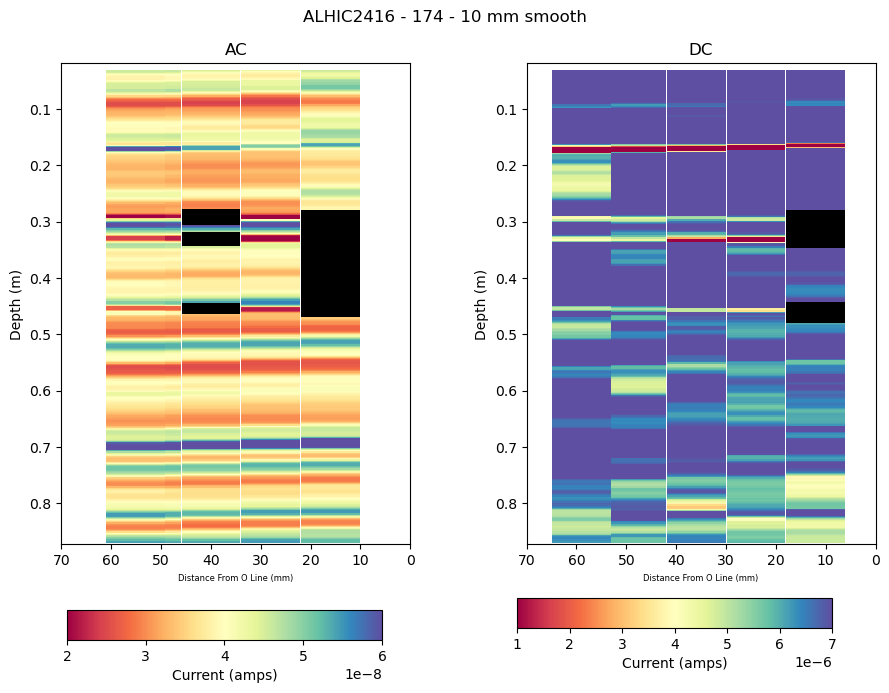

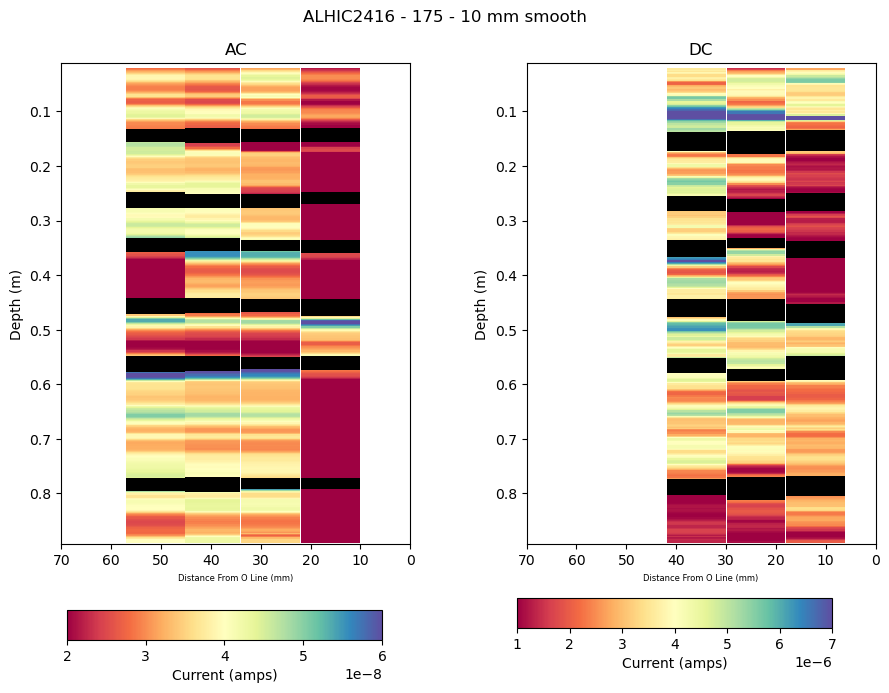

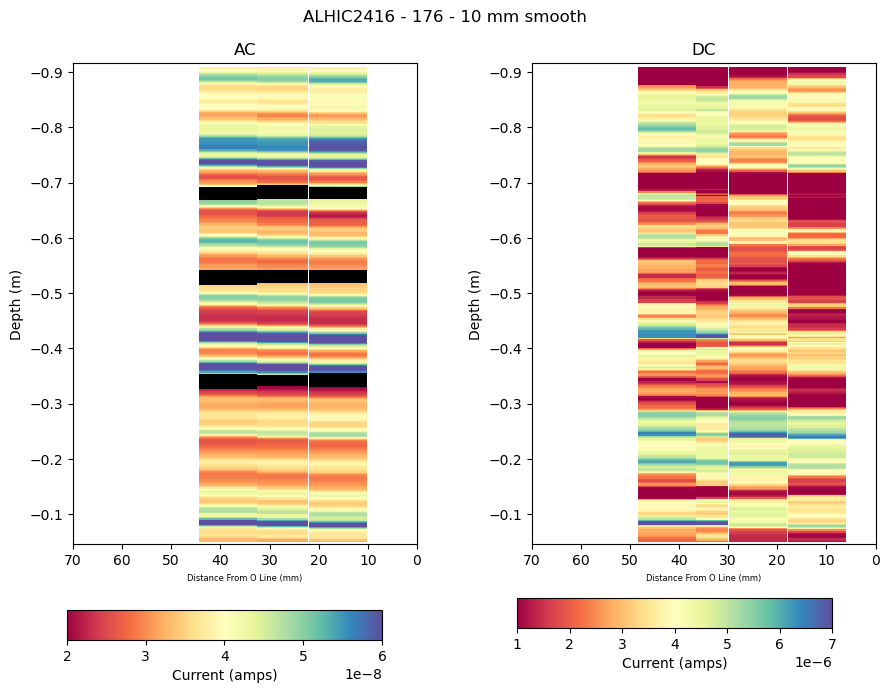

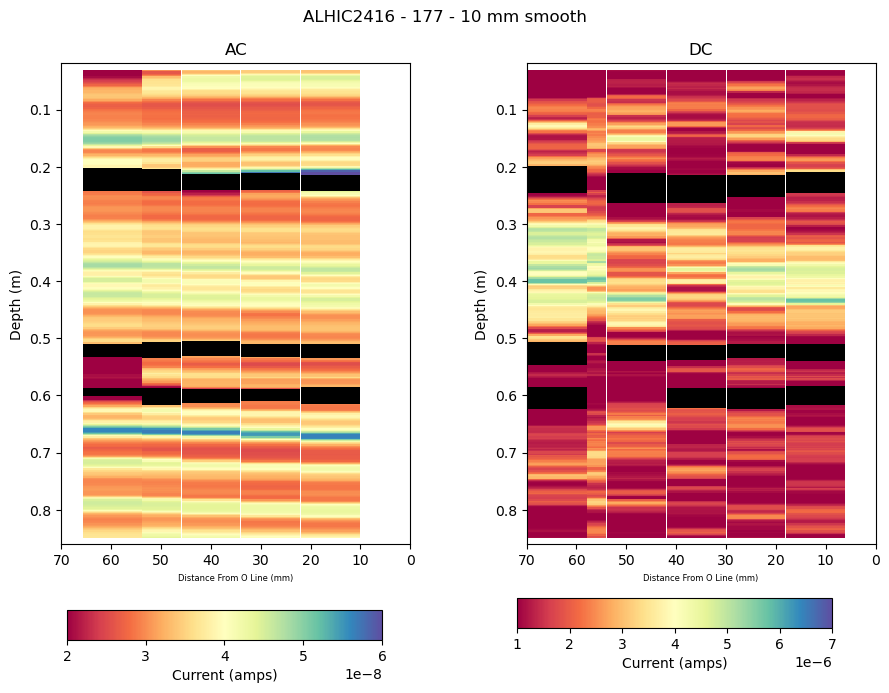

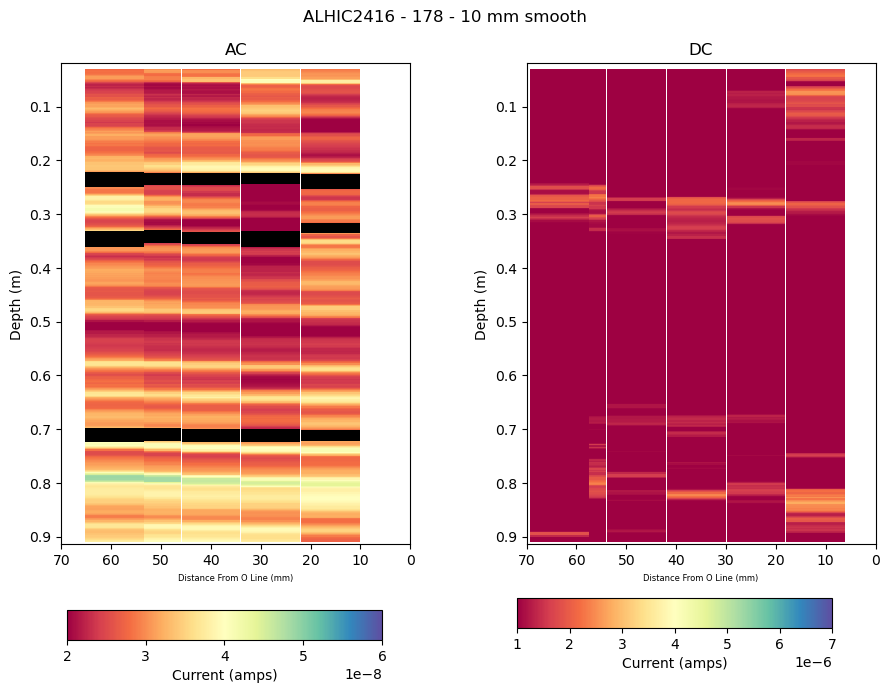

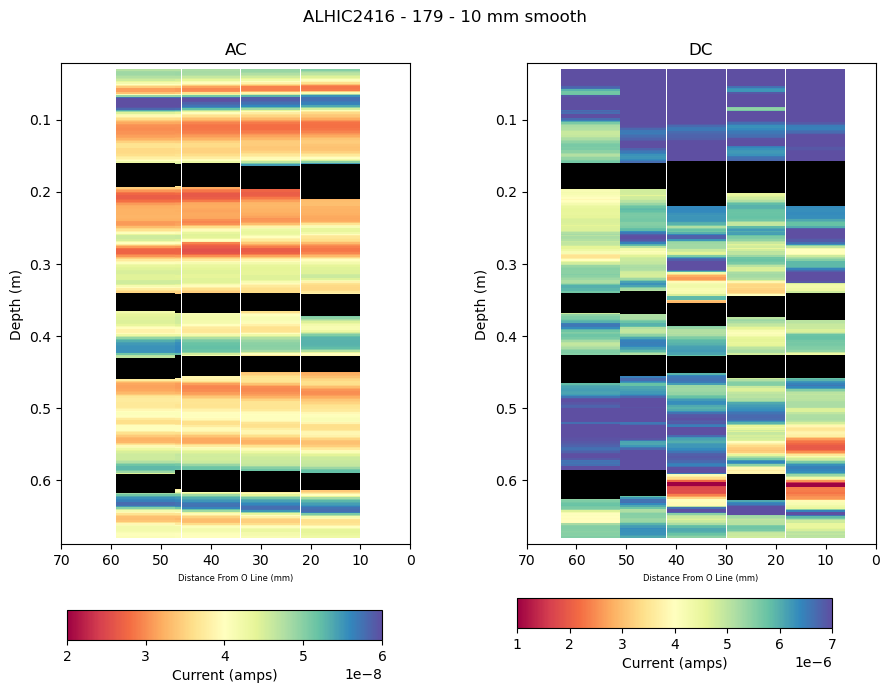

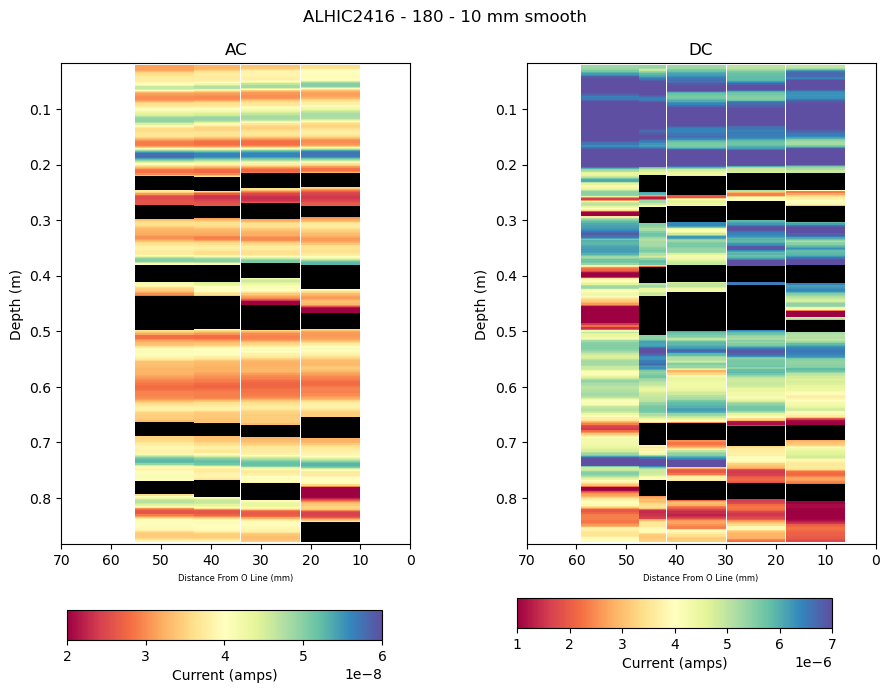

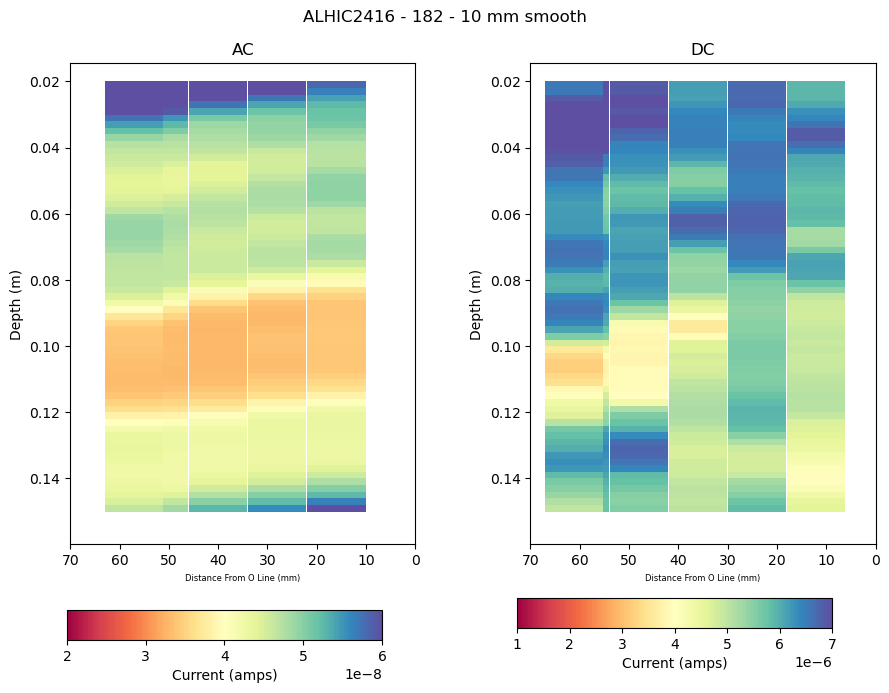

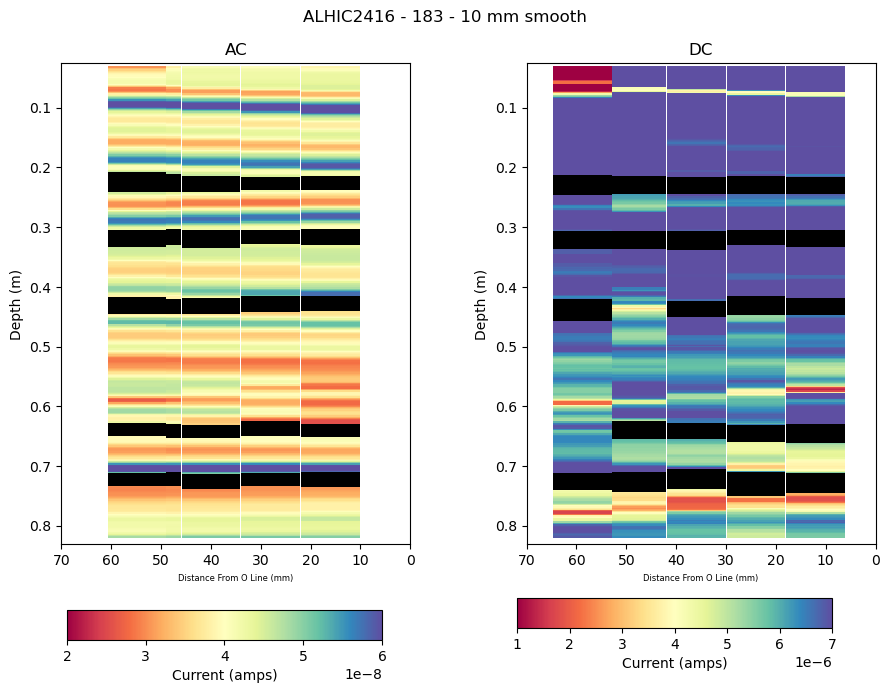

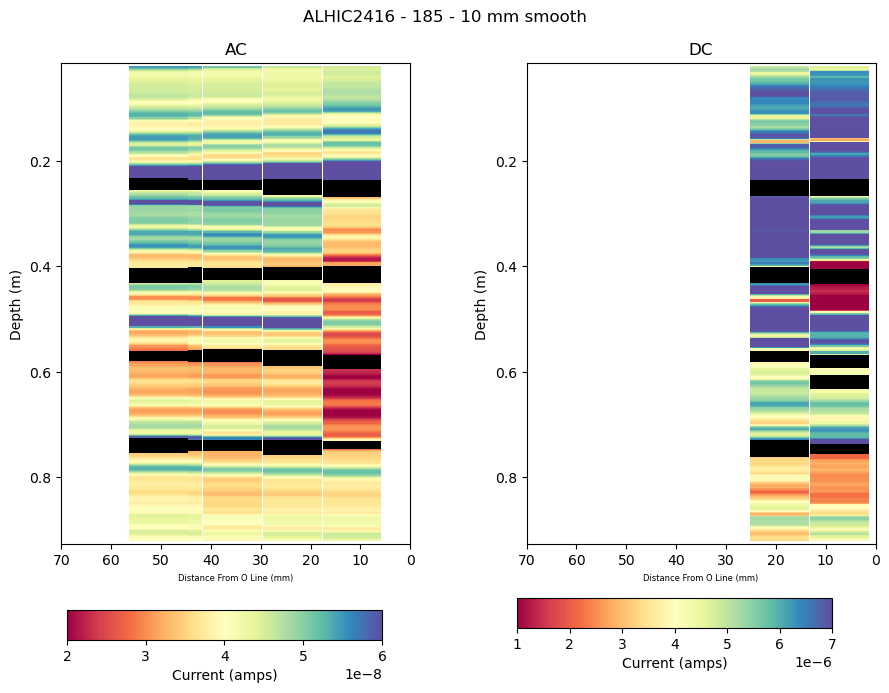

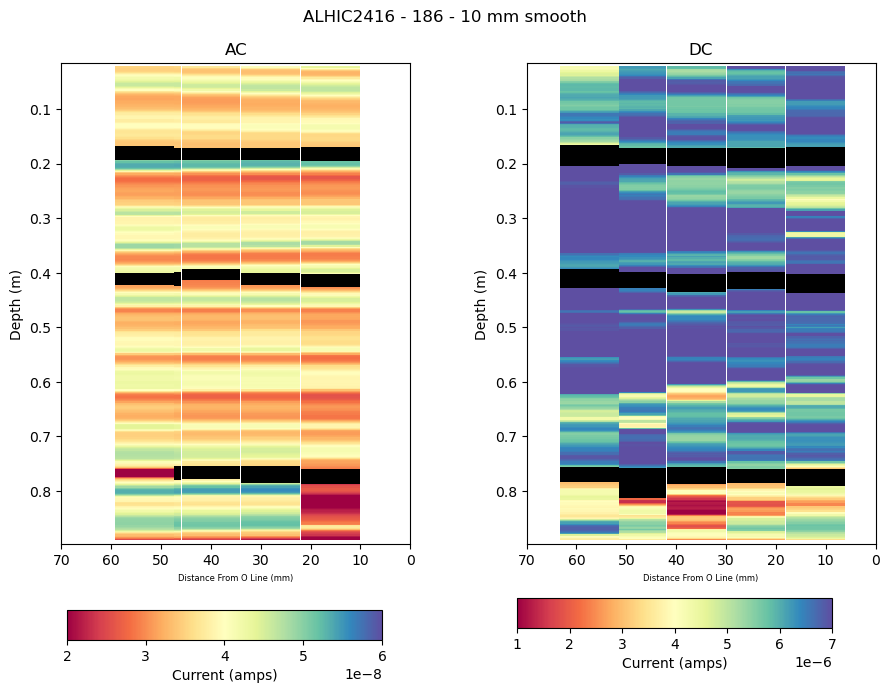

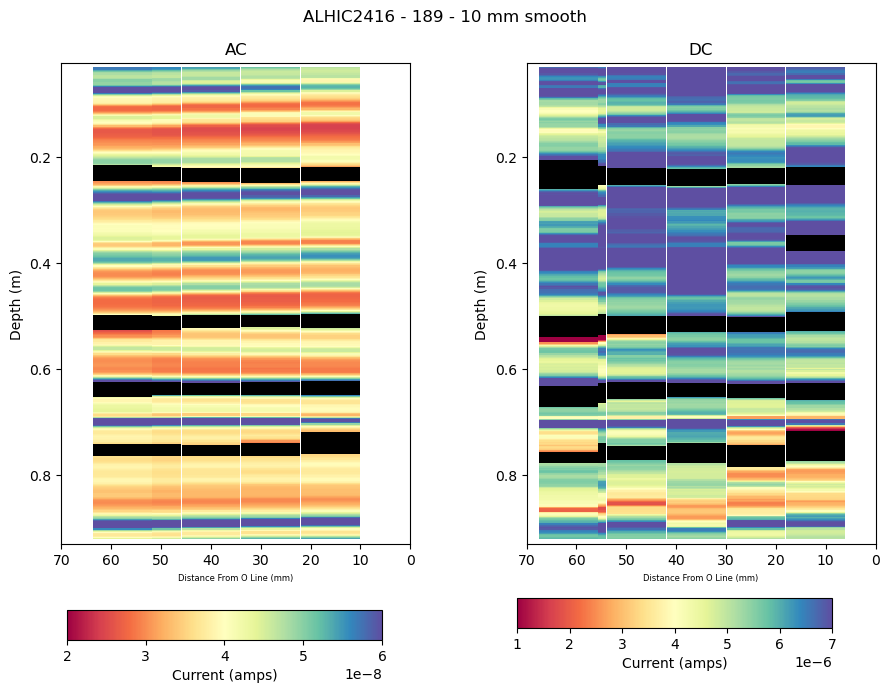

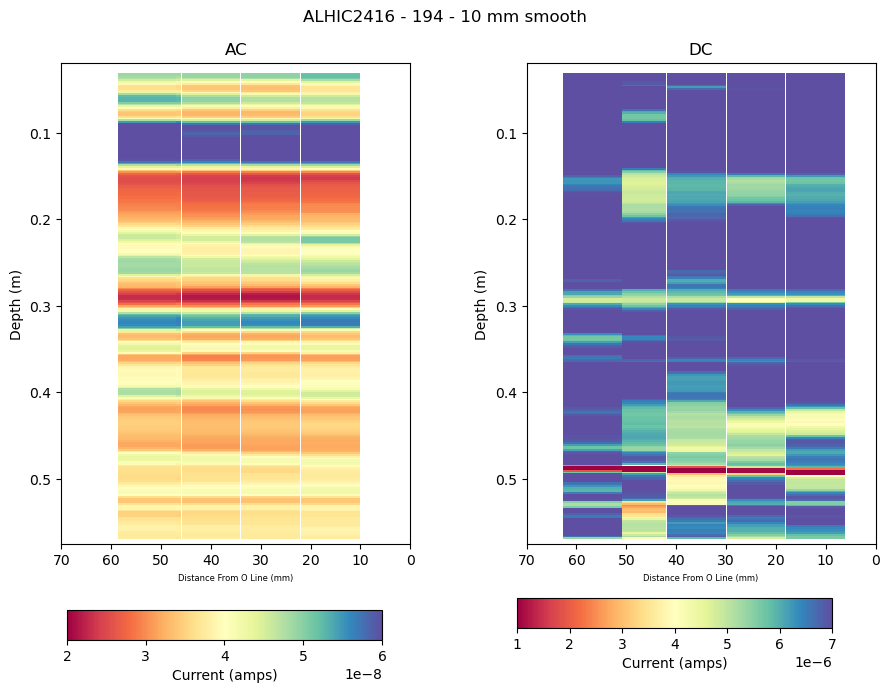

In [ ]:
ACpltmin = 2* 10**-8
ACpltmax = 6*10**-8
DCpltmin = 1*10**-6
DCpltmax = 7*10**-6
ACrescale = lambda k: (k-ACpltmin) /  (ACpltmax-ACpltmin)
DCrescale = lambda k: (k-DCpltmin) /  (DCpltmax-DCpltmin)


for plt_but in [True]:

    if plt_but:
        print('Plotting with buttons')
    else:
        print('Plotting without buttons')

    for sec in unique(sections):

        
        # print update
        print("    Running Section "+str(sec))
        
        # set data to empty
        AC_w1 = None
        DC_w1 = None


        #loop through data 
        for d in data:
            
            # find faces
            if d.section==sec:
                if d.ACorDC == 'AC':
                    AC_w1 = d
                else:
                    DC_w1 = d



        
        # find depth max and minimum
        minvec = []
        maxvec = []
        AC_all = []
        DC_all = []
        for data_face in [AC_w1,DC_w1]:
            if data_face != None:
                minvec.append(min(data_face.depth))
                maxvec.append(max(data_face.depth))
                
                if data_face.ACorDC == 'AC':
                    AC_all.extend(data_face.meas)
                else:
                    DC_all.extend(data_face.meas)
        # ACpltmin = np.percentile(AC_all,5)
        # ACpltmax = np.percentile(AC_all,95)
        # DCpltmin = np.percentile(DC_all,5)
        # DCpltmax = np.percentile(DC_all,95)  
        #ACrescale = lambda k: (k-ACpltmin) /  (ACpltmax-ACpltmin)
        #DCrescale = lambda k: (k-DCpltmin) /  (DCpltmax-DCpltmin)
        dmin = min(minvec)
        dmax = max(maxvec)
        
        # make figure
        fig, ax = plt.subplots(1, 3, gridspec_kw={'width_ratios': [3,1, 3]},figsize=(9,6),dpi=100)
        
            

        for a in [ax[0],ax[2]]:
            a.set_xlim([70,0])
            a.set_xlabel('Distance From O Line (mm)',fontsize=6)
            a.set_ylim([dmax, dmin])
            a.set_ylabel('Depth (m)')
            
            
        for a,data_face in zip([ax[0],ax[2]],[AC_w1,DC_w1]):
            
            if data_face != None:
                
                yall = data_face.y_s - data_face.y_left
                yvec = data_face.y_vec - data_face.y_left

                
                if data_face.ACorDC =='AC':
                    rescale = ACrescale
                else:
                    rescale = DCrescale
            
            
            
                # plot data
                plotquarter(yvec,
                            yall,
                            data_face.depth_s,
                            data_face.meas_s,
                            data_face.button_s,
                            a,
                            rescale,
                            plot_button = plt_but)
        
        # housekeeping
        fig.suptitle('ALHIC2416 - '+str(sec)+' - '+str(window)+' mm smooth')
        ax[1].axis('off')
        ax[0].set_title('AC')
        ax[2].set_title('DC')
        
        fig.tight_layout()
        plt.subplots_adjust(wspace=0)
    
        #ad colorbar
        #fig.subplots_adjust(bottom=0.8)

        ACcbar_ax = fig.add_axes([0.08,-0.07,0.35,0.05])
        #ACcbar_ax = fig.add_axes([0.07,-0.05,0.35,0.05])
        ACnorm = matplotlib.colors.Normalize(vmin=ACpltmin,vmax=ACpltmax)
        DCcbar_ax = fig.add_axes([0.58,-0.05,0.35,0.05])
        DCnorm = matplotlib.colors.Normalize(vmin=DCpltmin,vmax=DCpltmax)


        ACcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=ACnorm, cmap=my_cmap),cax=ACcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        DCcbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=DCnorm, cmap=my_cmap),cax=DCcbar_ax,
                    orientation='horizontal',label='Current (amps)')
        
        #ACcbar.formatter.set_powerlimits((0, 0))
        #DCcbar.formatter.set_powerlimits((0, 0))

        
        # save figure
        try:
            if int(sec) <10:
                sec = '0'+sec
        except:
            print("sec not converted to integer")
        if plt_but:
            fname = path_to_figures +'common-scale_button/dic1-'+str(sec)+'-button.png'
        else:
            fname = path_to_figures +'common-scale_nobutton/dic1-'+str(sec)+'-no-button.png'

        fig.savefig(fname,bbox_inches='tight')